<a href="https://colab.research.google.com/github/SeounghwanPark/first-repository/blob/master/%EC%95%84%EC%9D%B4%ED%8E%A0%ED%86%A40521_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


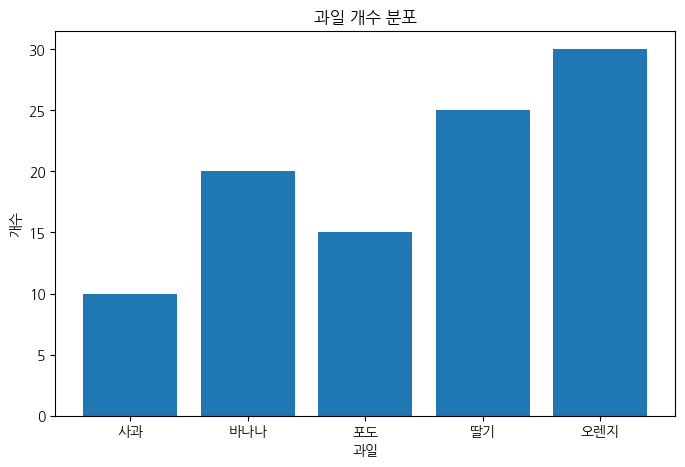

In [ ]:
# 1. 한글 폰트 설치 (Google Colab 전용)
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 2. matplotlib에서 한글 폰트 설정
def set_korean_font():
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로 설정
    if os.path.exists(font_path):
        fm.fontManager.addfont(font_path)  # 폰트 매니저에 추가
        plt.rc('font', family='NanumGothic')  # 기본 폰트 설정
    else:
        print("한글 폰트 경로를 찾을 수 없습니다.")

# 3. 폰트 적용 및 캐시 리셋 (중요)
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
fm._load_fontmanager(try_read_cache=False)  # 폰트 매니저 캐시 리셋

# 4. 한글 폰트 적용 확인을 위한 테스트 그래프
labels = ['사과', '바나나', '포도', '딸기', '오렌지']
values = [10, 20, 15, 25, 30]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel("과일")
plt.ylabel("개수")
plt.title("과일 개수 분포")
plt.show()

# 5/21일 crosswalk_lat_lon.csv / streetlight_lat_lon.csv
# 성철님 작업하신 데이터 접수후 연관 검토 진행

In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()


Saving 강남구_횡단보도_WGS84.csv to 강남구_횡단보도_WGS84.csv


In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()


Saving streetlight_lat_lon.csv to streetlight_lat_lon.csv


# ‘보행등’(streetlight) 데이터를 기존 분석에 결합하여, 횡단보도 설치 필요 구역을 더욱 정교하게 시각화할 수 있다.

In [ ]:
from google.colab import files
uploaded = files.upload()
# '강남구_횡단보도_WGS84.csv', 'streetlight_lat_lon.csv' 파일이 보여야 합니다.



Saving 강남구_횡단보도_WGS84.csv to 강남구_횡단보도_WGS84 (1).csv


https://data.seoul.go.kr/dataList/OA-22364/F/1/datasetView.do   자치구별 신호등 및 횡단보도 위치 및

In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()

Saving 강남구_횡단보도_WGS84.csv to 강남구_횡단보도_WGS84 (2).csv


In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import LineString


<!-- # 1. 한글 폰트 설치 (Google Colab 전용)
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 2. matplotlib에서 한글 폰트 설정
def set_korean_font():
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로 설정
    if os.path.exists(font_path):
        fm.fontManager.addfont(font_path)  # 폰트 매니저에 추가
        plt.rc('font', family='NanumGothic')  # 기본 폰트 설정
    else:
        print("한글 폰트 경로를 찾을 수 없습니다.")

# 3. 폰트 적용 및 캐시 리셋 (중요)
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
fm._load_fontmanager(try_read_cache=False)  # 폰트 매니저 캐시 리셋

# 4. 한글 폰트 적용 확인을 위한 테스트 그래프
labels = ['사과', '바나나', '포도', '딸기', '오렌지']
values = [10, 20, 15, 25, 30]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel("과일")
plt.ylabel("개수")
plt.title("과일 개수 분포")
plt.show()
     
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()
     
Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving train___.csv to train___.csv

import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())
     
<ipython-input-6-6fd71f543c44>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')
fullVisitorId	visitStartTime	date	deviceCategory	isMobile	operatingSystem	browser	country	city	trafficSource	...	trafficCampaign	isFirstVisit	totalVisits	totalHits	totalPageviews	totalTimeOnSite	productPagesViewed	addedToCart	first_visit_date	days_since_first_visit
0	4214259466202417480	2016-10-15 00:55:57+00:00	2016-10-14 00:00:00+00:00	desktop	False	Windows	Internet Explorer	United States	not available in demo dataset	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2016-10-06 00:00:00+00:00	8
1	3541738396641160713	2017-05-01 04:00:05+00:00	2017-04-30 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-04-30 00:00:00+00:00	0
2	8276557623242379934	2017-03-21 04:39:07+00:00	2017-03-20 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Brisbane	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2017-03-20 00:00:00+00:00	0
3	5855313117666192014	2017-04-01 12:00:53+00:00	2017-04-01 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Sydney	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-03-30 00:00:00+00:00	2
4	2619633492044211273	2017-05-20 14:59:36+00:00	2017-05-20 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	15.0	12.0	326.0	1.0	1.0	2017-04-22 00:00:00+00:00	28
5 rows × 21 columns


# 2. 데이터 기초 EDA
import pandas as pd
import matplotlib.pyplot as plt

# # =================================================================
# # 1. 데이터 불러오기 및 기본 정보 확인 (이미 df가 로드된 상태라고 가정)
# # =================================================================
# print("----- 데이터 미리보기 -----")
# print(df.head(), "\n")
# print("----- 데이터 정보 -----")
# print(df.info(), "\n")  > 이미완

# =================================================================
# 2. 날짜 및 시간 형 변환
# - 'date': ISO 포맷 문자열 → datetime (UTC)
# - 'visitStartTime': Unix timestamp → datetime (UTC)
# =================================================================
df['date'] = pd.to_datetime(df['date'], utc=True)
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s', utc=True)

# =================================================================
# 3. 결측치 및 중복 데이터 확인 & 처리
# =================================================================
print("----- 결측치 확인 -----")
print(df.isnull().sum(), "\n")
print("----- 중복 데이터 수 -----")
print(df.duplicated().sum(), "\n")

# 중복 데이터 제거 (필요한 경우)
df = df.drop_duplicates()

# 기본 통계치 확인 (수치형 데이터)
print("----- 수치형 데이터 기본 통계 -----")
print(df.describe(), "\n")

# =================================================================
# 【Retention 분석 전용 EDA 시작】
# =================================================================

# 1) 유니크 방문자 (fullVisitorId) 수 확인
unique_visitors = df['fullVisitorId'].nunique()
print("유니크 방문자 수:", unique_visitors, "\n")

# 2) 전체 방문횟수(totalVisits) 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['totalVisits'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("전체 방문횟수 분포 (totalVisits)")
plt.xlabel("방문횟수")
plt.ylabel("빈도수")
plt.show()

# 3) 코호트 분석을 위한 전처리
# ──────────────────────────
# - 각 방문자별 첫 방문일 계산 (first_visit_date)
df['first_visit_date'] = df.groupby('fullVisitorId')['date'].transform('min')

# - 첫 방문일과 현재 방문일 사이의 경과 일수 계산 (재방문 간격 분석)
df['days_since_first_visit'] = (df['date'] - df['first_visit_date']).dt.days

# 4) 코호트 데이터 생성
# ──────────────────────────
# 첫 방문일과 경과 일수별로 유니크 방문자 수 집계
cohort_data = df.groupby(['first_visit_date', 'days_since_first_visit']).agg(
    n_users=('fullVisitorId', 'nunique')
).reset_index()

print("----- 코호트 데이터 예시 -----")
print(cohort_data.head(), "\n")

# 5) 특정 코호트의 재방문 패턴 시각화
# ──────────────────────────
# 예를 들어, 가장 첫 방문한 코호트의 재방문률 추이 시각화
first_cohort_date = cohort_data['first_visit_date'].min()
first_cohort = cohort_data[cohort_data['first_visit_date'] == first_cohort_date]

plt.figure(figsize=(10, 6))
plt.plot(first_cohort['days_since_first_visit'], first_cohort['n_users'], marker='o')
plt.title("코호트 (" + str(first_cohort_date.date()) + ") 재방문율")
plt.xlabel("첫 방문 이후 경과 일수")
plt.ylabel("재방문 유저 수")
plt.show()

# =================================================================
# 클라우드 슈퍼셋에서 시각화를 진행하기 위한 데이터 파일 저장 (Retention 전용)
# =================================================================
cohort_data.to_csv('retention_cohort_data.csv', index=False)
print("Retention 코호트 데이터가 'retention_cohort_data.csv'로 저장되었습니다.")


# ──────────────────────────────
# 추가 EDA: 디바이스 및 운영체제, 브라우저 정보 분석
# ──────────────────────────────

# 디바이스 카테고리(deviceCategory) 분포
plt.figure(figsize=(10, 6))
df['deviceCategory'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("디바이스 카테고리 분포")
plt.xlabel("디바이스")
plt.ylabel("빈도수")
plt.show()

# 상위 10개 운영체제(operatingSystem) 분포
plt.figure(figsize=(10, 6))
df['operatingSystem'].value_counts().head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("상위 10개 운영체제 분포")
plt.xlabel("운영체제")
plt.ylabel("빈도수")
plt.show()

# 상위 10개 브라우저(browser) 분포
plt.figure(figsize=(10, 6))
df['browser'].value_counts().head(10).plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title("상위 10개 브라우저 분포")
plt.xlabel("브라우저")
plt.ylabel("빈도수")
plt.show()

     
----- 결측치 확인 -----
fullVisitorId         0
visitStartTime        0
date                  0
deviceCategory        0
isMobile              0
operatingSystem       0
browser               0
country               0
city                  0
trafficSource         0
trafficMedium         0
trafficCampaign       0
isFirstVisit          0
totalVisits           1
totalHits             1
totalPageviews        1
totalTimeOnSite       1
productPagesViewed    1
addedToCart           1
dtype: int64

----- 중복 데이터 수 -----
0

----- 수치형 데이터 기본 통계 -----
        isFirstVisit  totalVisits      totalHits  totalPageviews  \
count  748134.000000     748133.0  748133.000000   748133.000000   
mean        0.776159          1.0       4.648589        3.887324   
std         0.416817          0.0       9.888969        7.205425   
min         0.000000          1.0       1.000000        0.000000   
25%         1.000000          1.0       1.000000        1.000000   
50%         1.000000          1.0       2.000000        2.000000   
75%         1.000000          1.0       4.000000        4.000000   
max         1.000000          1.0     500.000000      469.000000   

       totalTimeOnSite  productPagesViewed    addedToCart  
count    748133.000000       748133.000000  748133.000000  
mean        129.751052            0.409680       0.054742  
std         365.579472            1.771054       0.227475  
min           0.000000            0.000000       0.000000  
25%           0.000000            0.000000       0.000000  
50%           2.000000            0.000000       0.000000  
75%          82.000000            0.000000       0.000000  
max       19017.000000          168.000000       1.000000   

유니크 방문자 수: 594848


----- 코호트 데이터 예시 -----
           first_visit_date  days_since_first_visit  n_users
0 2016-08-01 00:00:00+00:00                       0     1551
1 2016-08-01 00:00:00+00:00                       1       77
2 2016-08-01 00:00:00+00:00                       2       62
3 2016-08-01 00:00:00+00:00                       3       41
4 2016-08-01 00:00:00+00:00                       4       39


Retention 코호트 데이터가 'retention_cohort_data.csv'로 저장되었습니다.



코드 설명
데이터 기본 확인 및 전처리

데이터 미리보기와 info()를 통해 데이터 구조와 타입, 결측치 및 중복 데이터를 확인

date와 visitStartTime 컬럼을 적절하게 datetime으로 변환하여 시간 기반 연산을 원활하게 진행할 수 있도록

Retention 분석 준비

유니크 방문자 수: fullVisitorId 기준 고유 방문자 수를 확인

방문횟수 분포: 전체 방문횟수(totalVisits)의 분포를 히스토그램으로 시각화.

코호트 전처리:

각 방문자별 최초 방문일(first_visit_date)을 계산하고,

재방문 간격 분석을 위해 첫 방문일과 각 방문일 간의 경과 일수(days_since_first_visit)를 산출

코호트 데이터 집계:

최초 방문일과 경과 일수를 기준으로 유니크 방문자 수를 집계하여 재방문 패턴을 분석할 수 있는 데이터셋을 생성

Retention 시각화

가장 첫 코호트를 대상으로 첫 방문 후 경과 일수에 따른 재방문 유저 수 변화를 선 그래프로 시각화

클라우드 슈퍼셋 활용 준비

생성된 코호트 데이터를 CSV 파일(retention_cohort_data.csv)로 저장해 클라우드 슈퍼셋에 업로드 후 추가 시각화 및 리포트 작업에 활용할 수 있도록

클라우드 슈퍼셋 환경에서 추가적인 시각화 및 대시보드를 구성하면,

Retention 분석 담당으로서 재방문 패턴과 유저 충성도에 대한 인사이트 도출 및

보고서 작성목표

추가 EDA 항목
효용성:

디바이스(예: desktop, mobile)나 운영체제, 브라우저별 분포를 알면,

특정 기기나 환경에서 재방문률이 낮은 경우 UI/UX 개선이나 리텐션 전략 수립

시 참고할 수 있다.

혹은 전체 유저 분포를 보다 직관적으로 이해할 수 있어, 다른 팀원들과의 협업

(예: Revenue, Referral 분석)에서도 공통적인 유저 특성을 공유할 때 도움이 됨.

필요 여부:

만약 Retention 분석 담당으로서 재방문 행동 패턴, 코호트 분류, 사용 빈도,

재참여 간격에 집중하는 것이 목표라면, 이 부분은 핵심 분석에 직접적으로

포함되지는 않는다.

단, 추가 보조 자료로 유저의 접속환경을 파악하는 것은 추가 인사이트를

제공하므로 필요할 수 있다.

클라우드 슈퍼셋에서 대시보드로 확장할 때 “세그먼트별 리텐션” 혹은

리텐션과 디바이스 특성 연계 분석” 등으로 활용가능.

그래프 결과 해석
전체 방문횟수 분포 (Histogram)
데이터 내용:

전체 방문횟수가 모두 1인 것으로 나타나 대부분의 고객이 단 한 번의 방문만 기록됨.

해석:

회사가 매우 독점적이거나 회원 가입, 혹은 접근이 제한된 형태일 경우, 일반 고객은 한 번 방문 후 정보 확인만 하고 쉽게 재방문하기 어렵거나, 재방문을 위한 절차(대기, 승인 등)가 존재할 수 있다.

“못 들어가서 안달”하는 고객들의 경우, 첫 방문시 큰 관심을 보이지만 실제 재방문(또는 가입 절차 완료)이 어려워 단일 방문으로 집계될 가능성이 있다.

전략적 시사점:

이 결과는 접근 장벽을 낮추거나, 재방문 의사를 높이기 위한 추가 인센티브(예: 대기자 명단 업데이트, 예약형 접근 서비스 등)를 마련할 필요가 있음을 시사

코호트 재방문 패턴 시각화 (Line Plot)
데이터 내용:

첫 방문 당일에는 다수의 고객(예: 1551명)이 기록되지만, 이후 재방문 고객 수가 급격히 감소함.

해석:

프리미엄 브랜드나 독점 서비스의 경우, 첫 방문에 많은 관심을 보이지만 실제로 정기적으로 서비스를 이용하는 고객은 매우 소수일 수 있다.

이는 “입장”이 어려운 구조 때문에 초기 관심은 높으나, 재방문이나

충성 고객으로 전환되는 비율이 낮아 지속적인 Retention이 관건임을 보여준다.

전략적 시사점:

고객이 “입장”에 성공하면 재방문하도록 유도하는 리텐션 전략(예: 성공적인

회원가입 후 특별 혜택 제공, 대기자 해소를 위한 적극적 커뮤니케이션 강화 등)이

필요하다.

디바이스 카테고리 분포 (Bar Chart)
데이터 내용:

방문자들이 주로 사용하는 디바이스(예: 모바일, 데스크톱 등)의 분포.

해석:

유명 브랜드의 경우, 고객들은 다양한 디바이스를 활용해 접근할 가능성이 높다.

만약 모바일 접근 비중이 높다면, 언제 어디서나 서비스를 확인하려는 “안달”하는

고객의 특성이 반영된 것으로 볼 수 있다.

전략적 시사점:

각 디바이스 환경에 최적화된 UX/UI 개선을 통해, 고객의 첫 방문뿐 아니라 재방문

경험을 향상시킬 필요가 있다.

특히, 모바일 접근성을 강화해 고객의 접근 장벽을 낮추면 재방문율 개선에 도움이

될 수 있다.

상위 10개 운영체제 분포 (Bar Chart)
데이터 내용:

고객들이 사용 중인 상위 운영체제의 분포를 보여줌.

해석:

독점적이고 유명한 브랜드의 고객은 일반적으로 최신 기술을 활용하는 경향이 있을

수 있으나, 동시에 전통적인 OS를 사용하는 고객도 존재할 가능성이 있다.

특정 운영체제(예: Windows, iOS 등) 사용자가 현저하게 높다면, 해당 플랫폼에

최적화된 경험 제공이 중요

전략적 시사점:

주요 운영체제를 위한 맞춤형 최적화 전략(예: 앱, 웹사이트 호환성 개선 등)을 수립해, 고객이 “들어가고 싶어 하는” 브랜드 경험을 제고해야

상위 10개 브라우저 분포 (Bar Chart)
데이터 내용:

고객들이 사용 중인 주요 브라우저의 분포를 나타냄.

해석:

특정 브라우저(예: Chrome, Firefox 등) 사용이 두드러진다면, 그 브라우저에서의 성능 이슈나 접근성 개선이 중요한 과제로 떠오른다.

유명 브랜드의 경우, 고객들이 안정적이고 프리미엄한 경험을 기대하므로

브라우저별 최적화가 고객 충성도에 큰 영향을 줄 수 있다.

전략적 시사점:

최적의 브라우저 호환성을 보장해 고객이 언제 어디서나 원활하게 접속하고 재방문할 수 있도록 기술적 지원을 강화해야 함.

종합 해석
데이터 인사이트:

전체 방문횟수와 코호트 분석 결과는, 독점적/프리미엄 서비스가 고객 유입은

많으나 실제 재방문으로 이어지기 어렵다는 특성을 보여줌.

이는 “사람들이 못 들어가서 안달”하는 상황과 맞물려, 첫 방문 후 고객이

지속적으로 이용할 수 있도록 유도하는 Retention 전략이 매우 중요

전략적 관점:

접근성 개선: 고객들이 “입장”에 실패하지 않도록, 기다림 없이 원활한

서비스 접근 경로를 마련해야

재방문 유도: 회원 혜택, 개별 맞춤 커뮤니케이션, 예약 시스템 등으로 재방문을

적극적으로 유도할 필요가 있다.

사용자 환경 최적화: 디바이스, 운영체제, 브라우저별 접근성을 높여 모든 고객에게

일관되고 프리미엄한 서비스를 제공함으로써, 고객 만족도를 향상시켜야 한다.

이러한 해석과 전략적 인사이트를 바탕으로, 해당 회사에서는 높은 관심과 수요를

실제 충성 고객으로 전환하기 위한 Retention 전략을 보다 체계적으로 수립할 수

있다

코호트 분석하기전 3가지 기준을 먼저 잡아보자
1. 측정 기간 정의:

주별 또는 월별 집계 – 분석 노이즈를 줄이고 패턴을 명확하게 파악할 수 있음

2. 코호트 측정 기준 정의:

유입/첫 방문 기준 – 최초 경험(첫 접속, 가입, 구매 등)을 기준으로

그룹화하여 코호트 간 비교가 쉽도록

3. 측정값 정의:

활성 사용자 수/재방문 비율 – Retention의 핵심 지표로,

코호트의 유지율을 효과적으로 시각화 가능



     

# 1. 히트맵 차트 (Heatmap)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (1) 먼저, 각 코호트별 기본 데이터를 피벗 테이블로 재구성.
# cohort_data: 첫 방문일(first_visit_date), 경과 일수(days_since_first_visit), 해당일 재방문 유저 수(n_users)
cohort_pivot = cohort_data.pivot(index='first_visit_date',
                                 columns='days_since_first_visit',
                                 values='n_users')

# (2) 각 코호트의 기준(첫 방문 당일, day 0) 사용자 수로 나눠 비율(%)로 변환
baseline = cohort_pivot[0]
retention_rate = cohort_pivot.divide(baseline, axis=0) * 100

# (3) 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('코호트별 Retention 히트맵')
plt.xlabel('첫 방문 후 경과 일수')
plt.ylabel('코호트 (최초 방문일)')
plt.show()

     

목표:

각 코호트(최초 방문일)를 행으로,

최초 방문 후 경과 일수(또는 주/월)를 열로 하여,

해당 일자에 남아있는 활성 사용자 비율(Retention Rate)을 색상으로 표현.

x축: "Days Since First Visit" (첫 방문 후 경과 일수)

y축: "Cohort (First Visit Date)" (최초 방문일, 즉 코호트 그룹)

날짜가 새로운 코호트일수록 히트맵의 오른쪽까지 데이터가 적어서 삼각형 형태가 형성

1~3일차가 되면 대부분의 코호트(각 행)에서 색상이 빠르게 흐려지면서(낮은 %)

Retention이 크게 떨어지는 현상이 보임.

시간이 지나면서(일수가 커질수록) Retention 값이 극소수만 남아 0에 가깝거나

일부 코호트에서만 약간의 잔존율이 관찰됨.

히트맵을 내려다볼수록(최근 코호트) x축이 충분히 경과하지 않아, 자연스럽게

오른쪽 상단은 데이터가 채워지지 않는 삼각형 형태가 나타남.


#2. 특정 코호트의 N-day Retention 선 그래프
# 특정 코호트(예: 가장 첫 코호트)의 데이터를 선택합니다.
specific_cohort_date = cohort_data['first_visit_date'].min()
specific_cohort = cohort_data[cohort_data['first_visit_date'] == specific_cohort_date].copy()

# 해당 코호트의 기준값: day 0의 사용자 수
baseline_value = specific_cohort[specific_cohort['days_since_first_visit'] == 0]['n_users'].iloc[0]

# Retention Rate (%) 계산
specific_cohort['retention_rate'] = specific_cohort['n_users'] / baseline_value * 100

# 선 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(specific_cohort['days_since_first_visit'], specific_cohort['retention_rate'], marker='o')
plt.title(f"N-day Retention for Cohort ({specific_cohort_date.date()})")
plt.xlabel("첫 방문 후 경과 일수")
plt.ylabel("남아있는 활성 사용자의 비율(%)")
plt.show()

     

목표:

특정 코호트(예: 최초 코호트)의 N-day Retention 변화를 선 그래프로 나타내어,

첫 방문 후 시간이 지남에 따라 유지되는 사용자의 비율을 명확하게 보여준다.

x축: "Days Since First Visit" (첫 방문 후 경과 일수)

y축: "Retention Rate (%)" (해당 일자에 남아있는 활성 사용자의 비율)

그래프에서는 300일차에 가까운 시점에 Retention Rate가

매우 낮은 수치(거의 0% 근접)로 유지.

처음 유입된 사용자들이 얼마나 빠르게 이탈하는지를 단일 라인으로 명확히 확인

시사점

신규 유저가 긴 시간 동안 남아있지 않는 서비스 구조임을 재확인.

이를 개선하기 위해서는 가입 이후 즉시 이탈을 막는 온보딩 프로세스, 튜토리얼,

마케팅 캠페인, 재참여 알림 등을 강화할 필요가 있다.


# 3. 다수 코호트의 Retention 변화(코호트 차트)
# 분석에 사용할 몇 개의 코호트를 선택합니다. (예: 처음 5개의 코호트)
selected_cohorts = sorted(cohort_data['first_visit_date'].unique())[:5]

plt.figure(figsize=(12, 8))
for cohort in selected_cohorts:
    cohort_subset = cohort_data[cohort_data['first_visit_date'] == cohort].copy()
    # 각 코호트의 day 0 기준 사용자 수 계산
    baseline_value = cohort_subset[cohort_subset['days_since_first_visit'] == 0]['n_users'].iloc[0]
    cohort_subset['retention_rate'] = cohort_subset['n_users'] / baseline_value * 100
    plt.plot(cohort_subset['days_since_first_visit'],
             cohort_subset['retention_rate'], marker='o', label=str(cohort.date()))

plt.title("선택된 코호트의 N-day Retention 비교")
plt.xlabel("첫 방문 후 경과 일수")
plt.ylabel("Retention Rate (%)")
plt.legend(title="코호트 (최초 방문일)")
plt.show()

     

목표:

여러 코호트의 Retention Rate 변화를 한 그래프에 비교하여,

시간에 따른 유지 패턴의 차이를 확인

x축: "Days Since First Visit" (첫 방문 후 경과 일수)

y축: "Retention Rate (%)" (해당 일자에 남아있는 활성 사용자의 비율)

라인별 구분: 각 라인은 서로 다른 코호트(최초 방문일)를 나타냄.

Mixpanel 및 Amplitude
Mixpanel과 Amplitude는 자체 대시보드 및 시각화 기능을 제공하는 SaaS 분석 플랫폼

시사점

모든 코호트가 비슷한 형태로 급격히 떨어진다면, 초기 사용자 이탈 방지에

공통된 문제가 있을 가능성이 큼.

코호트별 Retention 차이가 거의 없다면, 새로운 사용자 유입 구조나 온보딩/마케팅

전략 개선 효과가 아직 뚜렷이 나타나지 않았을 수도 있다.

종합 결론
초기 급락:

세 그래프 모두 공통적으로 “Day 0 → Day 1” 구간에서 Retention이 매우 빠르게

하락하는 모습을 보여, 초기 이탈이 큰 과제로 드러남.

장기 잔존율 미미:

30일, 100일, 300일 등 장기 구간으로 갈수록 Retention이 극소수 수준으로 떨어져,

서비스가 꾸준히 재방문을 유도하기 어렵다는 점을 시사.

코호트별 큰 차이 없음:

여러 코호트를 비교하는 선 그래프나 히트맵에서, 특별히 Retention이 양호한

코호트가 눈에 띄지 않는다면, 전반적인 사용자 유지 전략을 재점검해야 함.

실무적 대응

온보딩 최적화: 첫 방문 후 1~3일 안에 사용자 만족도를 높이고, 재방문 동기를

부여할 수 있는 전략 마련이 중요.

코호트별 실험:

특정 기간(예: 특정 프로모션을 진행했던 주간)의 Retention이 개선되는지

AB 테스트 혹은 마케팅 캠페인을 통해 확인하고, 효과적인 전략을 확대 적용.

장기 이용 혜택 강화:

Day 30 이상부터도 재방문할 만한 가치를 부여(예: 지속적인 콘텐츠 업데이트,

멤버십 혜택 등)하여 낮은 장기 유지율을 개선할 수 있다.

이로써, 그래프 전반은 “초기 뚜렷한 이탈과 꾸준한 하락세”라는 Retention 패턴을 보여주며,

이를 해소하기 위해 초기 정착(온보딩) → 단기 재방문 유도 → 장기 로열티 구축의 전 단계에 걸친

노력이 필요함을 한눈에 알 수 있다.


import pandas as pd

# 첫번째 데이터셋 읽기
df = pd.read_csv('train___.csv')

# visitStartTime을 Unix timestamp(초)에서 datetime(UTC)로 변환
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s', utc=True)

# date 컬럼을 datetime(UTC) 형식으로 변환
df['date'] = pd.to_datetime(df['date'], utc=True)

# 각 fullVisitorId별로 첫 방문 날짜를 계산 (첫 번째 데이터셋에 포함되지 않은 방문 기록이 있을 경우에도 이를 반영)
df['first_visit_date'] = df.groupby('fullVisitorId')['date'].transform('min')

# 현재 방문 날짜와 첫 방문 날짜의 차이를 일 단위로 계산
df['days_since_first_visit'] = (df['date'] - df['first_visit_date']).dt.days

# 결과 출력: 두번째 데이터셋과 동일한 형태의 DataFrame
display(df.head())

     
<ipython-input-5-0aef57565ad1>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train___.csv')
fullVisitorId	visitStartTime	date	deviceCategory	isMobile	operatingSystem	browser	country	city	trafficSource	...	trafficCampaign	isFirstVisit	totalVisits	totalHits	totalPageviews	totalTimeOnSite	productPagesViewed	addedToCart	first_visit_date	days_since_first_visit
0	4214259466202417480	2016-10-15 00:55:57+00:00	2016-10-14 00:00:00+00:00	desktop	False	Windows	Internet Explorer	United States	not available in demo dataset	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2016-10-06 00:00:00+00:00	8
1	3541738396641160713	2017-05-01 04:00:05+00:00	2017-04-30 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-04-30 00:00:00+00:00	0
2	8276557623242379934	2017-03-21 04:39:07+00:00	2017-03-20 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Brisbane	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2017-03-20 00:00:00+00:00	0
3	5855313117666192014	2017-04-01 12:00:53+00:00	2017-04-01 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Sydney	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-03-30 00:00:00+00:00	2
4	2619633492044211273	2017-05-20 14:59:36+00:00	2017-05-20 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	15.0	12.0	326.0	1.0	1.0	2017-04-22 00:00:00+00:00	28
5 rows × 21 columns


# 4. Mixpanel 및 Amplitude 활용을 위한 데이터 준비
# Mixpanel/Amplitude에서 활용할 코호트 데이터를 CSV 파일로 저장합니다.
# DataFrame을 'cohort_data_for_mixpanel_amplitude.csv' 파일로 저장 (인덱스는 제외)
df.to_csv('cohort_data_for_mixpanel_amplitude.csv', index=False)
print("코호트 데이터가 'cohort_data_for_mixpanel_amplitude.csv'로 저장되었습니다.")
     
코호트 데이터가 'cohort_data_for_mixpanel_amplitude.csv'로 저장되었습니다.

# 파일 저장
df.to_csv('cohort_data_for_mixpanel_amplitude.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('cohort_data_for_mixpanel_amplitude.csv')

     

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드 (파일 이름: cohort_data_for_mixpanel_amplitude.csv)
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')

# 데이터 미리보기 및 정보 확인
print("데이터 미리보기:")
display(df.head())

print("데이터 정보:")
print(df.info())

# first_visit_date가 문자열인 경우 datetime 형으로 변환 (UTC 기준)
df['first_visit_date'] = pd.to_datetime(df['first_visit_date'], utc=True)

# ---------------------------------------------------
# 1. 코호트별 재방문 유저 수 계산
# ---------------------------------------------------
# fullVisitorId 컬럼을 기준으로, 각 코호트(최초 방문일)별,
# 첫 방문 후 경과 일수(days_since_first_visit)마다 고유 방문자 수(n_users)를 계산
cohort_data = df.groupby(['first_visit_date', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index(name='n_users')

print("코호트 데이터 예시:")
display(cohort_data.head())

# ---------------------------------------------------
# 2. 단일 코호트의 N-day Retention 선 그래프
# ---------------------------------------------------
# 예시로, 가장 오래된(최초) 코호트를 선택하여 일별 재방문 유저 수 추이를 시각화
first_cohort_date = cohort_data['first_visit_date'].min()
first_cohort = cohort_data[cohort_data['first_visit_date'] == first_cohort_date]

plt.figure(figsize=(10, 6))
plt.plot(first_cohort['days_since_first_visit'], first_cohort['n_users'], marker='o')
plt.title("코호트 (" + str(first_cohort_date.date()) + ") 재방문 유저 추이")
plt.xlabel("첫 방문 후 경과 일수")
plt.ylabel("재방문 유저 수")
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 3. 코호트별 Retention Heatmap 만들기
# ---------------------------------------------------
# 피벗 테이블 형태로 전환:
# - 인덱스: first_visit_date (코호트)
# - 컬럼: days_since_first_visit (경과 일수)
# - 값: n_users (고유 재방문 유저 수)
cohort_pivot = cohort_data.pivot(index='first_visit_date', columns='days_since_first_visit', values='n_users')

# 각 코호트의 Day 0(첫 방문일)의 사용자 수로 나누어 Retention Rate(%) 계산
baseline = cohort_pivot[0]  # 모든 코호트에서 day 0 값
retention_rate = cohort_pivot.divide(baseline, axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("코호트별 Retention Heatmap (Retention Rate %)")
plt.xlabel("첫 방문 후 경과 일수")
plt.ylabel("코호트 (최초 방문일)")
plt.show()

     
<ipython-input-7-b9e777550bd8>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')
데이터 미리보기:
fullVisitorId	visitStartTime	date	deviceCategory	isMobile	operatingSystem	browser	country	city	trafficSource	...	trafficCampaign	isFirstVisit	totalVisits	totalHits	totalPageviews	totalTimeOnSite	productPagesViewed	addedToCart	first_visit_date	days_since_first_visit
0	4214259466202417480	2016-10-15 00:55:57+00:00	2016-10-14 00:00:00+00:00	desktop	False	Windows	Internet Explorer	United States	not available in demo dataset	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2016-10-06 00:00:00+00:00	8
1	3541738396641160713	2017-05-01 04:00:05+00:00	2017-04-30 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-04-30 00:00:00+00:00	0
2	8276557623242379934	2017-03-21 04:39:07+00:00	2017-03-20 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Brisbane	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2017-03-20 00:00:00+00:00	0
3	5855313117666192014	2017-04-01 12:00:53+00:00	2017-04-01 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Sydney	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-03-30 00:00:00+00:00	2
4	2619633492044211273	2017-05-20 14:59:36+00:00	2017-05-20 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	15.0	12.0	326.0	1.0	1.0	2017-04-22 00:00:00+00:00	28
5 rows × 21 columns

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748134 entries, 0 to 748133
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fullVisitorId           748134 non-null  object
 1   visitStartTime          748134 non-null  object
 2   date                    748134 non-null  object
 3   deviceCategory          748134 non-null  object
 4   isMobile                748134 non-null  bool   
 5   operatingSystem         748134 non-null  object
 6   browser                 748134 non-null  object
 7   country                 748134 non-null  object
 8   city                    748134 non-null  object
 9   trafficSource           748134 non-null  object
 10  trafficMedium           748134 non-null  object
 11  trafficCampaign         748134 non-null  object
 12  isFirstVisit            748134 non-null  int64  
 13  totalVisits             748133 non-null  float64
 14  totalHits               748133 non-null  float64
 15  totalPageviews          748133 non-null  float64
 16  totalTimeOnSite         748133 non-null  float64
 17  productPagesViewed      748133 non-null  float64
 18  addedToCart             748133 non-null  float64
 19  first_visit_date        748134 non-null  object
 20  days_since_first_visit  748134 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(12)
memory usage: 114.9+ MB
None
코호트 데이터 예시:
first_visit_date	days_since_first_visit	n_users
0	2016-08-01 00:00:00+00:00	0	1551
1	2016-08-01 00:00:00+00:00	1	77
2	2016-08-01 00:00:00+00:00	2	62
3	2016-08-01 00:00:00+00:00	3	41
4	2016-08-01 00:00:00+00:00	4	39



import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())
     
<ipython-input-16-6fd71f543c44>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')
fullVisitorId	visitStartTime	date	deviceCategory	isMobile	operatingSystem	browser	country	city	trafficSource	...	trafficCampaign	isFirstVisit	totalVisits	totalHits	totalPageviews	totalTimeOnSite	productPagesViewed	addedToCart	first_visit_date	days_since_first_visit
0	4214259466202417480	2016-10-15 00:55:57+00:00	2016-10-14 00:00:00+00:00	desktop	False	Windows	Internet Explorer	United States	not available in demo dataset	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2016-10-06 00:00:00+00:00	8
1	3541738396641160713	2017-05-01 04:00:05+00:00	2017-04-30 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-04-30 00:00:00+00:00	0
2	8276557623242379934	2017-03-21 04:39:07+00:00	2017-03-20 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Brisbane	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2017-03-20 00:00:00+00:00	0
3	5855313117666192014	2017-04-01 12:00:53+00:00	2017-04-01 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Sydney	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-03-30 00:00:00+00:00	2
4	2619633492044211273	2017-05-20 14:59:36+00:00	2017-05-20 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	15.0	12.0	326.0	1.0	1.0	2017-04-22 00:00:00+00:00	28
5 rows × 21 columns


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기 (파일명에 맞게 경로를 수정하세요)
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv', parse_dates=['first_visit_date', 'date'])

# 코호트 기준: 여기서는 first_visit_date를 주별(cohort_week)로 집계
df['cohort_week'] = df['first_visit_date'].dt.to_period('W')

# 각 코호트(주별)와 days_since_first_visit 별로 고유 사용자(fullVisitorId) 수를 계산합니다.
cohort_data = df.groupby(['cohort_week', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗테이블을 생성하여, 각 행은 코호트(주), 각 열은 첫 방문 후 경과 일수, 값은 고유 사용자 수를 나타냅니다.
cohort_pivot = cohort_data.pivot(index='cohort_week', columns='days_since_first_visit', values='fullVisitorId')

# 각 코호트의 첫 방문일 기준 사용자 수 (days_since_first_visit == 0)를 구합니다.
cohort_size = cohort_pivot[0]

# Retention Rate를 계산: 각 코호트의 해당 일수의 사용자 수를 최초 방문일의 사용자 수로 나눕니다.
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Retention Heatmap 시각화: x축은 첫 방문 후 경과 일수, y축은 코호트(주별)
plt.figure(figsize=(12, 8))
plt.imshow(retention_matrix, aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.colorbar(label='Retention Rate')
plt.title('코호트 Retention 분석 (주별 코호트)')
plt.xlabel('Days Since First Visit')
plt.ylabel('Cohort Week')

# x축, y축 tick 지정
plt.xticks(ticks=np.arange(len(retention_matrix.columns)),
           labels=retention_matrix.columns)
plt.yticks(ticks=np.arange(len(retention_matrix.index)),
           labels=retention_matrix.index.astype(str))

plt.show()
     
<ipython-input-8-163733a9171d>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv', parse_dates=['first_visit_date', 'date'])
<ipython-input-8-163733a9171d>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort_week'] = df['first_visit_date'].dt.to_period('W')


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기 (low_memory 옵션과 parse_dates를 사용)
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv',
                 parse_dates=['first_visit_date', 'date'],
                 low_memory=False)

# fullVisitorId 컬럼을 문자열로 변환하여 데이터 타입 혼합 문제 해결
df['fullVisitorId'] = df['fullVisitorId'].astype(str)

# first_visit_date에서 timezone 정보를 제거한 후 주별(cohort_week)로 변환
df['cohort_week'] = df['first_visit_date'].dt.tz_localize(None).dt.to_period('W')

# 각 코호트(주별)와 days_since_first_visit별로 고유 사용자(fullVisitorId) 수를 계산합니다.
cohort_data = df.groupby(['cohort_week', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗테이블 생성: 각 행은 코호트(주), 각 열은 첫 방문 후 경과 일수, 값은 고유 사용자 수
cohort_pivot = cohort_data.pivot(index='cohort_week', columns='days_since_first_visit', values='fullVisitorId')

# 각 코호트의 첫 방문일(첫 날, days_since_first_visit == 0) 기준 사용자 수를 구합니다.
cohort_size = cohort_pivot[0]

# Retention Rate 계산: 각 코호트의 해당 일수의 사용자 수를 첫 방문일의 사용자 수로 나눕니다.
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Retention Heatmap 시각화: x축은 첫 방문 후 경과 일수, y축은 코호트(주별)
plt.figure(figsize=(12, 8))
plt.imshow(retention_matrix, aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.colorbar(label='Retention Rate')
plt.title('코호트 Retention 분석 (주별 코호트)')
plt.xlabel('Days Since First Visit')
plt.ylabel('Cohort Week')

# x축, y축 tick 지정
plt.xticks(ticks=np.arange(len(retention_matrix.columns)), labels=retention_matrix.columns)
plt.yticks(ticks=np.arange(len(retention_matrix.index)), labels=retention_matrix.index.astype(str))

plt.show()

     

실제 활용 방안
코호트 비교:
코호트 간(즉, 주차별)로 일정 일수 후의 Retention을 비교하여, 특정 시점에 신규 유입된 사용자들의 재방문 성향을 평가할 수 있다.
예를 들어 “최초 방문 후 7일차 재방문율”을 코호트별로 나란히 비교해보면, 어떤 주차(또는 어떤 시점)에 유입된 사용자들의 장기 활성이 더 높은지 식별할 수 있다.
마케팅/이벤트 평가:
특정 기간 동안 진행한 마케팅 캠페인이나 이벤트가 실제로 사용자 재방문에 긍정적인 영향을 미쳤는지, Retention 지표가 개선되었는지 판단할 수 있다.
프로덕트 개선 효과 측정:
프로덕트 혹은 웹사이트 개선을 특정 시점에 적용했을 때, 그 이후로 최초 방문한 코호트의 Retention 개선 여부를 모니터링할 수 있다.
코호트 간(즉, 주차별)로 일정 일수 후의 Retention을 비교하여,

특정 시점에 신규 유입된 사용자들의 재방문 성향을 평가필요.


# 중요데이터 검증과정으로 사용한 코드
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기 (low_memory 옵션과 parse_dates를 사용)
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv',
                 parse_dates=['first_visit_date', 'date'],
                 low_memory=False)

# fullVisitorId 컬럼을 문자열로 변환하여 데이터 타입 혼합 문제 해결
df['fullVisitorId'] = df['fullVisitorId'].astype(str)

# first_visit_date에서 timezone 정보를 제거한 후 주별(cohort_week)로 변환
df['cohort_week'] = df['first_visit_date'].dt.tz_localize(None).dt.to_period('W')

# 각 코호트(주별)와 days_since_first_visit별로 고유 사용자(fullVisitorId) 수를 계산합니다.
cohort_data = df.groupby(['cohort_week', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗테이블 생성: 각 행은 코호트(주), 각 열은 첫 방문 후 경과 일수, 값은 고유 사용자 수
cohort_pivot = cohort_data.pivot(index='cohort_week', columns='days_since_first_visit', values='fullVisitorId')

# 각 코호트의 첫 방문일(첫 날, days_since_first_visit == 0) 기준 사용자 수를 구합니다.
cohort_size = cohort_pivot[0]

# Retention Rate 계산: 각 코호트의 해당 일수의 사용자 수를 첫 방문일의 사용자 수로 나눕니다.
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# 특정 일수(예: 7일차)의 Retention을 비교하도록 설정
desired_day = 7

# 원하는 일수의 Retention 데이터가 존재하는지 확인
if desired_day in retention_matrix.columns:
    # 각 코호트별로 원하는 day의 Retention Rate를 추출합니다.
    retention_day = retention_matrix[desired_day]

    # 바 차트를 사용해 코호트별 Retention Rate를 시각화합니다.
    plt.figure(figsize=(12, 6))
    plt.bar(retention_day.index.astype(str), retention_day.values, color='skyblue')
    plt.xlabel('코호트 주 (Cohort Week)')
    plt.ylabel(f'{desired_day}일차 Retention Rate')
    plt.title(f'코호트별 {desired_day}일차 Retention 비교')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    print(f"데이터에 {desired_day}일차 Retention 정보가 존재하지 않습니다.")

     

“주별 코호트(cohort_week)”마다 “7일차에 남아있는 사용자 비율(Retention Rate)”을

바 차트로 나타낸 것

각 코호트가 첫 방문 후 7일째에 돌아오는 비율이 상당히 낮다는 점을 보여주며,

이는 유입 후 7일이 지났을 때 사용자의 흥미 또는 재방문 동기가 부족할 가능성이

높다는 신호이다.

이런 경우,

7일차 이전에 적절한 재방문 유도,

7일차에 맞춘 알림/이벤트 등을 기획해 Retention을 높일 방안을 검토해볼 수 있다.

1) 7일차 이전에 적절한 재방문 유도,

게임화된 “연속 보상 챌린지(Progressive Reward Challenge)”
개념:

사용자가 앱이나 웹사이트를 매일 방문할 때마다 미션이나 퀘스트를 수행하도록 유도하고,

각 일일 임무를 완료하면 점수, 뱃지, 또는 소정의 보상을 제공

실행 전략:

연속 출석 보상: 매일 출석 시 보상이 조금씩 커지거나 보너스 포인트를 제공해

‘스트릭(연속 방문)’을 유지하도록 유도

미션 또는 챌린지 진행:

첫 방문 이후 3일차부터 6일차까지 단기 챌린지를 구성.

예를 들어, ‘오늘의 미션’을 완료하면 다음 날 사용할 수 있는 쿠폰이나 특별 컨텐츠를 제공하는 방식

리더보드 도입:

친구와 경쟁할 수 있는 리더보드를 도입하면,

사용자 간의 상호작용과 동기 부여 효과를 높일 수 있다.

장점:

게임 요소와 보상 체계를 도입함으로써 단순 반복 방문을 넘어서 재미와 경쟁 심리를 유발할 수 있다.

사용자가 매일 새로운 챌린지를 기대하게 되어 7일차 이전에도 사이트나 앱에 접속하는 동기를 부여

퍼스널라이즈드 스토리텔링 및 미스터리 콘텐츠 시리즈
개념:

사용자의 관심사와 행동 패턴을 분석해 개인 맞춤형 ‘스토리’나 ‘미스터리 콘텐츠’를 제공

실행 전략:

스토리 시리즈 공개: 첫 방문 후 1일차부터 6일차까지 매일 차별화된 에피소드의 스토리를 공개

각 에피소드는 이전 에피소드의 내용과 연결되어 사용자들이 자연스럽게 다음

내용을 확인하기 위해 재방문하도록 한다.

미스터리 박스/서프라이즈:

특정 방문 횟수를 달성하면 ‘미스터리 박스’를 오픈할 수 있도록 하여

보상 또는 특별 콘텐츠(예: 한정판 아이템, 할인 쿠폰 등)를 제공

개인화 알림:

사용자가 관심을 가질 만한 스토리나 콘텐츠 업데이트에 대한 알림을 푸시

또는 이메일로 전송해 재방문을 유도

장점:

일련의 연속적인 스토리나 미스터리 콘텐츠는 사용자의 호기심을 자극해 매일 방문하도록 유도

개별 사용자가 자신진의 흥미에 맞게 맞춤형 콘텐츠를 받으면, 플랫폼에 대한 충성도가 높아진다.

인터랙티브 이벤트 및 커뮤니티 기반 참여 프로그램
개념:

사용자가 단순히 콘텐츠 소비를 넘어, 직접 참여할 수 있는 인터랙티브 이벤트나 커뮤니티

기반 프로그램을 통해 활발한 상호작용 환경을 만든다.

실행 전략:

실시간 Q&A 또는 라이브 스트림 이벤트:

7일차 이전 특정 시점(예: 5일차)에 전문가나 인플루언서와의 라이브 스트리밍 이벤트를 개최

이벤트 참여 시 추가 보상을 제공.

사용자 생성 콘텐츠(UGC) 공모전:

플랫폼 내에서 사용자가 직접 참여할 수 있는 공모전이나 챌린지를 진행하여,

우수 참여자에게 보상을 제공하면 다른 사용자들도 자연스럽게 콘텐츠를 확인하러 방문할 수 있다.

커뮤니티 포럼 및 소셜 피드 통합:

커뮤니티 포럼을 활성화하여 사용자들 간의 소통을 장려하고, 일일 토론 주제를 통해 사용자들이 매일 돌아오도록 유도

장점:

사용자들이 단순 소비자가 아니라 직접 이벤트에 참여함으로써 정서적 유대감과 소속감을 형성할 수 있다.

커뮤니티 내에서의 활발한 소통은 자연스러운 재방문을 유도할 뿐 아니라, 입소문 마케팅 효과도 기대할 수 있다.

개인화된 리마인더 및 AI 기반 인터랙티브 챗봇 활용
개념:

사용자의 행동 데이터와 선호도를 분석하여 개인 맞춤형 메시지와 추천 콘텐츠를 제공하는 AI 챗봇을 도입

실행 전략:

개인화 알림:

사용자가 방문하지 않았을 때, AI 챗봇이 개인 맞춤형 리마인더 메시지를 보내어

“오늘의 핫이슈”나 “새로운 이벤트” 정보를 제공

상호작용 챗봇:

사용자가 궁금한 점을 실시간으로 응답하며, 챗봇을 통해 이벤트 정보,

보상 혜택, 또는 새로운 콘텐츠 안내 등을 제공

데이터 기반 추천:

과거 방문 기록과 관심 콘텐츠를 기반으로, 다음에 확인할 만한 콘텐츠나

이벤트를 추천하여 재방문을 유도

장점:

자동화된 알림 시스템은 사용자가 잊지 않고 사이트 또는 앱을 재방문하도록 한다.

인터랙티브한 챗봇은 사용자가 직접 대화하면서 정보를 얻을 수 있어,

사용자 경험(UX)을 크게 향상시킨다.

결론

7일차 이전에 재방문을 유도하기 위해서는 사용자의 참여와 흥미를

지속적으로 자극하는 전략을 선택하는 것이 중요

예를 들어, 게임화된 챌린지나 연속 스토리텔링은 사용자의 호기심과 경쟁심을 유발하여

매일 방문하게 할 수 있으며, 커뮤니티 기반 이벤트와 개인화된 알림 시스템은

사용자와의 상호작용 및 정서적 유대를 강화할 수 있다.

이러한 방법들을 통합하여 실행한다면, 플랫폼 전반의 Retention을 효과적으로 높일 수 있을 것이다.

아래는 가상의 Retention 데이터를 생성하여,

기존 상태(Baseline)와 7일차 이전에 재방문 유도를 위한

전략(Intervention: 게임화, 스토리텔링, 커뮤니티, AI 챗봇 등 통합 효과)

를 비교하는 두 개의 시각화 입니다.

첫 번째 그래프는 첫 방문 후 0일부터 7일까지의 Retention 변화를 선 그래프

두 번째 그래프는 7일차 Retention 값을 바 차트로 비교

참고: 실제 데이터 대신, Retention 개선 효과를 가정한 가상의 시뮬레이션 입니다.

실제 운영 데이터와 비교하여 효과를 판단하거나 전략을 도출할 수 있습니다.

Retention전략이 반영되게 가상의 데이터 추가작업
목표 : Retention전략 전/후 비교


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. CSV 파일에서 데이터 로드
# -------------------------------------------------
# CSV 파일 이름은 상황에 맞게 수정
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')

# -------------------------------------------------
# 2. baseline Retention 계산 (0일 ~ 7일)
# -----------------------------------------------
# 먼저 days_since_first_visit 값이 0~7인 데이터만 선택
df_retention = df[df['days_since_first_visit'] <= 7]

# 각 일자별로 고유 fullVisitorId의 수를 계산
# (즉, 해당 일자에 방문한 유니크 사용자의 수)
baseline_counts = df_retention.groupby('days_since_first_visit')['fullVisitorId'].nunique().sort_index()

# 0일(첫 방문) 기준으로 비율(= retention rate)로 계산
# 첫 방문일의 방문자 수를 기준으로 각 일자의 비율을 구하면 0일은 1 (100%)가 됨
baseline_retention = baseline_counts / baseline_counts.iloc[0]

# -------------------------------------------------
# 3. Intervention(가상 Retention 전략) 시나리오 적용
# -------------------------------------------------
# 기존 예시에서 사용된 가상의 multiplier를 이용해 intervention retention 값을 만든다.
# (실제 데이터와 다를 수 있으므로, 원하는 전략 시나리오에 맞춰 multiplier 값을 조정.)
sample_multipliers = {
    0: 1.0,    # 첫 방문은 항상 100%
    1: 1.5,    # day1: 예시 baseline 값에 1.5배 적용
    2: 1.67,   # day2: 1.67배 적용
    3: 2.25,   # day3: 2.25배 적용
    4: 2.67,   # day4: 2.67배 적용
    5: 3.8,    # day5: 3.8배 적용
    6: 4.375,  # day6: 4.375배 적용
    7: 6.0     # day7: 6.0배 적용
}

# baseline_retention 값에 multiplier를 적용하여 intervention retention을 계산
# 단, 계산된 값이 1을 초과하면 1로 제한
intervention_retention = baseline_retention.copy()
for day in baseline_retention.index:
    multiplier = sample_multipliers.get(day, 1.0)
    intervention_retention.loc[day] = min(baseline_retention.loc[day] * multiplier, 1.0)

# -------------------------------------------------
# 4. Retention 비교 DataFrame 생성 (일자별)
# -------------------------------------------------
df_plot = pd.DataFrame({
    'Day': baseline_retention.index,
    'Baseline': baseline_retention.values,
    'Intervention': intervention_retention.values
})

# -------------------------------------------------
# 5. 라인 차트: 0일 ~ 7일차 Retention 비교
# -------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(df_plot['Day'], df_plot['Baseline'], marker='o',
         label='Baseline (No Intervention)\n(기본, 재방문 유도 미적용)')
plt.plot(df_plot['Day'], df_plot['Intervention'], marker='o',
         label='Intervention (retention 전략반영)')
plt.title('Retention Rate Comparison Over Time\n(방문 후 재방문율 비교)')
plt.xlabel('Days Since First Visit\n(첫 방문 후 경과 일수)')
plt.ylabel('Retention Rate\n(재방문률)')
plt.xticks(df_plot['Day'])
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------
# 6. 바 차트: 7일차 Retention 비교
# -------------------------------------------------
# day 7의 Retention 값을 추출
day7_baseline = df_plot[df_plot['Day'] == 7]['Baseline'].values[0]
day7_intervention = df_plot[df_plot['Day'] == 7]['Intervention'].values[0]

df_day7 = pd.DataFrame({
    'Condition': ['Baseline (No Intervention)', 'Intervention (retention 전략반영)'],
    'Day7_Retention': [day7_baseline, day7_intervention]
})

plt.figure(figsize=(6,6))
plt.bar(df_day7['Condition'], df_day7['Day7_Retention'], color=['lightgray', 'skyblue'])
plt.title('Day 7 Retention Comparison\n(7일차 재방문율 비교)')
plt.xlabel('Condition\n(조건)')
plt.ylabel('Retention Rate\n(재방문률)')
plt.ylim(0, 1)
plt.show()

     
<ipython-input-14-0e268c112ca3>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')


– “days_since_first_visit” (첫 방문 이후 경과 일수) 기준으로

각 일자별(0일~7일)의 고유 방문자수를 집계하여 baseline(기본) retention 값을 계산

– 기존 예시에서처럼 “retention 전략반영” 케이스를 가상으로 재현하기 위해,

각 일자별 baseline retention에 (day별 가상의)

multiplier를 적용하여 intervention retention 값을 산출

– 최종적으로 두 retention curve(라인 차트)와 7일차 비교(바 차트)

모든 검토기준 주별 → 월별로 수정

import pandas as pd
import matplotlib.pyplot as plt

# =================================================================
# 1. 데이터 불러오기 및 기본 정보 확인
# =================================================================
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv', low_memory=False)

# =================================================================
# 2. 날짜 및 시간 형 변환
# - 'date': ISO 포맷 문자열 → datetime (UTC)
# - 'visitStartTime': 이미 ISO 포맷 문자열이므로 unit 옵션 없이 datetime (UTC)으로 변환
# =================================================================
df['date'] = pd.to_datetime(df['date'], utc=True)
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], utc=True)

# =================================================================
# 3. 결측치 및 중복 데이터 확인 & 처리
# =================================================================
print("----- 결측치 확인 -----")
print(df.isnull().sum(), "\n")

print("----- 중복 데이터 수 -----")
print(df.duplicated().sum(), "\n")

# 중복 데이터 제거 (필요한 경우)
df = df.drop_duplicates()

print("----- 수치형 데이터 기본 통계 -----")
print(df.describe(), "\n")

# =================================================================
# 【Retention 분석 전용 EDA 시작】 (월 단위 코호트 기준)
# =================================================================

# 1) 유니크 방문자 (fullVisitorId) 수 확인
unique_visitors = df['fullVisitorId'].nunique()
print("유니크 방문자 수:", unique_visitors, "\n")

# 2) 전체 방문횟수(totalVisits) 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['totalVisits'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("전체 방문횟수 분포 (totalVisits)")
plt.xlabel("방문횟수")
plt.ylabel("빈도수")
plt.show()

# 3) 코호트 분석을 위한 전처리 (월 단위 기준)
# ──────────────────────────────
# - 각 방문자별 첫 방문일 계산 (first_visit_date)
df['first_visit_date'] = df.groupby('fullVisitorId')['date'].transform('min')

# - 첫 방문일 기준으로 **첫 방문월** 도출 (Period 단위, 월)
df['first_visit_month'] = df['first_visit_date'].dt.to_period('M')

# - 방문일의 월 (현재 방문월) 도출
df['visit_month'] = df['date'].dt.to_period('M')

# - 첫 방문월과 방문월 차이 계산 (월 단위 경과)
df['months_since_first_visit'] = (df['visit_month'] - df['first_visit_month']).apply(lambda x: x.n)

# 4) 월별 코호트 데이터 생성
# ──────────────────────────────
# 첫 방문월과 경과 월수별로 유니크 방문자 수 집계
cohort_data = df.groupby(['first_visit_month', 'months_since_first_visit']).agg(
    n_users=('fullVisitorId', 'nunique')
).reset_index()

print("----- 월별 코호트 데이터 예시 -----")
print(cohort_data.head(), "\n")

# 5) 특정 코호트의 재방문 패턴 시각화 (예: 가장 첫 코호트)
first_cohort_month = cohort_data['first_visit_month'].min()
first_cohort = cohort_data[cohort_data['first_visit_month'] == first_cohort_month]

plt.figure(figsize=(10, 6))
plt.plot(first_cohort['months_since_first_visit'], first_cohort['n_users'], marker='o')
plt.title("코호트 (" + str(first_cohort_month) + ") 재방문 패턴 (월별)")
plt.xlabel("첫 방문 이후 경과 월")
plt.ylabel("재방문 유저 수")
plt.show()

# =================================================================
# 6. 클라우드 슈퍼셋에서 시각화를 진행하기 위한 데이터 파일 저장 (Retention 전용)
# =================================================================
cohort_data.to_csv('retention_cohort_data.csv', index=False)
print("Retention 코호트 데이터가 'retention_cohort_data.csv'로 저장되었습니다.")

# ──────────────────────────────
# 추가 EDA: 디바이스 및 운영체제, 브라우저 정보 분석
# ──────────────────────────────

# 디바이스 카테고리(deviceCategory) 분포
plt.figure(figsize=(10, 6))
df['deviceCategory'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("디바이스 카테고리 분포")
plt.xlabel("디바이스")
plt.ylabel("빈도수")
plt.show()

# 상위 10개 운영체제(operatingSystem) 분포
plt.figure(figsize=(10, 6))
df['operatingSystem'].value_counts().head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("상위 10개 운영체제 분포")
plt.xlabel("운영체제")
plt.ylabel("빈도수")
plt.show()

# 상위 10개 브라우저(browser) 분포
plt.figure(figsize=(10, 6))
df['browser'].value_counts().head(10).plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title("상위 10개 브라우저 분포")
plt.xlabel("브라우저")
plt.ylabel("빈도수")
plt.show()

     
----- 결측치 확인 -----
fullVisitorId             0
visitStartTime            0
date                      0
deviceCategory            0
isMobile                  0
operatingSystem           0
browser                   0
country                   0
city                      0
trafficSource             0
trafficMedium             0
trafficCampaign           0
isFirstVisit              0
totalVisits               1
totalHits                 1
totalPageviews            1
totalTimeOnSite           1
productPagesViewed        1
addedToCart               1
first_visit_date          0
days_since_first_visit    0
dtype: int64

----- 중복 데이터 수 -----
0

----- 수치형 데이터 기본 통계 -----
        isFirstVisit  totalVisits      totalHits  totalPageviews  \
count  748134.000000     748133.0  748133.000000   748133.000000   
mean        0.776159          1.0       4.648589        3.887324   
std         0.416817          0.0       9.888969        7.205425   
min         0.000000          1.0       1.000000        0.000000   
25%         1.000000          1.0       1.000000        1.000000   
50%         1.000000          1.0       2.000000        2.000000   
75%         1.000000          1.0       4.000000        4.000000   
max         1.000000          1.0     500.000000      469.000000   

       totalTimeOnSite  productPagesViewed    addedToCart  \
count    748133.000000       748133.000000  748133.000000   
mean        129.751052            0.409680       0.054742   
std         365.579472            1.771054       0.227475   
min           0.000000            0.000000       0.000000   
25%           0.000000            0.000000       0.000000   
50%           2.000000            0.000000       0.000000   
75%          82.000000            0.000000       0.000000   
max       19017.000000          168.000000       1.000000   

       days_since_first_visit  
count           748134.000000  
mean                 4.695886  
std                 20.742925  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                303.000000   

유니크 방문자 수: 593742


<ipython-input-17-c35b487cd9db>:54: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['first_visit_month'] = df['first_visit_date'].dt.to_period('M')
<ipython-input-17-c35b487cd9db>:57: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['visit_month'] = df['date'].dt.to_period('M')
----- 월별 코호트 데이터 예시 -----
  first_visit_month  months_since_first_visit  n_users
0           2016-08                         0    60223
1           2016-08                         1     2594
2           2016-08                         2     1163
3           2016-08                         3      628
4           2016-08                         4      468


Retention 코호트 데이터가 'retention_cohort_data.csv'로 저장되었습니다.




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =================================================================
# 1. 데이터 불러오기
# =================================================================
# 이미 df가 로드되어 있다고 가정합니다.
# 예) df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv', low_memory=False)

# =================================================================
# 2. 날짜 및 시간 형 변환
# - 'date': ISO 포맷 문자열 → datetime (UTC)
# - 'visitStartTime': 이미 ISO 포맷 문자열이므로 바로 datetime (UTC)으로 변환
# =================================================================
df['date'] = pd.to_datetime(df['date'], utc=True)
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], utc=True)

# =================================================================
# 3. 코호트 분석을 위한 전처리 (주 단위 기준)
# =================================================================
# 각 방문자별 첫 방문일 계산
df['first_visit_date'] = df.groupby('fullVisitorId')['date'].transform('min')

# dt.to_period() 전 tz 정보를 제거하여 경고 메시지를 피합니다.
df['first_visit_week'] = df['first_visit_date'].dt.tz_localize(None).dt.to_period('W')
df['visit_week'] = df['date'].dt.tz_localize(None).dt.to_period('W')

# 첫 방문주와 방문주 차이 계산 (주 단위 경과, 정수값)
df['weeks_since_first_visit'] = (df['visit_week'] - df['first_visit_week']).apply(lambda x: x.n)

# =================================================================
# 4. 주별 코호트 데이터 생성
# 첫 방문주와 경과 주수별로 유니크 방문자 수를 집계
# =================================================================
cohort_data = df.groupby(['first_visit_week', 'weeks_since_first_visit']).agg(
    n_users=('fullVisitorId', 'nunique')
).reset_index()

# =================================================================
# 5. 피벗 테이블 생성 및 히트맵 작성
# =================================================================
# (1) 피벗 테이블 생성: 인덱스는 첫 방문주, 컬럼은 첫 방문 이후 경과 주수, 값은 해당 주의 유니크 방문자 수
cohort_pivot = cohort_data.pivot(index='first_visit_week',
                                 columns='weeks_since_first_visit',
                                 values='n_users')

# (2) 코호트의 첫 방문주(경과 주 0)의 유저 수를 기준으로 비율(%)로 변환
baseline = cohort_pivot[0]      # 각 코호트의 첫 방문주 유저 수
retention_rate = cohort_pivot.divide(baseline, axis=0) * 100

# (3) 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('코호트별 Retention 히트맵 (주별)')
plt.xlabel('첫 방문 후 경과 주')
plt.ylabel('코호트 (최초 방문 주)')
plt.show()
     

그래프 상에서 (주간 단위) 첫 주 이후 컬럼 대부분이 0%인 것은,

“최초 방문 후 다음 주에 재방문한 유저가 극히 적거나 없는 상태”임을 의미합니다.

전자상거래나 특정 웹사이트에 서 첫 방문자를 반복 방문자로 전환시키는 데 실패했을 가능성이큼.

실제로 1% 미만의 아주 낮은 비율이지만, 차트에 표시될 때 0으로 반올림된 것일 수도 있으므로

데이터 수집 정확성을 점검

마케팅/유입 전략이 재방문을 유도하는 데 충분하지 않았는지 확인

더 나은 코호트 유지 전략

(예: 푸시알림, 메일링, 리마케팅 등)을 기획해볼 필요가 있음.


import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 2. 특정 코호트의 N-week Retention 선 그래프 (주별 기준)
# ------------------------------------------------------------------

# 특정 코호트(예: 가장 첫 방문 주에 해당하는 코호트)를 선택합니다.
# 기존 코드에서는 'first_visit_date'와 'days_since_first_visit'를 사용하였으나,
# 주별 기준에서는 각각 'first_visit_week'와 'weeks_since_first_visit'를 사용합니다.
specific_cohort_week = cohort_data['first_visit_week'].min()
specific_cohort = cohort_data[cohort_data['first_visit_week'] == specific_cohort_week].copy()

# 해당 코호트의 기준값: week 0 (첫 방문 주)의 사용자 수
baseline_value = specific_cohort[specific_cohort['weeks_since_first_visit'] == 0]['n_users'].iloc[0]

# Retention Rate (%) 계산
specific_cohort['retention_rate'] = specific_cohort['n_users'] / baseline_value * 100

# 선 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(specific_cohort['weeks_since_first_visit'], specific_cohort['retention_rate'], marker='o')
plt.title(f"N-week Retention for Cohort ({specific_cohort_week})")
plt.xlabel("첫 방문 후 경과 주")
plt.ylabel("남아있는 활성 사용자의 비율(%)")
plt.show()

     


import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 3. 다수 코호트의 Retention 변화(코호트 차트, 주별 기준)
# ------------------------------------------------------------------
# 처음 5개의 코호트를 선택합니다.
selected_cohorts = sorted(cohort_data['first_visit_week'].unique())[:5]

plt.figure(figsize=(12, 8))
for cohort in selected_cohorts:
    cohort_subset = cohort_data[cohort_data['first_visit_week'] == cohort].copy()
    # 각 코호트의 기준: week 0의 사용자 수 (첫 방문 주)
    baseline_value = cohort_subset[cohort_subset['weeks_since_first_visit'] == 0]['n_users'].iloc[0]
    # Retention Rate (%) 계산
    cohort_subset['retention_rate'] = cohort_subset['n_users'] / baseline_value * 100
    plt.plot(cohort_subset['weeks_since_first_visit'],
             cohort_subset['retention_rate'],
             marker='o', label=str(cohort))

plt.title("선택된 코호트의 N-week Retention 비교")
plt.xlabel("첫 방문 후 경과 주")
plt.ylabel("Retention Rate (%)")
plt.legend(title="코호트 (최초 방문 주)")
plt.show()

     

그래프는 각 코호트의 사용자가 시간이 지남에 따라 얼마나 잘 재방문하는지를 보여줌.

빠른 감소는 초기 이탈율이 높음,

완만한 감소는 사용자의 지속적인 관심과 참여를 의미할 수 있다.

5개의 코호트 모두, 0주차(첫 방문 주)에는 100%, 다음 주(1주차)로 넘어가면서

Retention Rate가 급격히 0% 근처로 하락하고, 이후(2주차~40주차)는 거의

낮은 수준(사실상 1% 미만 혹은 0%에 가까운)으로 유지되는 패턴을 보임. 굵은 텍스트


# 결과 출력: 두번째 데이터셋과 동일한 형태의 DataFrame
display(df.head())
     
fullVisitorId	visitStartTime	date	deviceCategory	isMobile	operatingSystem	browser	country	city	trafficSource	...	productPagesViewed	addedToCart	first_visit_date	days_since_first_visit	first_visit_month	visit_month	months_since_first_visit	first_visit_week	visit_week	weeks_since_first_visit
0	4214259466202417480	2016-10-15 00:55:57+00:00	2016-10-14 00:00:00+00:00	desktop	False	Windows	Internet Explorer	United States	not available in demo dataset	ask	...	0.0	0.0	2016-10-06 00:00:00+00:00	8	2016-10	2016-10	0	2016-10-03/2016-10-09	2016-10-10/2016-10-16	1
1	3541738396641160713	2017-05-01 04:00:05+00:00	2017-04-30 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	0.0	0.0	2017-04-30 00:00:00+00:00	0	2017-04	2017-04	0	2017-04-24/2017-04-30	2017-04-24/2017-04-30	0
2	8276557623242379934	2017-03-21 04:39:07+00:00	2017-03-20 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Brisbane	ask	...	0.0	0.0	2017-03-20 00:00:00+00:00	0	2017-03	2017-03	0	2017-03-20/2017-03-26	2017-03-20/2017-03-26	0
3	5855313117666192014	2017-04-01 12:00:53+00:00	2017-04-01 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Sydney	ask	...	0.0	0.0	2017-03-30 00:00:00+00:00	2	2017-03	2017-04	1	2017-03-27/2017-04-02	2017-03-27/2017-04-02	0
4	2619633492044211273	2017-05-20 14:59:36+00:00	2017-05-20 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	1.0	1.0	2017-04-22 00:00:00+00:00	28	2017-04	2017-05	1	2017-04-17/2017-04-23	2017-05-15/2017-05-21	4
5 rows × 27 columns

CSV 파일을 읽은 후 first_visit_date를 datetime(UTC)로 변환

기존의 days_since_first_visit를 7로 나눈 몫으로 주 단위(weeks_since_first_visit)를 새롭게 추가


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드 (파일 이름: cohort_data_for_mixpanel_amplitude.csv)
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')

# 데이터 미리보기 및 정보 확인
print("데이터 미리보기:")
display(df.head())

print("데이터 정보:")
print(df.info())

# first_visit_date가 문자열인 경우 datetime 형으로 변환 (UTC 기준)
df['first_visit_date'] = pd.to_datetime(df['first_visit_date'], utc=True)

# ----------------------------------------------------------------
# **추가**: days_since_first_visit를 주(week) 단위로 변환
# ----------------------------------------------------------------
# days_since_first_visit 값을 7로 나눈 몫을 계산하여 주 단위 값으로 사용
df['weeks_since_first_visit'] = df['days_since_first_visit'] // 7

# ---------------------------------------------------
# 1. 코호트별 재방문 유저 수 계산 (주별 기준)
# ---------------------------------------------------
# fullVisitorId 컬럼을 기준으로, 각 코호트(최초 방문일)별,
# 첫 방문 후 경과 주(weeks_since_first_visit)마다 고유 방문자 수(n_users)를 계산
cohort_data = df.groupby(['first_visit_date', 'weeks_since_first_visit'])['fullVisitorId'] \
                .nunique().reset_index(name='n_users')

print("코호트 데이터 예시:")
display(cohort_data.head())

# ---------------------------------------------------
# 2. 단일 코호트의 N-week Retention 선 그래프
# ---------------------------------------------------
# 예시로, 가장 오래된(최초) 코호트를 선택하여 주별 재방문 유저 수 추이를 시각화
first_cohort_date = cohort_data['first_visit_date'].min()
first_cohort = cohort_data[cohort_data['first_visit_date'] == first_cohort_date]

plt.figure(figsize=(10, 6))
plt.plot(first_cohort['weeks_since_first_visit'], first_cohort['n_users'], marker='o')
plt.title("코호트 (" + str(first_cohort_date.date()) + ") 재방문 유저 추이")
plt.xlabel("첫 방문 후 경과 주")
plt.ylabel("재방문 유저 수")
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 3. 코호트별 Retention Heatmap 만들기 (주별 기준)
# ---------------------------------------------------
# 피벗 테이블 형태로 전환:
# - 인덱스: first_visit_date (코호트)
# - 컬럼: weeks_since_first_visit (경과 주)
# - 값: n_users (고유 재방문 유저 수)
cohort_pivot = cohort_data.pivot(index='first_visit_date',
                                 columns='weeks_since_first_visit',
                                 values='n_users')

# 각 코호트의 주 0(첫 방문 주)의 사용자 수로 나누어 Retention Rate(%) 계산
baseline = cohort_pivot[0]  # 모든 코호트에서 주 0 값
retention_rate = cohort_pivot.divide(baseline, axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("코호트별 Retention Heatmap (Retention Rate %)")
plt.xlabel("첫 방문 후 경과 주")
plt.ylabel("코호트 (최초 방문일)")
plt.show()
     
<ipython-input-24-6ada73f49f34>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv')
데이터 미리보기:
fullVisitorId	visitStartTime	date	deviceCategory	isMobile	operatingSystem	browser	country	city	trafficSource	...	trafficCampaign	isFirstVisit	totalVisits	totalHits	totalPageviews	totalTimeOnSite	productPagesViewed	addedToCart	first_visit_date	days_since_first_visit
0	4214259466202417480	2016-10-15 00:55:57+00:00	2016-10-14 00:00:00+00:00	desktop	False	Windows	Internet Explorer	United States	not available in demo dataset	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2016-10-06 00:00:00+00:00	8
1	3541738396641160713	2017-05-01 04:00:05+00:00	2017-04-30 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-04-30 00:00:00+00:00	0
2	8276557623242379934	2017-03-21 04:39:07+00:00	2017-03-20 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Brisbane	ask	...	(not set)	0	1.0	2.0	2.0	16.0	0.0	0.0	2017-03-20 00:00:00+00:00	0
3	5855313117666192014	2017-04-01 12:00:53+00:00	2017-04-01 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Sydney	ask	...	(not set)	0	1.0	1.0	1.0	0.0	0.0	0.0	2017-03-30 00:00:00+00:00	2
4	2619633492044211273	2017-05-20 14:59:36+00:00	2017-05-20 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	(not set)	0	1.0	15.0	12.0	326.0	1.0	1.0	2017-04-22 00:00:00+00:00	28
5 rows × 21 columns

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748134 entries, 0 to 748133
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fullVisitorId           748134 non-null  object
 1   visitStartTime          748134 non-null  object
 2   date                    748134 non-null  object
 3   deviceCategory          748134 non-null  object
 4   isMobile                748134 non-null  bool   
 5   operatingSystem         748134 non-null  object
 6   browser                 748134 non-null  object
 7   country                 748134 non-null  object
 8   city                    748134 non-null  object
 9   trafficSource           748134 non-null  object
 10  trafficMedium           748134 non-null  object
 11  trafficCampaign         748134 non-null  object
 12  isFirstVisit            748134 non-null  int64  
 13  totalVisits             748133 non-null  float64
 14  totalHits               748133 non-null  float64
 15  totalPageviews          748133 non-null  float64
 16  totalTimeOnSite         748133 non-null  float64
 17  productPagesViewed      748133 non-null  float64
 18  addedToCart             748133 non-null  float64
 19  first_visit_date        748134 non-null  object
 20  days_since_first_visit  748134 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(12)
memory usage: 114.9+ MB
None
코호트 데이터 예시:
first_visit_date	weeks_since_first_visit	n_users
0	2016-08-01 00:00:00+00:00	0	1551
1	2016-08-01 00:00:00+00:00	1	114
2	2016-08-01 00:00:00+00:00	2	76
3	2016-08-01 00:00:00+00:00	3	54
4	2016-08-01 00:00:00+00:00	4	48


전반적 Retention이 매우 낮음:

첫 방문(week 0) 이후 1주차부터 재방문자가 거의 사라지는 구조가 반복적으로 나타남.

사용자 초기 이탈률이 높음:

온보딩 개선, 재방문 혜택 및 프로모션, 마케팅 채널 최적화 등의 전략이 요구됨.

코호트 간 차이 미미:

특정 코호트에만 예외적으로 높은 Retention이 관찰되지 않는 한,

전반적으로 일관된 문제(혹은 서비스 특성)로 해석됨.


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기 (low_memory 옵션과 parse_dates를 사용)
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv',
                 parse_dates=['first_visit_date', 'date'],
                 low_memory=False)

# fullVisitorId 컬럼을 문자열로 변환하여 데이터 타입 혼합 문제 해결
df['fullVisitorId'] = df['fullVisitorId'].astype(str)

# first_visit_date에서 timezone 정보를 제거한 후 주별(cohort_week)로 변환
df['cohort_week'] = df['first_visit_date'].dt.tz_localize(None).dt.to_period('W')

# ※ 추가: days_since_first_visit을 주 단위(weeks_since_first_visit)로 변환
#     (정수 나눗셈 // 7로 계산: 예를 들어, 0~6일은 week 0, 7~13일은 week 1로 처리)
df['weeks_since_first_visit'] = df['days_since_first_visit'] // 7

# 각 코호트(주별)와 weeks_since_first_visit별로 고유 사용자(fullVisitorId) 수를 계산합니다.
cohort_data = df.groupby(['cohort_week', 'weeks_since_first_visit'])['fullVisitorId'] \
                .nunique().reset_index()

# 피벗테이블 생성: 각 행은 코호트(주), 각 열은 첫 방문 후 경과 주(weeks_since_first_visit), 값은 고유 사용자 수
cohort_pivot = cohort_data.pivot(index='cohort_week',
                                 columns='weeks_since_first_visit',
                                 values='fullVisitorId')

# 각 코호트의 첫 방문일(첫 주, weeks_since_first_visit == 0) 기준 사용자 수를 구합니다.
cohort_size = cohort_pivot[0]

# Retention Rate 계산: 각 코호트의 해당 주의 사용자 수를 첫 방문 주의 사용자 수로 나눕니다.
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Retention Heatmap 시각화: x축은 첫 방문 후 경과 주, y축은 코호트(주별)
plt.figure(figsize=(12, 8))
plt.imshow(retention_matrix, aspect='auto', cmap='Blues', vmin=0, vmax=1)
plt.colorbar(label='Retention Rate')
plt.title('코호트 Retention 분석 (주별 코호트)')
plt.xlabel('Weeks Since First Visit')
plt.ylabel('Cohort Week')

# x축, y축 tick 지정
plt.xticks(ticks=np.arange(len(retention_matrix.columns)), labels=retention_matrix.columns)
plt.yticks(ticks=np.arange(len(retention_matrix.index)), labels=retention_matrix.index.astype(str))

plt.show()

     

그래프 전체가 Week 0에서 진한 파랑(= 100%) → 이후 주(Week 1, 2, 3...)가 모두 흰색에 가까움:

“대다수 사용자가 첫 방문 주 이후 재방문하지 않는 심각한 초기 이탈” 패턴

코호트 간 유의미한 차이가 없을 정도로 낮은 Retention:

전 시기에 걸쳐 공통된 과제가 존재하며, 온보딩 개선 및 재방문 유인책이 시급하다고 해석할수있다.

추가 세그먼테이션 분석(트래픽 소스, 디바이스, 캠페인별 등)을 통해

어느 구간에서라도 Retention이 개선될 여지가 있는지 확인하고, 이를 기반으로

초기 유지 전략을 강화할 필요가 있다.


# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()
     
Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving cohort_data_for_mixpanel_amplitude.csv to cohort_data_for_mixpanel_amplitude.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CSV 파일 읽기
df = pd.read_csv('cohort_data_for_mixpanel_amplitude.csv',
                 parse_dates=['first_visit_date', 'date'],
                 low_memory=False)

# fullVisitorId를 문자열로 변환
df['fullVisitorId'] = df['fullVisitorId'].astype(str)

# timezone 제거 후, 코호트(주 단위) 생성
df['cohort_week'] = df['first_visit_date'].dt.tz_localize(None).dt.to_period('W')

# days_since_first_visit -> 주 단위로 변환 (예: 정수 나눗셈 // 7)
df['weeks_since_first_visit'] = df['days_since_first_visit'] // 7

# 트래픽 소스별 Retention 계산:
segment = 'trafficSource'  # 예시로 트래픽 소스 기준

seg_cohort = df.groupby([segment, 'cohort_week', 'weeks_since_first_visit'])['fullVisitorId'] \
                .nunique().reset_index(name='n_users')

def compute_retention_rate(seg_name):
    """
    특정 세그먼트(seg_name)에 대한
    (1) 주(week) 단위 피벗 테이블 생성
    (2) baseline(week 0) 대비 Retention(%) 계산
    (3) 모든 코호트의 평균 곡선을 반환
    """
    subset = seg_cohort[seg_cohort[segment] == seg_name].copy()
    pivot = subset.pivot(index='cohort_week',
                         columns='weeks_since_first_visit',
                         values='n_users')

    # 만약 week 0 컬럼이 없으면(즉, 해당 세그먼트가 0주차 데이터가 없는 경우) 빈 시리즈 반환
    if 0 not in pivot.columns:
        return pd.Series(dtype=float)

    # baseline(week 0) 대비 Retention 계산
    baseline = pivot[0]
    retention = pivot.divide(baseline, axis=0) * 100  # 백분율(%)

    # 세그먼트 내 모든 코호트의 평균 Retention 곡선을 계산
    avg_retention = retention.mean(axis=0)
    return avg_retention

# 각 트래픽 소스별로 Retention Curve를 그리기
traffic_sources = seg_cohort[segment].unique()
plt.figure(figsize=(12, 8))

for src in traffic_sources:
    ret_rate = compute_retention_rate(src)

    # 만약 주(week) 0 데이터가 없어 빈 시리즈가 반환됐다면, 스킵
    if ret_rate.empty:
        print(f"[WARN] {src} 세그먼트에는 week 0 데이터가 없어 스킵됩니다.")
        continue

    plt.plot(ret_rate.index, ret_rate.values, marker='o', label=src)

plt.title("Traffic Source별 Retention Curve (주 단위)")
plt.xlabel("첫 방문 후 경과 주 (Weeks)")
plt.ylabel("Retention Rate (%)")
plt.legend(title=segment)
plt.grid(True)
plt.show()

     
[WARN] 9to5google.com 세그먼트에는 week 0 데이터가 없어 스킵됩니다.
[WARN] br.pinterest.com 세그먼트에는 week 0 데이터가 없어 스킵됩니다.
[WARN] businessinsider.com 세그먼트에는 week 0 데이터가 없어 스킵됩니다.
[WARN] datastudio.google.com 세그먼트에는 week 0 데이터가 없어 스킵됩니다.
[WARN] es.search.yahoo.com 세그먼트에는 week 0 데이터가 없어 스킵됩니다.
[WARN] fr.yhs4.search.yahoo.com 세그먼트에는 week 0 데이터가 없어 스킵됩니다.
[WARN] google.com.tw 세그먼트에는 week 0 데이터가 없어 스킵됩니다.
[WARN] in.search.yahoo.com 세그먼트에는 week 0 데이터가 없어 스킵됩니다.
[WARN] mail.verizon.com 세그먼트에는 week 0 데이터가 없어 스킵됩니다.

Traffic Source종류가 많아 구분이 안감 분류를 나눠서 분석필요

트래픽 소스 문자열에서 국가(TLD)와 플랫폼(브랜드) 정보를 추출하여 분류 컬럼을 만든다.

원본처럼 세그먼트 기준은 trafficSource로 두고,

리텐션 계산 함수(compute_retention_rate) 역시 그대로 유지한다.

플로팅할 때, 국가 그룹 또는 플랫폼 그룹을 기준으로 서브셋을 묶어서

(=공통 분류를 가진 여러 trafficSource) 동일 그래프에 표시한다.

한꺼번에 50~100개가 섞인 복잡한 그래프 대신, 국가별·플랫폼별로 나뉜

여러 개의 그래프를 얻을 수 있어 동일 분류 내 트래픽 소스들의 차이를 비교하기 훨씬 쉬워짐

TLD 파싱/매핑, 플랫폼 매핑 로직은 예시일 뿐이므로,

실제 환경에 맞게 세밀하게 구성해야 됨.

week 0 데이터가 없는 트래픽 소스(코호트)들은 스킵되므로,

수집 로깅이 정상적으로 되고 있는지 확인이 필요

국가/플랫폼 이외에도, 디바이스 종류, 캠페인 ID, 광고 채널 등 다른 기준으로도

동일 패턴으로 세분화 분석이 가능할듯.


#1. 국가(TLD) 및 플랫폼 분류 컬럼 만들기
# 1.1 TLD(도메인 뒷부분) 추출 & 국가 매핑
def extract_tld(source):
    """예: 'google.ru' -> 'ru' """
    if '.' not in source:
        return 'unknown'
    return source.strip().split('.')[-1].lower()

# TLD -> Country 매핑 테이블 (예시)
tld_to_country = {
    'ru': 'Russia',
    'be': 'Belgium',
    'kr': 'Korea',
    'jp': 'Japan',
    'com': 'Global/Unknown',
    'co': 'Global/Unknown',
    'de': 'Germany',
    # 필요에 따라 추가...
}

def map_tld_to_country(tld):
    return tld_to_country.get(tld, 'Other')
     

# 1.2 플랫폼(브랜드) 분류
def map_source_to_platform(source):
    """플랫폼 분류: google, naver, bing, facebook 등"""
    s = source.lower()
    if 'google' in s:
        return 'Google'
    elif 'naver' in s:
        return 'Naver'
    elif 'bing' in s:
        return 'Bing'
    elif 'facebook' in s:
        return 'Facebook'
    # ... 필요 시 추가
    else:
        return 'Other'

     
DataFrame에 새 컬럼 추가

# DataFrame에 새 컬럼 추가
df['tld'] = df['trafficSource'].apply(extract_tld)
df['country_group'] = df['tld'].apply(map_tld_to_country)

df['platform_group'] = df['trafficSource'].apply(map_source_to_platform)

     

# 2. 기존 코호트/리텐션 계산 로직(유지)
# compute_retention_rate(seg_name) 함수를 그대로 사용하되, segment = 'trafficSource'로 유지합니다.
# 즉, 리텐션 계산을 “트래픽 소스별”로 하되, 출력(플로팅) 시에 ‘같은 국가/같은 플랫폼’ 소스들끼리 묶어서 그린다
segment = 'trafficSource'  # 세그먼트 기준은 그대로 'trafficSource'

seg_cohort = df.groupby([segment, 'cohort_week', 'weeks_since_first_visit'])['fullVisitorId'] \
                .nunique().reset_index(name='n_users')

def compute_retention_rate(seg_name):
    """
    특정 트래픽 소스(seg_name)에 대한 주(week) 단위 피벗 및
    baseline(week 0) 대비 백분율(%) 계산 → 전체 코호트 평균 리턴
    """
    subset = seg_cohort[seg_cohort[segment] == seg_name].copy()
    pivot = subset.pivot(index='cohort_week',
                         columns='weeks_since_first_visit',
                         values='n_users')

    if 0 not in pivot.columns:
        # week 0 데이터가 없으면 빈 시리즈 반환
        return pd.Series(dtype=float)

    baseline = pivot[0]
    retention = pivot.divide(baseline, axis=0) * 100  # % 계산
    avg_retention = retention.mean(axis=0)
    return avg_retention

     

# 3. 국가별로 묶어서 그리기
# ountry_group 기준으로 묶어서, 각 국가마다 새 그래프를 하나씩 그리고,
# 그 국가에 속해 있는 여러 트래픽 소스(google.ru, google.be, ...)의 리텐션 곡선을 한 장에 그림
import matplotlib.pyplot as plt

country_list = df['country_group'].unique()

for country in country_list:
    # 1) 해당 country_group에 속한 모든 trafficSource
    traffic_sources_in_country = df.loc[df['country_group'] == country, 'trafficSource'].unique()

    plt.figure(figsize=(10, 6))
    plt.title(f"Traffic Source Retention Curve by Country = {country}")
    plt.xlabel("첫 방문 후 경과 주 (Weeks)")
    plt.ylabel("Retention Rate (%)")

    valid_plot = False  # 실제로 그려진 라인이 하나라도 있는지 확인

    for src in traffic_sources_in_country:
        ret_rate = compute_retention_rate(src)
        if ret_rate.empty:
            # week 0 데이터가 없으면 스킵
            continue
        plt.plot(ret_rate.index, ret_rate.values, marker='o', label=src)
        valid_plot = True

    if valid_plot:
        plt.legend(title='Traffic Source', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()  # 각 국가별 그래프를 순차적으로 표시
    else:
        print(f"[WARN] '{country}' 국가에 속한 트래픽 소스 중 week 0 데이터가 있는 세그먼트가 없습니다.")

     
<ipython-input-21-c1417fcbc0e8>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()

<ipython-input-21-c1417fcbc0e8>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()





▣ Traffic Source Retention Curve by Country = Other 그래프
일부 소스가 상대적으로 높거나 꾸준한 리텐션을 유지할 수 있으므로,

해당 소스를 선별해 집중 분석/마케팅하는 전략이 필요, 추가로 세분화(검색, 광고, SNS 등)하거나,

데이터 매핑 규칙을 정교화해 별도 그래프를 뽑는 방법이 필요함.

▣ Traffic Source Retention Curve by Country = Global/Unknown 그래프
대체로 장기 유지율이 낮고 단발성 방문이 많다

세부적인 브라우저별, 디바이스별, 플랫폼별 세부적으로 더 파고들어 정밀한 채널 분류 및 마케팅 최적화 전

▣ Traffic Source Retention Curve by Country = Germany 그래프
독일 사용자에 대한 장기사용자 유지를 위한 대응 필요

장기 사용자 유지를 위한 재참여 전략, UX 개선 및 마케팅 조정 등의 추가적인 대응이 필요

▣ Traffic Source Retention Curve by Country = Russia 그래프
러시아 시장 확대 전략 고려

google.ru, yandex-team.ru, go.mail.ru 등을 통한 러시아 지역 트래픽이 실제로 의미 있는 규모라면,

러시아 사용자 대상 콘텐츠/서비스 현지화, 마케팅 최적화 등을 검토할 수 있다.

▣ Traffic Source Retention Curve by Country = Japan 그래프
일본 코호트 전반에서 주차별 완전한 선형 그래프가 아닌, 제한된 주차/점만 보이는 이유는

데이터 누락 또는 매우 적은 샘플 때문일 가능성이 높음.

결론적으로, 이 그래프는 일본 도메인(트래픽 소스) 유입이 소규모이거나 특정 이벤트에 집중되어

있음을 시사하며, 더 풍부한 샘플이 모이거나 별도의 캠페인/마케팅 로깅이 정교하게 이뤄져야

안정적인 리텐션 패턴을 파악할 수 있을 것으로 보임.

▣ Traffic Source Retention Curve by Country = Belgium
google.be 트래픽 소스에서 주차별 유효 데이터가 거의 없거나,

딱 한 주차만 측정되어 점만 하나 찍힌 상태

따라서 벨기에(google.be)에서 유입된 사용자의 리텐션을 제대로 분석하려면,

데이터가 충분히 확보될 때까지 기다리거나, 코호트 로깅/집계 로직을 재점검할 필요가 있다.

결국 이 그래프는 “벨기에에서 오는 트래픽이 현재 매우 적고, Week 0 ~ 1 이상의 연속 데이터가 거의 없다” 정도로.


# 4. 플랫폼별로 묶어서 그리기
# platform_group 기준으로 반복
# Google / Naver / Bing / Facebook / Other 등 플랫폼별로 묶어서 플롯:
platform_list = df['platform_group'].unique()

for platform in platform_list:
    traffic_sources_in_platform = df.loc[df['platform_group'] == platform, 'trafficSource'].unique()

    plt.figure(figsize=(10, 6))
    plt.title(f"Traffic Source Retention Curve by Platform = {platform}")
    plt.xlabel("첫 방문 후 경과 주 (Weeks)")
    plt.ylabel("Retention Rate (%)")

    valid_plot = False

    for src in traffic_sources_in_platform:
        ret_rate = compute_retention_rate(src)
        if ret_rate.empty:
            continue
        plt.plot(ret_rate.index, ret_rate.values, marker='o', label=src)
        valid_plot = True

    if valid_plot:
        plt.legend(title='Traffic Source', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"[WARN] '{platform}' 플랫폼에 속한 트래픽 소스 중 week 0 데이터가 있는 세그먼트가 없습니다.")

     
<ipython-input-18-445b8ee11213>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<ipython-input-18-445b8ee11213>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


▣ Traffic Source Retention Curve by Platform = other 그래프
“Other” 플랫폼에 포함된 다양한 소스들은 보통 소규모·일회성 트래픽이 많아,

Week 1 이후 급격한 이탈과 낮은 장기 리텐션이 일반적

그래프에서 보이는 극단적 스파이크(>100%) 는 적은 표본 수와 이벤트성 유입의 영향으로 해석

라인이 많고 변동 폭이 큰 것은, 여러 도메인(검색, 소셜, 광고, 스팸/봇 등)이 뒤섞여 있기 때문.

"Other” 범주를 좀 더 세밀하게 분류(커뮤니티, 소셜, 광고, 언론, etc.)하거나,

유입 규모가 큰 소스를 추려 집중 분석하는 방법이 권장됨

▣ Traffic Source Retention Curve by Platform = Bing 그래프
대부분의 Bing 관련 소스에서 Week 1에 급격한 이탈이 발생하고,

이후 5~10% 내외로 유지되는 낮은 장기 리텐션 패턴을 확인

이는 검색 엔진 기반 유입 특성상, 단발성 방문이 많고, 재방문 동기가 강하지 않음

bing vs. bing.com vs. cn.bing.com 간에도 큰 차이는 없음.

마케팅 관점에서는, Bing 채널로부터 유입된 사용자의 초기 이탈을 줄이는 전략

및 장기 관여(engagement)를 높이는 장치가 필요할 수 있다.

▣ Traffic Source Retention Curve by Platform = Google 그래프
다양한 국가/서비스/광고 도메인이 한 그래프에 뒤섞여 복잡한 양상을 보이지만,

큰 틀에서 보면 10주차 이후 대부분 0~30% 내외로 떨어지는 전형적인 리텐션 곡선 형태

100%를 초과하거나, 출렁이는 곡선은 여러 코호트가 합산/평균되었거나,

샘플 수가 작거나, 이벤트성 유입 영향으로 발생할 수 있다.

주요 활용:

어떤 구글 도메인이 더 효과적인 장기 유입 경로인지 비교·파악하고,

광고/마케팅 전략 및 지역별 현지화 전략을 수립하는 근거로 삼을 수 있다.

▣ Traffic Source Retention Curve by Platform = Facebook 그래프
가장 눈에 띄는 점:

facebook(메인 도메인)의 리텐션이 타 서브도메인 대비 매우 높거나 100%를 초과하는 구간이 존재.

이는 데이터 집계 로직, 샘플 규모, 이벤트성 유입 등의 영향으로 해석할 수 있음.

서브도메인들은 초기 리텐션이나 장기 리텐션이 낮고, 그래프 변동 폭이 큰 편.

이는 상대적으로 적은 사용자 규모/특수 기능 이용/이벤트 등에 의한 간헐적 유입으로 인한 현상.

분석 활용:

어떤 도메인(트래픽 소스)이 우리에게 가장 충성도가 높은 사용자를 주는지, 반대로 이탈이 빠른지

비교하여, 마케팅·서비스 개선 아이디어를 도출할 수 있음.

전체적인 상위 코호트 그래프에 대한 해석
국가 그룹별 그래프 해석 국가별 그룹으로 나눈 그래프
초기 리텐션 (Week 0, 1):

모든 트래픽 소스는 Week 0(코호트 생성 주)에서 100%가 기준

첫 주(Week 1)에서 높은 유지율을 보이는 트래픽 소스는,

첫 방문 후에도 사용자가 빠르게 재방문하는 경향이 있음을 의미한다.

만약 어느 국가 그룹 내에서 특정 트래픽 소스가 다른 소스보다 Week 1 리텐션이 현저히 높다면,

그 소스에서 유입된 사용자의 초기 관심도가 더 높다고 해석할 수 있다.

리텐션 하락 패턴:

시간이 지남에 따라 대부분의 커브는 점차 하락합니다.

완만한 하락:

상대적으로 완만한 기울기를 가진 소스는 장기적으로도 사용자가 꾸준히 돌아오는 경향을 보인다.

급격한 하락:

급격하게 내려가는 경우, 초기 관심은 있었지만 곧 관심이 식어

재방문율이 낮은 상황으로 해석할 수 있다.

곡선의 분산 및 교차:

같은 국가 그룹 내 여러 트래픽 소스의 곡선을 비교하면, 일부 소스는 초반에는 낮은 리텐션을

보이다가 중장기에는 다른 소스보다 안정적인 유지율을 보일 수도 있다.

곡선들이 서로 교차하는 경우, 시간에 따른 리텐션 성향이 다르다는 점

(예: 초기엔 A 소스가 좋지만, 이후 B 소스가 더 나은 유지율을 보임)을 시사

플랫폼 그룹별 그래프 해석
플랫폼별(예: Google, Naver, Bing, Facebook, 등)로 그룹화된 그래프에서는:

플랫폼 간 비교:

동일한 플랫폼 그룹 내의 여러 트래픽 소스(예: google.ru, google.com 등)가 함께 나타난다.

Google 그룹:

Google 관련 트래픽 소스의 경우, 전반적으로 높은 브랜드 인지도와 검색 엔진 특성으로 인해

초기 리텐션은 강한 경우가 많다.

그러나 국가별 차이가 존재할 수 있으므로, 특정 국가(예: google.ru)와 다른 국가(예: google.be)

사이의 유지율 차이가 관찰된다면, 해당 국가의 사용자 행동 또는 서비스 제공 방식의 차이가

원인일 수 있다.

다른 플랫폼 그룹:

Naver, Bing, Facebook 등은 각 플랫폼의 특성(예: 페이스북의 경우 소셜 미디어 환경에서의

빠른 트렌드 변화)을 반영하여, 리텐션 커브의 기울기가 다르게 나타날 수 있다.

예를 들어, 한 플랫폼 그룹 내에서 일부 트래픽 소스는 초기 리텐션은 낮으나,

장기적으로도 사용자의 재방문율이 낮은 경우가 있을 수 있다.

시간에 따른 유지력:

각 플랫폼 그룹에서 시간이 지남에 따라 유지율이 어떻게 변화하는지 보면,

사용자들이 플랫폼을 통한 유입 후 얼마만큼의 기간 동안 재방문하는지가 파악됨.

장기적으로 완만하게 유지되는 커브는 해당 플랫폼을 통해 유입된 사용자가 보다

충성도가 높다고 볼 수 있다.

일반적 관찰 및 시사점
데이터 수집 점검:

만약 일부 트래픽 소스에서는 Week 0 데이터가 전혀 없거나, 초기 리텐션 데이터가 누락된 경우(그래프에 나타나지 않음),

이는 데이터 로깅 문제 혹은 해당 유입 경로의 특징일 수 있으므로 추가 점검이 필요

사용자 행동 차이:

한 국가나 플랫폼 그룹 내에서 리텐션 곡선의 차이가 크다면, 그만큼 각 트래픽

소스가 가져오는 사용자 특성이 다르다는 의미

예) 한 트래픽 소스의 경우 초기에는 사용자 관심이 높지만 곧 빠르게 이탈하는 패턴이면,

해당 채널의 콘텐츠나 사용자 경험 개선이 필요할 수 있다.

비교 분석:

같은 그룹 내 여러 소스의 커브를 비교하면, 마케팅 전략이나 채널별 최적화의

우선순위를 결정하는 데 참고할 수 있다.

초기 유지율과 장기 유지율 모두를 고려해, 특정 트래픽 소스가 단기적인 유입은

강하지만, 장기적인 사용자 충성도는 낮다면 채널별 특성을 더 자세히 분석할 필요 있다.

전략적 활용:

국가별, 플랫폼별로 리텐션을 세분화하면, 각 그룹별로 타겟팅 및 캠페인 전략을 별도로 세울 수 있다.

예) 초기 리텐션은 좋으나 장기적으로 유지율이 낮은 국가/플랫폼에 대해서는

재방문을 유도하는 추가적인 이벤트나 프로모션 전략이 필요할 수 있다.

결론
분류별 유효 비교:

그래프들을 국가나 플랫폼별로 나누어 표시함으로써, 한꺼번에 수십 개의 트래픽 소스가 뒤섞여

나타날 때보다 보다 명확하게 어떤 그룹 내에서 어떤 소스가 상대적으로

좋은 리텐션을 보이는지 파악할 수 있다.

데이터 기반 의사결정:

이러한 시각적 비교 결과는 각 트래픽 소스나 마케팅 채널의 효율성을 평가하고,

필요 시 개선 및 최적화 전략 수립에 중요한 기초 자료로 사용될 수 있다.

후속 분석 권고:

각 그룹 내에서 리텐션 커브 차이에 영향을 줄 수 있는 추가 변수

(예: 방문자 특성, 캠페인 내용 등)를 함께 고려하면 더 심층적인 인사이트를 도출할 수 있다.

단순한 평균 리텐션 외에도 코호트별 구분, 사용자 세그먼트별 행동 차이 등을

고려하는 다각도의 분석이 필요하다.

최적의 Retention을 위한 전략
7일 이내 유지율 증대 기여 가능성 데이터 기반 근거

연속 보상 챌린지 첫 방문 이후 2~3일 이내 급격한 이탈 방지 가능

시리즈형 콘텐츠 일부 코호트가 4~5일까지 유지되는 흐름 존재

인터랙티브 이벤트 이벤트가 있는 날일수록 잔존율이 높아질 가능성

AI 챗봇 & 알림 사용자 행동 기반 개입으로 반복 접속 유도 가능

Day 1, Day 3, Day 5 타겟 리텐션 전략 실험군 구성

A/B 테스트 형태로 전략별 성과 비교

Retention 개선 KPI 설정

Day 1 Retention +10%, Week 1 Retention +5% 등 목표 수립


# 결과 출력: 두번째 데이터셋과 동일한 형태의 DataFrame
display(df.head())
     
fullVisitorId	visitStartTime	date	deviceCategory	isMobile	operatingSystem	browser	country	city	trafficSource	...	totalTimeOnSite	productPagesViewed	addedToCart	first_visit_date	days_since_first_visit	cohort_week	weeks_since_first_visit	tld	country_group	platform_group
0	4214259466202417480	2016-10-15 00:55:57+00:00	2016-10-14 00:00:00+00:00	desktop	False	Windows	Internet Explorer	United States	not available in demo dataset	ask	...	16.0	0.0	0.0	2016-10-06 00:00:00+00:00	8	2016-10-03/2016-10-09	1	unknown	Other	Other
1	3541738396641160713	2017-05-01 04:00:05+00:00	2017-04-30 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	0.0	0.0	0.0	2017-04-30 00:00:00+00:00	0	2017-04-24/2017-04-30	0	unknown	Other	Other
2	8276557623242379934	2017-03-21 04:39:07+00:00	2017-03-20 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Brisbane	ask	...	16.0	0.0	0.0	2017-03-20 00:00:00+00:00	0	2017-03-20/2017-03-26	0	unknown	Other	Other
3	5855313117666192014	2017-04-01 12:00:53+00:00	2017-04-01 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Sydney	ask	...	0.0	0.0	0.0	2017-03-30 00:00:00+00:00	2	2017-03-27/2017-04-02	0	unknown	Other	Other
4	2619633492044211273	2017-05-20 14:59:36+00:00	2017-05-20 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	...	326.0	1.0	1.0	2017-04-22 00:00:00+00:00	28	2017-04-17/2017-04-23	4	unknown	Other	Other
5 rows × 26 columns

visitStartTime 컬럼과 trafficCampaign 컬럼은 삭제

# 삭제할 컬럼 리스트 정의
columns_to_drop = ["visitStartTime", "trafficCampaign"]

# 컬럼이 실제 존재하는 경우에만 삭제
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

     

# 결과 출력: 두번째 데이터셋과 동일한 형태의 DataFrame
display(df_cleaned.head())
     
fullVisitorId	date	deviceCategory	isMobile	operatingSystem	browser	country	city	trafficSource	trafficMedium	...	totalTimeOnSite	productPagesViewed	addedToCart	first_visit_date	days_since_first_visit	cohort_week	weeks_since_first_visit	tld	country_group	platform_group
0	4214259466202417480	2016-10-14 00:00:00+00:00	desktop	False	Windows	Internet Explorer	United States	not available in demo dataset	ask	organic	...	16.0	0.0	0.0	2016-10-06 00:00:00+00:00	8	2016-10-03/2016-10-09	1	unknown	Other	Other
1	3541738396641160713	2017-04-30 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	organic	...	0.0	0.0	0.0	2017-04-30 00:00:00+00:00	0	2017-04-24/2017-04-30	0	unknown	Other	Other
2	8276557623242379934	2017-03-20 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Brisbane	ask	organic	...	16.0	0.0	0.0	2017-03-20 00:00:00+00:00	0	2017-03-20/2017-03-26	0	unknown	Other	Other
3	5855313117666192014	2017-04-01 00:00:00+00:00	desktop	False	Windows	Chrome	Australia	Sydney	ask	organic	...	0.0	0.0	0.0	2017-03-30 00:00:00+00:00	2	2017-03-27/2017-04-02	0	unknown	Other	Other
4	2619633492044211273	2017-05-20 00:00:00+00:00	desktop	False	Windows	Chrome	United States	not available in demo dataset	ask	organic	...	326.0	1.0	1.0	2017-04-22 00:00:00+00:00	28	2017-04-17/2017-04-23	4	unknown	Other	Other
5 rows × 24 columns


# 1. CSV 파일로 저장
df_cleaned.to_csv('new_train.csv', index=False)

# 2. Google Colab에서 사용자가 직접 파일 다운로드
from google.colab import files
files.download('new_train.csv')

     
컬럼삭제
isMobile, city, trafficMedium, productPagesViewed, addedToCart, first_visit_month, visit_month, months_since_first_visit, first_visit_week, visit_week, totalVisits, totalHits, totalPageviews, totalTimeOnSite 의 컬럼 삭제


# 삭제할 컬럼 리스트
columns_to_drop = [
    "isMobile", "city", "trafficMedium", "productPagesViewed", "addedToCart",
    "first_visit_month", "visit_month", "months_since_first_visit",
    "first_visit_week", "visit_week",
    "totalVisits", "totalHits", "totalPageviews", "totalTimeOnSite"
]

# 컬럼 삭제
df_cleaned = df_cleaned.drop(columns=[col for col in columns_to_drop if col in df_cleaned.columns])

     

# 1. CSV 파일로 저장
df_cleaned.to_csv('new_train.csv', index=False)

# 2. Google Colab에서 사용자가 직접 파일 다운로드
from google.colab import files
files.download('new_train.csv')
     

# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()
     
Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving new_train.csv to new_train.csv

# 해당 new_train.csv파일이 처음 검증한 cohort_data_for_mixpanel_amplitude.csv 아래 코드 결과 값이 같은가 체크용 코드
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기 (low_memory 옵션과 parse_dates를 사용)
df = pd.read_csv('new_train.csv',
                 parse_dates=['first_visit_date', 'date'],
                 low_memory=False)

# fullVisitorId 컬럼을 문자열로 변환하여 데이터 타입 혼합 문제 해결
df['fullVisitorId'] = df['fullVisitorId'].astype(str)

# first_visit_date에서 timezone 정보를 제거한 후 주별(cohort_week)로 변환
df['cohort_week'] = df['first_visit_date'].dt.tz_localize(None).dt.to_period('W')

# 각 코호트(주별)와 days_since_first_visit별로 고유 사용자(fullVisitorId) 수를 계산합니다.
cohort_data = df.groupby(['cohort_week', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗테이블 생성: 각 행은 코호트(주), 각 열은 첫 방문 후 경과 일수, 값은 고유 사용자 수
cohort_pivot = cohort_data.pivot(index='cohort_week', columns='days_since_first_visit', values='fullVisitorId')

# 각 코호트의 첫 방문일(첫 날, days_since_first_visit == 0) 기준 사용자 수를 구합니다.
cohort_size = cohort_pivot[0]

# Retention Rate 계산: 각 코호트의 해당 일수의 사용자 수를 첫 방문일의 사용자 수로 나눕니다.
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# 특정 일수(예: 7일차)의 Retention을 비교하도록 설정
desired_day = 7

# 원하는 일수의 Retention 데이터가 존재하는지 확인
if desired_day in retention_matrix.columns:
    # 각 코호트별로 원하는 day의 Retention Rate를 추출합니다.
    retention_day = retention_matrix[desired_day]

    # 바 차트를 사용해 코호트별 Retention Rate를 시각화합니다.
    plt.figure(figsize=(12, 6))
    plt.bar(retention_day.index.astype(str), retention_day.values, color='skyblue')
    plt.xlabel('코호트 주 (Cohort Week)')
    plt.ylabel(f'{desired_day}일차 Retention Rate')
    plt.title(f'코호트별 {desired_day}일차 Retention 비교')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    print(f"데이터에 {desired_day}일차 Retention 정보가 존재하지 않습니다.")
     


# 분석 환경 준비
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # Colab에서 display() 사용을 위해 필요

# 4. CSV 파일 로드
df = pd.read_csv('new_train.csv')

# 5. 데이터 미리보기
print("데이터 미리보기:")
display(df.head())

# 6. 데이터 정보 확인
print("데이터 정보:")
print(df.info())

     
<ipython-input-30-c99712d61d74>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_train.csv')
데이터 미리보기:
fullVisitorId	date	deviceCategory	operatingSystem	browser	country	trafficSource	isFirstVisit	first_visit_date	days_since_first_visit	cohort_week	weeks_since_first_visit	tld	country_group	platform_group
0	4214259466202417480	2016-10-14 00:00:00+00:00	desktop	Windows	Internet Explorer	United States	ask	0	2016-10-06 00:00:00+00:00	8	2016-10-03/2016-10-09	1	unknown	Other	Other
1	3541738396641160713	2017-04-30 00:00:00+00:00	desktop	Windows	Chrome	United States	ask	0	2017-04-30 00:00:00+00:00	0	2017-04-24/2017-04-30	0	unknown	Other	Other
2	8276557623242379934	2017-03-20 00:00:00+00:00	desktop	Windows	Chrome	Australia	ask	0	2017-03-20 00:00:00+00:00	0	2017-03-20/2017-03-26	0	unknown	Other	Other
3	5855313117666192014	2017-04-01 00:00:00+00:00	desktop	Windows	Chrome	Australia	ask	0	2017-03-30 00:00:00+00:00	2	2017-03-27/2017-04-02	0	unknown	Other	Other
4	2619633492044211273	2017-05-20 00:00:00+00:00	desktop	Windows	Chrome	United States	ask	0	2017-04-22 00:00:00+00:00	28	2017-04-17/2017-04-23	4	unknown	Other	Other
데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748134 entries, 0 to 748133
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   fullVisitorId            748134 non-null  object
 1   date                     748134 non-null  object
 2   deviceCategory           748134 non-null  object
 3   operatingSystem          748134 non-null  object
 4   browser                  748134 non-null  object
 5   country                  748134 non-null  object
 6   trafficSource            748134 non-null  object
 7   isFirstVisit             748134 non-null  int64
 8   first_visit_date         748134 non-null  object
 9   days_since_first_visit   748134 non-null  int64
 10  cohort_week              748134 non-null  object
 11  weeks_since_first_visit  748134 non-null  int64
 12  tld                      748134 non-null  object
 13  country_group            748134 non-null  object
 14  platform_group           748134 non-null  object
dtypes: int64(3), object(12)
memory usage: 85.6+ MB
None
fullVisitorId 컬럼에 숫자처럼 보이지만 문자열도 섞여있을 수 있어

이 컬럼은 고유 ID이므로, 명시적으로 문자열(str) 타입으로 불러오는 게 안전


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# CSV 불러오기 (ID를 문자열로 처리)
df = pd.read_csv('new_train.csv', dtype={'fullVisitorId': str})

# 날짜 타입으로 변환
df['date'] = pd.to_datetime(df['date'])
df['first_visit_date'] = pd.to_datetime(df['first_visit_date'])

# 데이터 미리보기
print("데이터 미리보기:")
display(df.head())

# 데이터 정보 확인
print("데이터 정보:")
print(df.info())

     
데이터 미리보기:
fullVisitorId	date	deviceCategory	operatingSystem	browser	country	trafficSource	isFirstVisit	first_visit_date	days_since_first_visit	cohort_week	weeks_since_first_visit	tld	country_group	platform_group
0	4214259466202417480	2016-10-14 00:00:00+00:00	desktop	Windows	Internet Explorer	United States	ask	0	2016-10-06 00:00:00+00:00	8	2016-10-03/2016-10-09	1	unknown	Other	Other
1	3541738396641160713	2017-04-30 00:00:00+00:00	desktop	Windows	Chrome	United States	ask	0	2017-04-30 00:00:00+00:00	0	2017-04-24/2017-04-30	0	unknown	Other	Other
2	8276557623242379934	2017-03-20 00:00:00+00:00	desktop	Windows	Chrome	Australia	ask	0	2017-03-20 00:00:00+00:00	0	2017-03-20/2017-03-26	0	unknown	Other	Other
3	5855313117666192014	2017-04-01 00:00:00+00:00	desktop	Windows	Chrome	Australia	ask	0	2017-03-30 00:00:00+00:00	2	2017-03-27/2017-04-02	0	unknown	Other	Other
4	2619633492044211273	2017-05-20 00:00:00+00:00	desktop	Windows	Chrome	United States	ask	0	2017-04-22 00:00:00+00:00	28	2017-04-17/2017-04-23	4	unknown	Other	Other
데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748134 entries, 0 to 748133
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   fullVisitorId            748134 non-null  object             
 1   date                     748134 non-null  datetime64[ns, UTC]
 2   deviceCategory           748134 non-null  object             
 3   operatingSystem          748134 non-null  object             
 4   browser                  748134 non-null  object             
 5   country                  748134 non-null  object             
 6   trafficSource            748134 non-null  object             
 7   isFirstVisit             748134 non-null  int64              
 8   first_visit_date         748134 non-null  datetime64[ns, UTC]
 9   days_since_first_visit   748134 non-null  int64              
 10  cohort_week              748134 non-null  object             
 11  weeks_since_first_visit  748134 non-null  int64              
 12  tld                      748134 non-null  object             
 13  country_group            748134 non-null  object             
 14  platform_group           748134 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(3), object(10)
memory usage: 85.6+ MB
None
다음으로 할 분석 순서
Day 1, 3, 5 리텐션 분석

A/B 테스트 구성 및 리텐션 곡선 비교

채널(trafficSource)별 리텐션 비교

국가(country)별 재방문률 시각화

피벗 테이블로 유입 트렌드 요약


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# =============================================================================
# 0. CSV 파일 로드 및 전처리
# =============================================================================

# fullVisitorId를 문자열로 읽어 Dtype Warning 회피
df = pd.read_csv('new_train.csv', dtype={'fullVisitorId': str})

# 날짜 컬럼을 datetime 타입으로 변환 (분석 및 시각화 편의를 위해)
df['date'] = pd.to_datetime(df['date'])
df['first_visit_date'] = pd.to_datetime(df['first_visit_date'])

# 데이터 미리보기 및 기본 정보 출력
print("데이터 미리보기:")
display(df.head())
print("데이터 정보:")
print(df.info())

# =============================================================================
# 1. Day 1, 3, 5 리텐션 분석
# =============================================================================
print("\n[1] Day 1, 3, 5 리텐션 분석")

# 코호트별(첫 방문일)로 days_since_first_visit에 따른 고유 사용자 수 계산
cohort_data = df.groupby(['first_visit_date', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗 테이블 생성 (행: first_visit_date, 열: days_since_first_visit)
retention_table = cohort_data.pivot(index='first_visit_date', columns='days_since_first_visit', values='fullVisitorId').fillna(0)

# Day 0 (첫 방문일 기준) 대비 리텐션 비율 계산 (만약 Day 0 데이터가 있을 경우)
if 0 in retention_table.columns:
    retention_rate = retention_table.divide(retention_table[0], axis=0)
else:
    retention_rate = retention_table.copy()

# Day 1, 3, 5 데이터만 선택 (해당 컬럼이 존재할 경우)
desired_days = [col for col in [1, 3, 5] if col in retention_rate.columns]
retention_rate_filtered = retention_rate[desired_days]

print("Day 1, 3, 5 리텐션 비율 (상위 5 코호트):")
display(retention_rate_filtered.head())

# 리텐션 곡선 시각화 (첫 5개의 코호트)
plt.figure(figsize=(10, 6))
for cohort in retention_rate_filtered.index[:5]:
    days = retention_rate_filtered.columns.tolist()
    values = retention_rate_filtered.loc[cohort].values
    plt.plot(days, values, marker='o', label=str(cohort.date()))
plt.xlabel("Days Since First Visit")
plt.ylabel("Retention Rate")
plt.title("Day 1, 3, 5 리텐션 곡선 (첫 5 코호트)")
plt.legend(title="첫 방문일", loc='best')
plt.show()

# =============================================================================
# 2. A/B 테스트 구성 및 리텐션 곡선 비교
# =============================================================================
print("\n[2] A/B 테스트 구성 및 리텐션 곡선 비교")

# fullVisitorId의 마지막 숫자를 기준으로 그룹 분리 (짝수: A, 홀수: B)
df['group'] = df['fullVisitorId'].str[-1].astype(int) % 2
df['group'] = df['group'].map({0: "A", 1: "B"})

# 그룹별, 코호트별, days_since_first_visit별 고유 사용자 수 계산
ab_data = df.groupby(['group', 'first_visit_date', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗 테이블 생성 (인덱스: group, first_visit_date / 열: days_since_first_visit)
ab_pivot = ab_data.pivot_table(index=['group', 'first_visit_date'], columns='days_since_first_visit', values='fullVisitorId', fill_value=0)

# Day 0 기준 리텐션 비율 계산 (존재하는 경우)
if 0 in ab_pivot.columns:
    ab_retention = ab_pivot.divide(ab_pivot[0], axis=0)
else:
    ab_retention = ab_pivot.copy()

# Day 1, 3, 5 컬럼 선택
cols_ab = [col for col in [1, 3, 5] if col in ab_retention.columns]
print("A/B 그룹별 Day 1, 3, 5 리텐션 비율 (일부 예시):")
display(ab_retention[cols_ab].reset_index().head())

# A/B 그룹별 리텐션 곡선 시각화 (각 그룹의 첫 3 코호트)
plt.figure(figsize=(12, 6))
for group in ['A', 'B']:
    # group별 데이터 추출
    if group in ab_retention.index.get_level_values(0):
        group_data = ab_retention.loc[group]
        for cohort in group_data.index[:3]:
            days = group_data.columns.tolist()
            values = group_data.loc[cohort].values
            plt.plot(days, values, marker='o', label=f"{group} - {pd.to_datetime(cohort).date()}")
plt.xlabel("Days Since First Visit")
plt.ylabel("Retention Rate")
plt.title("A/B 테스트: Day 1, 3, 5 리텐션 곡선")
plt.legend(title="그룹 및 코호트", loc='best')
plt.show()

# =============================================================================
# 3. 채널(trafficSource)별 리텐션 비교
# =============================================================================
print("\n[3] 채널(trafficSource)별 리텐션 비교")

# 채널별, 코호트별, days_since_first_visit별 고유 사용자 수 계산
channel_data = df.groupby(['trafficSource', 'first_visit_date', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗 테이블 생성 (인덱스: trafficSource, first_visit_date / 열: days_since_first_visit)
channel_pivot = channel_data.pivot_table(index=['trafficSource', 'first_visit_date'], columns='days_since_first_visit', values='fullVisitorId', fill_value=0)

# Day 0 기준 리텐션 비율 계산 (존재하는 경우)
if 0 in channel_pivot.columns:
    channel_retention = channel_pivot.divide(channel_pivot[0], axis=0)
else:
    channel_retention = channel_pivot.copy()

# 전체 데이터에서 트래픽 소스 개수가 많은 상위 3개 채널 선택
top_channels = df['trafficSource'].value_counts().head(3).index.tolist()
channel_retention_filtered = channel_retention.loc[top_channels]
print("채널별(상위 3) Day 1, 3, 5 리텐션 비율:")
cols_channel = [col for col in [1, 3, 5] if col in channel_retention_filtered.columns]
display(channel_retention_filtered[cols_channel].reset_index())

# 상위 채널별 첫 코호트의 리텐션 곡선 시각화
plt.figure(figsize=(12, 6))
for channel in top_channels:
    channel_cohorts = channel_retention.loc[channel]
    if not channel_cohorts.empty:
        cohort = channel_cohorts.index[0]
        days = [col for col in [1, 3, 5] if col in channel_retention.columns]
        values = channel_retention.loc[(channel, cohort)][days].values
        plt.plot(days, values, marker='o', label=f"{channel} - {pd.to_datetime(cohort).date()}")
plt.xlabel("Days Since First Visit")
plt.ylabel("Retention Rate")
plt.title("상위 채널별 Day 1, 3, 5 리텐션 곡선")
plt.legend(title="TrafficSource & 코호트", loc='best')
plt.show()

# =============================================================================
# 4. 국가(country)별 재방문률(리텐션) 시각화
# =============================================================================
print("\n[4] 국가(country)별 재방문률 시각화")

# Day 0 기준 (최초 방문자 수)
base_country = df[df['days_since_first_visit'] == 0].groupby('country')['fullVisitorId'].nunique()

# Day 0 이후 방문자 수 (재방문)
return_country = df[df['days_since_first_visit'] > 0].groupby('country')['fullVisitorId'].nunique()

# 국가별 재방문률 계산 (재방문자 수 / 최초 방문자 수)
country_retention_rate = (return_country / base_country).fillna(0).sort_values(ascending=False)
print("국가별 재방문 비율:")
ret_df = country_retention_rate.reset_index()
ret_df.columns = ["country", "revisit_ratio"]
display(ret_df)

# 바 차트로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=ret_df, x="country", y="revisit_ratio")
plt.xlabel("Country")
plt.ylabel("Revisit Ratio")
plt.title("국가별 재방문률")
plt.show()

# =============================================================================
# 5. 피벗 테이블로 유입 트렌드 요약 (cohort_week vs trafficSource)
# =============================================================================
print("\n[5] 피벗 테이블로 유입 트렌드 요약")

# 각 코호트 주별(예: cohort_week)로 트래픽 소스별 고유 사용자 수 집계
pivot_trend = pd.pivot_table(df,
                             index='cohort_week',
                             columns='trafficSource',
                             values='fullVisitorId',
                             aggfunc=pd.Series.nunique,
                             fill_value=0)
print("피벗 테이블 (cohort_week vs trafficSource):")
display(pivot_trend)

# Heatmap 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_trend, annot=True, fmt='d', cmap='Blues')
plt.title("유입 트렌드 (코호트 주별 vs 트래픽 소스)")
plt.xlabel("TrafficSource")
plt.ylabel("Cohort Week")
plt.show()

     
데이터 미리보기:
fullVisitorId	date	deviceCategory	operatingSystem	browser	country	trafficSource	isFirstVisit	first_visit_date	days_since_first_visit	cohort_week	weeks_since_first_visit	tld	country_group	platform_group
0	4214259466202417480	2016-10-14 00:00:00+00:00	desktop	Windows	Internet Explorer	United States	ask	0	2016-10-06 00:00:00+00:00	8	2016-10-03/2016-10-09	1	unknown	Other	Other
1	3541738396641160713	2017-04-30 00:00:00+00:00	desktop	Windows	Chrome	United States	ask	0	2017-04-30 00:00:00+00:00	0	2017-04-24/2017-04-30	0	unknown	Other	Other
2	8276557623242379934	2017-03-20 00:00:00+00:00	desktop	Windows	Chrome	Australia	ask	0	2017-03-20 00:00:00+00:00	0	2017-03-20/2017-03-26	0	unknown	Other	Other
3	5855313117666192014	2017-04-01 00:00:00+00:00	desktop	Windows	Chrome	Australia	ask	0	2017-03-30 00:00:00+00:00	2	2017-03-27/2017-04-02	0	unknown	Other	Other
4	2619633492044211273	2017-05-20 00:00:00+00:00	desktop	Windows	Chrome	United States	ask	0	2017-04-22 00:00:00+00:00	28	2017-04-17/2017-04-23	4	unknown	Other	Other
데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748134 entries, 0 to 748133
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   fullVisitorId            748134 non-null  object             
 1   date                     748134 non-null  datetime64[ns, UTC]
 2   deviceCategory           748134 non-null  object             
 3   operatingSystem          748134 non-null  object             
 4   browser                  748134 non-null  object             
 5   country                  748134 non-null  object             
 6   trafficSource            748134 non-null  object             
 7   isFirstVisit             748134 non-null  int64              
 8   first_visit_date         748134 non-null  datetime64[ns, UTC]
 9   days_since_first_visit   748134 non-null  int64              
 10  cohort_week              748134 non-null  object             
 11  weeks_since_first_visit  748134 non-null  int64              
 12  tld                      748134 non-null  object             
 13  country_group            748134 non-null  object             
 14  platform_group           748134 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(3), object(10)
memory usage: 85.6+ MB
None

[1] Day 1, 3, 5 리텐션 분석
Day 1, 3, 5 리텐션 비율 (상위 5 코호트):
days_since_first_visit	1	3	5
first_visit_date
2016-08-01 00:00:00+00:00	0.049709	0.026469	0.009684
2016-08-02 00:00:00+00:00	0.047078	0.021104	0.004329
2016-08-03 00:00:00+00:00	0.036550	0.004107	0.017659
2016-08-04 00:00:00+00:00	0.029845	0.005426	0.011628
2016-08-05 00:00:00+00:00	0.011691	0.016637	0.010342

[2] A/B 테스트 구성 및 리텐션 곡선 비교
A/B 그룹별 Day 1, 3, 5 리텐션 비율 (일부 예시):
days_since_first_visit	group	first_visit_date	1	3	5
0	A	2016-08-01 00:00:00+00:00	0.056988	0.025780	0.012212
1	A	2016-08-02 00:00:00+00:00	0.050549	0.017582	0.004396
2	A	2016-08-03 00:00:00+00:00	0.038238	0.003325	0.019119
3	A	2016-08-04 00:00:00+00:00	0.025197	0.003937	0.009449
4	A	2016-08-05 00:00:00+00:00	0.009499	0.015544	0.013817

[3] 채널(trafficSource)별 리텐션 비교
채널별(상위 3) Day 1, 3, 5 리텐션 비율:
days_since_first_visit	trafficSource	first_visit_date	1	3	5
0	(direct)	2016-08-01 00:00:00+00:00	0.056890	0.031606	0.011378
1	(direct)	2016-08-02 00:00:00+00:00	0.091075	0.041894	0.005464
2	(direct)	2016-08-03 00:00:00+00:00	0.077061	0.003584	0.035842
3	(direct)	2016-08-04 00:00:00+00:00	0.045872	0.010703	0.019878
4	(direct)	2016-08-05 00:00:00+00:00	0.014957	0.034188	0.014957
...	...	...	...	...	...
907	google	2017-05-27 00:00:00+00:00	0.019340	0.005688	0.000000
908	google	2017-05-28 00:00:00+00:00	0.027879	0.007273	0.000000
909	google	2017-05-29 00:00:00+00:00	0.026624	0.000000	0.000000
910	google	2017-05-30 00:00:00+00:00	0.028926	0.000000	0.000000
911	google	2017-05-31 00:00:00+00:00	0.000000	0.000000	0.000000
912 rows × 5 columns


[4] 국가(country)별 재방문률 시각화
국가별 재방문 비율:
country	revisit_ratio
0	Guernsey	0.636364
1	Monaco	0.230769
2	Togo	0.190476
3	Liechtenstein	0.166667
4	Djibouti	0.166667
...	...	...
213	U.S. Virgin Islands	0.000000
214	Turks & Caicos Islands	0.000000
215	Turkmenistan	0.000000
216	Vanuatu	0.000000
217	Yemen	0.000000
218 rows × 2 columns

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 227 (\N{LATIN SMALL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)

[5] 피벗 테이블로 유입 트렌드 요약
피벗 테이블 (cohort_week vs trafficSource):
trafficSource	(direct)	(not set)	9to5google.com	Partners	ad.doubleclick.net	adwords.google.com	amazon.com	analytics.google.com	aol	arstechnica.com	...	wanelo.com	wap.sogou.com	web.facebook.com	web.skype.com	web.telegram.org	wheretoget.it	yahoo	yahoo.com	yandex	youtube.com
cohort_week
2016-08-01/2016-08-07	3575	0	0	566	0	1	0	55	0	0	...	0	0	0	0	0	0	15	0	0	4885
2016-08-08/2016-08-14	3240	1	0	304	0	0	0	57	0	0	...	0	0	0	0	0	0	4	0	0	5514
2016-08-15/2016-08-21	3224	0	0	221	0	0	0	46	0	0	...	0	0	0	0	0	0	9	0	0	5413
2016-08-22/2016-08-28	2670	0	0	217	0	0	0	52	1	0	...	0	0	0	0	0	0	11	0	0	5191
2016-08-29/2016-09-04	2628	0	0	595	0	0	2	70	0	1	...	0	0	0	0	0	0	7	0	0	5684
2016-09-05/2016-09-11	2272	1	0	241	0	0	0	47	0	0	...	1	0	0	0	0	1	8	0	0	5484
2016-09-12/2016-09-18	2704	1	0	250	0	0	0	75	0	0	...	0	0	0	0	0	0	6	0	0	5132
2016-09-19/2016-09-25	4333	1	0	240	1	0	1	81	0	0	...	0	0	0	0	0	0	9	0	0	5291
2016-09-26/2016-10-02	5512	1	0	190	0	1	0	81	0	0	...	0	0	0	0	0	0	17	0	0	4766
2016-10-03/2016-10-09	9411	0	0	195	0	0	0	70	0	0	...	0	0	0	0	0	0	30	0	0	5313
2016-10-10/2016-10-16	6022	0	0	196	0	0	0	87	0	0	...	0	0	1	0	0	0	19	0	0	6483
2016-10-17/2016-10-23	6719	0	0	210	0	0	0	63	0	0	...	0	0	0	0	0	0	34	0	0	10778
2016-10-24/2016-10-30	6713	0	0	266	0	3	0	70	0	0	...	0	0	0	0	0	0	14	0	0	13840
2016-10-31/2016-11-06	7033	0	0	230	0	1	1	73	0	1	...	0	0	0	0	0	0	12	0	0	13273
2016-11-07/2016-11-13	7900	0	0	255	0	0	0	104	1	0	...	0	0	0	0	1	0	21	0	1	12853
2016-11-14/2016-11-20	8290	0	0	261	0	0	0	124	0	0	...	0	0	0	0	0	0	23	0	0	13014
2016-11-21/2016-11-27	9404	0	0	226	0	0	2	84	3	0	...	0	0	0	0	0	0	32	0	0	11636
2016-11-28/2016-12-04	10254	0	0	208	0	0	0	78	0	0	...	0	0	0	0	0	0	34	0	0	11266
2016-12-05/2016-12-11	10690	2	0	212	0	0	0	89	0	0	...	0	1	0	0	0	0	28	0	0	3465
2016-12-12/2016-12-18	11860	0	0	183	1	1	2	82	0	0	...	0	0	0	0	0	0	16	0	0	1992
2016-12-19/2016-12-25	6873	0	0	144	0	0	0	27	0	0	...	0	0	0	0	0	0	12	0	0	1813
2016-12-26/2017-01-01	4025	0	0	114	0	0	0	20	0	0	...	0	0	0	0	0	0	17	0	0	1787
2017-01-02/2017-01-08	7225	0	0	168	0	0	0	39	0	0	...	0	0	0	0	0	0	16	0	0	1998
2017-01-09/2017-01-15	7862	0	0	263	1	0	1	73	0	0	...	0	0	0	0	0	0	17	0	0	2106
2017-01-16/2017-01-22	7135	0	0	226	0	1	0	61	0	0	...	0	0	0	0	0	0	16	0	0	2089
2017-01-23/2017-01-29	10159	2	0	253	0	0	0	88	1	0	...	0	0	0	0	0	1	18	0	1	2008
2017-01-30/2017-02-05	8256	0	0	238	0	0	0	90	0	0	...	0	0	0	0	0	1	15	0	0	2161
2017-02-06/2017-02-12	6200	0	0	256	0	0	0	78	0	0	...	0	0	0	0	0	0	21	0	0	2299
2017-02-13/2017-02-19	3819	0	0	239	0	0	1	87	0	0	...	0	0	0	0	0	0	20	0	0	2155
2017-02-20/2017-02-26	3297	1	0	234	0	0	0	88	0	0	...	0	0	0	0	0	0	27	0	1	2215
2017-02-27/2017-03-05	2344	0	0	269	0	0	0	89	0	0	...	0	0	0	0	0	0	13	0	0	2417
2017-03-06/2017-03-12	2377	2	0	203	0	0	1	78	0	0	...	0	0	0	1	0	1	28	0	0	2478
2017-03-13/2017-03-19	2453	2	0	288	0	0	0	89	0	0	...	0	0	0	0	0	0	18	0	0	2644
2017-03-20/2017-03-26	2486	8	1	308	0	0	0	138	0	0	...	0	0	1	0	0	0	22	0	0	2471
2017-03-27/2017-04-02	3716	9	0	251	0	2	0	90	2	0	...	0	0	0	0	0	0	247	0	0	2651
2017-04-03/2017-04-09	3641	8	0	270	0	0	0	97	0	0	...	0	0	0	0	0	0	77	0	0	2609
2017-04-10/2017-04-16	2379	14	0	298	0	0	0	83	0	0	...	0	0	0	0	0	0	35	0	0	1896
2017-04-17/2017-04-23	2485	0	0	233	0	0	0	87	0	0	...	0	0	0	0	0	0	23	0	0	1753
2017-04-24/2017-04-30	4098	1	0	238	0	1	0	94	0	0	...	0	0	0	0	0	0	22	1	0	1713
2017-05-01/2017-05-07	2698	1	0	227	0	0	0	69	0	0	...	0	0	1	0	0	0	18	0	0	1146
2017-05-08/2017-05-14	2414	0	0	242	0	1	0	71	1	0	...	0	0	0	0	0	0	17	0	0	70
2017-05-15/2017-05-21	5374	0	0	241	0	0	0	105	0	0	...	0	0	0	0	0	0	18	0	0	67
2017-05-22/2017-05-28	3634	0	0	245	0	0	0	127	0	0	...	0	0	0	0	0	0	20	0	0	88
2017-05-29/2017-06-04	1267	0	0	107	0	0	0	43	0	0	...	0	0	0	0	0	0	9	0	0	38
44 rows × 180 columns


Day 1, 3, 5 리텐션 곡선 (첫 5 코호트)

A/B 테스트 형태로 전략별 성과 비교

Retention 개선 KPI 설정

Day 1 Retention +10%, Week 1 Retention +5% 등 목표 수립

채널별 비교: Google / SNS / Referral 등의 소스별 리텐션 곡선 도출

국가별 비교: Russia, Germany, Japan 등도 동일 방식으로 분석


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# =============================================================================
# 0. CSV 파일 로드 및 전처리
# =============================================================================
# fullVisitorId를 문자열로 읽어 Dtype Warning 회피
df = pd.read_csv('new_train.csv', dtype={'fullVisitorId': str})

# 날짜 컬럼을 datetime 타입으로 변환 (분석 및 시각화 편의를 위해)
df['date'] = pd.to_datetime(df['date'])
df['first_visit_date'] = pd.to_datetime(df['first_visit_date'])

# 데이터 미리보기 및 기본 정보 출력
print("데이터 미리보기:")
display(df.head())
print("데이터 정보:")
print(df.info())

# =============================================================================
# 1. Day 1, 3, 5 리텐션 분석 및 KPI 설정
# =============================================================================
print("\n[1] Day 1, 3, 5 리텐션 분석 및 KPI 설정")

# 코호트별(첫 방문일)로 days_since_first_visit에 따른 고유 사용자 수 계산
cohort_data = df.groupby(['first_visit_date', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗 테이블 생성 (행: first_visit_date, 열: days_since_first_visit)
retention_table = cohort_data.pivot(index='first_visit_date', columns='days_since_first_visit', values='fullVisitorId').fillna(0)

# Day 0 (첫 방문일 기준) 대비 리텐션 비율 계산 (존재할 경우)
if 0 in retention_table.columns:
    retention_rate = retention_table.divide(retention_table[0], axis=0)
else:
    retention_rate = retention_table.copy()

# Day 1, 3, 5 데이터만 선택 (해당 컬럼이 있을 경우)
desired_days = [col for col in [1, 3, 5] if col in retention_rate.columns]
retention_rate_filtered = retention_rate[desired_days]

print("Day 1, 3, 5 리텐션 비율 (상위 5 코호트):")
display(retention_rate_filtered.head())

# KPI: 전체 코호트의 평균 Day 1 리텐션 및 Week 1 리텐션 (weeks_since_first_visit 사용)
if 1 in retention_table.columns:
    avg_day1 = retention_table[1].mean() / retention_table[0].mean() if 0 in retention_table.columns else retention_table[1].mean()
    target_day1 = avg_day1 * 1.10  # +10% 목표
    print(f"Baseline Day 1 Retention: {avg_day1:.2%}  ->  Target: {target_day1:.2%}")
else:
    print("Day 1 데이터가 없습니다.")

# Week 1 KPI 설정 (weeks_since_first_visit 컬럼 사용)
cohort_week_data = df.groupby(['first_visit_date', 'weeks_since_first_visit'])['fullVisitorId'].nunique().reset_index()
week_pivot = cohort_week_data.pivot(index='first_visit_date', columns='weeks_since_first_visit', values='fullVisitorId').fillna(0)
if 0 in week_pivot.columns and 1 in week_pivot.columns:
    week_retention = week_pivot.divide(week_pivot[0], axis=0)
    avg_week1 = week_retention[1].mean()
    target_week1 = avg_week1 * 1.05  # +5% 목표
    print(f"Baseline Week 1 Retention: {avg_week1:.2%}  ->  Target: {target_week1:.2%}")
else:
    print("Week 1 데이터가 충분하지 않습니다.")

# 리텐션 곡선 시각화 (첫 5개의 코호트)
plt.figure(figsize=(10, 6))
for cohort in retention_rate_filtered.index[:5]:
    days = retention_rate_filtered.columns.tolist()
    values = retention_rate_filtered.loc[cohort].values
    plt.plot(days, values, marker='o', label=str(cohort.date()))
plt.xlabel("Days Since First Visit")
plt.ylabel("Retention Rate")
plt.title("Day 1, 3, 5 리텐션 곡선 (첫 5 코호트)")
plt.legend(title="첫 방문일", loc='best')
plt.show()

# =============================================================================
# 2. A/B 테스트 구성 및 리텐션 곡선 비교
# =============================================================================
print("\n[2] A/B 테스트 구성 및 리텐션 곡선 비교")

# fullVisitorId의 마지막 숫자를 기준으로 그룹 분리 (짝수: A, 홀수: B)
df['group'] = df['fullVisitorId'].str[-1].astype(int) % 2
df['group'] = df['group'].map({0: "A", 1: "B"})

# 그룹별, 코호트별, days_since_first_visit별 고유 사용자 수 계산
ab_data = df.groupby(['group', 'first_visit_date', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗 테이블 생성 (인덱스: group, first_visit_date / 열: days_since_first_visit)
ab_pivot = ab_data.pivot_table(index=['group', 'first_visit_date'], columns='days_since_first_visit', values='fullVisitorId', fill_value=0)

# Day 0 기준 리텐션 비율 계산 (존재할 경우)
if 0 in ab_pivot.columns:
    ab_retention = ab_pivot.divide(ab_pivot[0], axis=0)
else:
    ab_retention = ab_pivot.copy()

# Day 1, 3, 5 컬럼 선택
cols_ab = [col for col in [1, 3, 5] if col in ab_retention.columns]
print("A/B 그룹별 Day 1, 3, 5 리텐션 비율 (일부 예시):")
display(ab_retention[cols_ab].reset_index().head())

# A/B 그룹별 리텐션 곡선 시각화 (각 그룹의 첫 3 코호트)
plt.figure(figsize=(12, 6))
for group in ['A', 'B']:
    if group in ab_retention.index.get_level_values(0):
        group_data = ab_retention.loc[group]
        for cohort in group_data.index[:3]:
            days = group_data.columns.tolist()
            values = group_data.loc[cohort].values
            plt.plot(days, values, marker='o', label=f"{group} - {pd.to_datetime(cohort).date()}")
plt.xlabel("Days Since First Visit")
plt.ylabel("Retention Rate")
plt.title("A/B 테스트: Day 1, 3, 5 리텐션 곡선")
plt.legend(title="그룹 및 코호트", loc='best')
plt.show()

# =============================================================================
# 3. 채널(trafficSource)별 리텐션 비교
# =============================================================================
print("\n[3] 채널(trafficSource)별 리텐션 비교")
# 원하는 유입 채널 설정: Google, SNS, Referral
desired_channels = ["Google", "SNS", "Referral"]
# trafficSource 컬럼에 대소문자 이슈가 있을 수 있으므로 일괄 소문자화 후 필터링 (필요에 따라 수정)
df['trafficSource'] = df['trafficSource'].str.lower()
desired_channels = [ch.lower() for ch in desired_channels]

channel_df = df[df['trafficSource'].isin(desired_channels)]

# 채널별, 코호트별, days_since_first_visit별 고유 사용자 수 계산
channel_data = channel_df.groupby(['trafficSource', 'first_visit_date', 'days_since_first_visit'])['fullVisitorId'].nunique().reset_index()

# 피벗 테이블 생성 (인덱스: trafficSource, first_visit_date / 열: days_since_first_visit)
channel_pivot = channel_data.pivot_table(index=['trafficSource', 'first_visit_date'], columns='days_since_first_visit', values='fullVisitorId', fill_value=0)

# Day 0 기준 리텐션 비율 계산
if 0 in channel_pivot.columns:
    channel_retention = channel_pivot.divide(channel_pivot[0], axis=0)
else:
    channel_retention = channel_pivot.copy()

print("채널별 (Google, SNS, Referral) Day 1, 3, 5 리텐션 비율:")
cols_channel = [col for col in [1, 3, 5] if col in channel_retention.columns]
display(channel_retention[cols_channel].reset_index())

# 각 채널별 첫 코호트의 리텐션 곡선 시각화
plt.figure(figsize=(12, 6))
for channel in desired_channels:
    try:
        channel_cohorts = channel_retention.loc[channel]
        if not channel_cohorts.empty:
            cohort = channel_cohorts.index[0]
            days = [col for col in [1, 3, 5] if col in channel_retention.columns]
            values = channel_retention.loc[(channel, cohort)][days].values
            plt.plot(days, values, marker='o', label=f"{channel.title()} - {pd.to_datetime(cohort).date()}")
    except Exception as e:
        continue
plt.xlabel("Days Since First Visit")
plt.ylabel("Retention Rate")
plt.title("유입 채널별 (Google, SNS, Referral) Day 1, 3, 5 리텐션 곡선")
plt.legend(title="채널 & 코호트", loc='best')
plt.show()

# =============================================================================
# 4. 국가별 비교: Russia, Germany, Japan
# =============================================================================
print("\n[4] 국가별 비교: Russia, Germany, Japan")
desired_countries = ["Russia", "Germany", "Japan"]
# 대소문자 통일 (필요시)
df['country'] = df['country'].str.title()
desired_countries = [ctry.title() for ctry in desired_countries]

country_df = df[df['country'].isin(desired_countries)]

# Day 0 기준 (최초 방문자 수)와 Day 0 이후 방문자 수 (재방문)
base_country = country_df[country_df['days_since_first_visit'] == 0].groupby('country')['fullVisitorId'].nunique()
return_country = country_df[country_df['days_since_first_visit'] > 0].groupby('country')['fullVisitorId'].nunique()

# 국가별 재방문률 계산 (재방문자 수 / 최초 방문자 수)
country_retention_rate = (return_country / base_country).fillna(0).sort_values(ascending=False)
print("선택 국가별 재방문 비율:")
country_retention_rate_df = country_retention_rate.reset_index()
country_retention_rate_df.columns = ["country", "revisit_ratio"]
display(country_retention_rate_df)

# 바 차트로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=country_retention_rate_df, x="country", y="revisit_ratio")
plt.xlabel("Country")
plt.ylabel("Revisit Ratio")
plt.title("Russia, Germany, Japan 국가별 재방문률")
plt.show()

# =============================================================================
# 5. 피벗 테이블로 유입 트렌드 요약 (cohort_week vs trafficSource)
# =============================================================================
print("\n[5] 피벗 테이블로 유입 트렌드 요약 (cohort_week vs trafficSource)")

pivot_trend = pd.pivot_table(df,
                             index='cohort_week',
                             columns='trafficSource',
                             values='fullVisitorId',
                             aggfunc=pd.Series.nunique,
                             fill_value=0)
print("피벗 테이블 (cohort_week vs trafficSource):")
display(pivot_trend)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_trend, annot=True, fmt='d', cmap='Blues')
plt.title("유입 트렌드 (코호트 주별 vs 트래픽 소스)")
plt.xlabel("TrafficSource")
plt.ylabel("Cohort Week")
plt.show()

     
데이터 미리보기:
fullVisitorId	date	deviceCategory	operatingSystem	browser	country	trafficSource	isFirstVisit	first_visit_date	days_since_first_visit	cohort_week	weeks_since_first_visit	tld	country_group	platform_group
0	4214259466202417480	2016-10-14 00:00:00+00:00	desktop	Windows	Internet Explorer	United States	ask	0	2016-10-06 00:00:00+00:00	8	2016-10-03/2016-10-09	1	unknown	Other	Other
1	3541738396641160713	2017-04-30 00:00:00+00:00	desktop	Windows	Chrome	United States	ask	0	2017-04-30 00:00:00+00:00	0	2017-04-24/2017-04-30	0	unknown	Other	Other
2	8276557623242379934	2017-03-20 00:00:00+00:00	desktop	Windows	Chrome	Australia	ask	0	2017-03-20 00:00:00+00:00	0	2017-03-20/2017-03-26	0	unknown	Other	Other
3	5855313117666192014	2017-04-01 00:00:00+00:00	desktop	Windows	Chrome	Australia	ask	0	2017-03-30 00:00:00+00:00	2	2017-03-27/2017-04-02	0	unknown	Other	Other
4	2619633492044211273	2017-05-20 00:00:00+00:00	desktop	Windows	Chrome	United States	ask	0	2017-04-22 00:00:00+00:00	28	2017-04-17/2017-04-23	4	unknown	Other	Other
데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748134 entries, 0 to 748133
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   fullVisitorId            748134 non-null  object             
 1   date                     748134 non-null  datetime64[ns, UTC]
 2   deviceCategory           748134 non-null  object             
 3   operatingSystem          748134 non-null  object             
 4   browser                  748134 non-null  object             
 5   country                  748134 non-null  object             
 6   trafficSource            748134 non-null  object             
 7   isFirstVisit             748134 non-null  int64              
 8   first_visit_date         748134 non-null  datetime64[ns, UTC]
 9   days_since_first_visit   748134 non-null  int64              
 10  cohort_week              748134 non-null  object             
 11  weeks_since_first_visit  748134 non-null  int64              
 12  tld                      748134 non-null  object             
 13  country_group            748134 non-null  object             
 14  platform_group           748134 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(3), object(10)
memory usage: 85.6+ MB
None

[1] Day 1, 3, 5 리텐션 분석 및 KPI 설정
Day 1, 3, 5 리텐션 비율 (상위 5 코호트):
days_since_first_visit	1	3	5
first_visit_date
2016-08-01 00:00:00+00:00	0.049709	0.026469	0.009684
2016-08-02 00:00:00+00:00	0.047078	0.021104	0.004329
2016-08-03 00:00:00+00:00	0.036550	0.004107	0.017659
2016-08-04 00:00:00+00:00	0.029845	0.005426	0.011628
2016-08-05 00:00:00+00:00	0.011691	0.016637	0.010342
Baseline Day 1 Retention: 2.53%  ->  Target: 2.78%
Baseline Week 1 Retention: 2.00%  ->  Target: 2.10%

[2] A/B 테스트 구성 및 리텐션 곡선 비교
A/B 그룹별 Day 1, 3, 5 리텐션 비율 (일부 예시):
days_since_first_visit	group	first_visit_date	1	3	5
0	A	2016-08-01 00:00:00+00:00	0.056988	0.025780	0.012212
1	A	2016-08-02 00:00:00+00:00	0.050549	0.017582	0.004396
2	A	2016-08-03 00:00:00+00:00	0.038238	0.003325	0.019119
3	A	2016-08-04 00:00:00+00:00	0.025197	0.003937	0.009449
4	A	2016-08-05 00:00:00+00:00	0.009499	0.015544	0.013817

[3] 채널(trafficSource)별 리텐션 비교
채널별 (Google, SNS, Referral) Day 1, 3, 5 리텐션 비율:
days_since_first_visit	trafficSource	first_visit_date	1	3	5
0	google	2016-08-01 00:00:00+00:00	0.079320	0.039660	0.016997
1	google	2016-08-02 00:00:00+00:00	0.050820	0.021311	0.004918
2	google	2016-08-03 00:00:00+00:00	0.042945	0.007362	0.022086
3	google	2016-08-04 00:00:00+00:00	0.045213	0.009309	0.018617
4	google	2016-08-05 00:00:00+00:00	0.018732	0.018732	0.012968
...	...	...	...	...	...
299	google	2017-05-27 00:00:00+00:00	0.019340	0.005688	0.000000
300	google	2017-05-28 00:00:00+00:00	0.027879	0.007273	0.000000
301	google	2017-05-29 00:00:00+00:00	0.026624	0.000000	0.000000
302	google	2017-05-30 00:00:00+00:00	0.028926	0.000000	0.000000
303	google	2017-05-31 00:00:00+00:00	0.000000	0.000000	0.000000
304 rows × 5 columns


[4] 국가별 비교: Russia, Germany, Japan
선택 국가별 재방문 비율:
country	revisit_ratio
0	Japan	0.077375
1	Germany	0.067509
2	Russia	0.030552

[5] 피벗 테이블로 유입 트렌드 요약 (cohort_week vs trafficSource)
피벗 테이블 (cohort_week vs trafficSource):
trafficSource	(direct)	(not set)	9to5google.com	ad.doubleclick.net	adwords.google.com	amazon.com	analytics.google.com	aol	arstechnica.com	ask	...	wanelo.com	wap.sogou.com	web.facebook.com	web.skype.com	web.telegram.org	wheretoget.it	yahoo	yahoo.com	yandex	youtube.com
cohort_week
2016-08-01/2016-08-07	3575	0	0	0	1	0	55	0	0	1	...	0	0	0	0	0	0	15	0	0	4885
2016-08-08/2016-08-14	3240	1	0	0	0	0	57	0	0	3	...	0	0	0	0	0	0	4	0	0	5514
2016-08-15/2016-08-21	3224	0	0	0	0	0	46	0	0	1	...	0	0	0	0	0	0	9	0	0	5413
2016-08-22/2016-08-28	2670	0	0	0	0	0	52	1	0	5	...	0	0	0	0	0	0	11	0	0	5191
2016-08-29/2016-09-04	2628	0	0	0	0	2	70	0	1	4	...	0	0	0	0	0	0	7	0	0	5684
2016-09-05/2016-09-11	2272	1	0	0	0	0	47	0	0	4	...	1	0	0	0	0	1	8	0	0	5484
2016-09-12/2016-09-18	2704	1	0	0	0	0	75	0	0	1	...	0	0	0	0	0	0	6	0	0	5132
2016-09-19/2016-09-25	4333	1	0	1	0	1	81	0	0	3	...	0	0	0	0	0	0	9	0	0	5291
2016-09-26/2016-10-02	5512	1	0	0	1	0	81	0	0	0	...	0	0	0	0	0	0	17	0	0	4766
2016-10-03/2016-10-09	9411	0	0	0	0	0	70	0	0	7	...	0	0	0	0	0	0	30	0	0	5313
2016-10-10/2016-10-16	6022	0	0	0	0	0	87	0	0	4	...	0	0	1	0	0	0	19	0	0	6483
2016-10-17/2016-10-23	6719	0	0	0	0	0	63	0	0	4	...	0	0	0	0	0	0	34	0	0	10778
2016-10-24/2016-10-30	6713	0	0	0	3	0	70	0	0	0	...	0	0	0	0	0	0	14	0	0	13840
2016-10-31/2016-11-06	7033	0	0	0	1	1	73	0	1	3	...	0	0	0	0	0	0	12	0	0	13273
2016-11-07/2016-11-13	7900	0	0	0	0	0	104	1	0	1	...	0	0	0	0	1	0	21	0	1	12853
2016-11-14/2016-11-20	8290	0	0	0	0	0	124	0	0	4	...	0	0	0	0	0	0	23	0	0	13014
2016-11-21/2016-11-27	9404	0	0	0	0	2	84	3	0	3	...	0	0	0	0	0	0	32	0	0	11636
2016-11-28/2016-12-04	10254	0	0	0	0	0	78	0	0	8	...	0	0	0	0	0	0	34	0	0	11266
2016-12-05/2016-12-11	10690	2	0	0	0	0	89	0	0	8	...	0	1	0	0	0	0	28	0	0	3465
2016-12-12/2016-12-18	11860	0	0	1	1	2	82	0	0	7	...	0	0	0	0	0	0	16	0	0	1992
2016-12-19/2016-12-25	6873	0	0	0	0	0	27	0	0	9	...	0	0	0	0	0	0	12	0	0	1813
2016-12-26/2017-01-01	4025	0	0	0	0	0	20	0	0	4	...	0	0	0	0	0	0	17	0	0	1787
2017-01-02/2017-01-08	7225	0	0	0	0	0	39	0	0	5	...	0	0	0	0	0	0	16	0	0	1998
2017-01-09/2017-01-15	7862	0	0	1	0	1	73	0	0	2	...	0	0	0	0	0	0	17	0	0	2106
2017-01-16/2017-01-22	7135	0	0	0	1	0	61	0	0	5	...	0	0	0	0	0	0	16	0	0	2089
2017-01-23/2017-01-29	10159	2	0	0	0	0	88	1	0	4	...	0	0	0	0	0	1	18	0	1	2008
2017-01-30/2017-02-05	8256	0	0	0	0	0	90	0	0	1	...	0	0	0	0	0	1	15	0	0	2161
2017-02-06/2017-02-12	6200	0	0	0	0	0	78	0	0	1	...	0	0	0	0	0	0	21	0	0	2299
2017-02-13/2017-02-19	3819	0	0	0	0	1	87	0	0	8	...	0	0	0	0	0	0	20	0	0	2155
2017-02-20/2017-02-26	3297	1	0	0	0	0	88	0	0	14	...	0	0	0	0	0	0	27	0	1	2215
2017-02-27/2017-03-05	2344	0	0	0	0	0	89	0	0	10	...	0	0	0	0	0	0	13	0	0	2417
2017-03-06/2017-03-12	2377	2	0	0	0	1	78	0	0	4	...	0	0	0	1	0	1	28	0	0	2478
2017-03-13/2017-03-19	2453	2	0	0	0	0	89	0	0	4	...	0	0	0	0	0	0	18	0	0	2644
2017-03-20/2017-03-26	2486	8	1	0	0	0	138	0	0	3	...	0	0	1	0	0	0	22	0	0	2471
2017-03-27/2017-04-02	3716	9	0	0	2	0	90	2	0	5	...	0	0	0	0	0	0	247	0	0	2651
2017-04-03/2017-04-09	3641	8	0	0	0	0	97	0	0	6	...	0	0	0	0	0	0	77	0	0	2609
2017-04-10/2017-04-16	2379	14	0	0	0	0	83	0	0	3	...	0	0	0	0	0	0	35	0	0	1896
2017-04-17/2017-04-23	2485	0	0	0	0	0	87	0	0	9	...	0	0	0	0	0	0	23	0	0	1753
2017-04-24/2017-04-30	4098	1	0	0	1	0	94	0	0	6	...	0	0	0	0	0	0	22	1	0	1713
2017-05-01/2017-05-07	2698	1	0	0	0	0	69	0	0	3	...	0	0	1	0	0	0	18	0	0	1146
2017-05-08/2017-05-14	2414	0	0	0	1	0	71	1	0	4	...	0	0	0	0	0	0	17	0	0	70
2017-05-15/2017-05-21	5374	0	0	0	0	0	105	0	0	1	...	0	0	0	0	0	0	18	0	0	67
2017-05-22/2017-05-28	3634	0	0	0	0	0	127	0	0	6	...	0	0	0	0	0	0	20	0	0	88
2017-05-29/2017-06-04	1267	0	0	0	0	0	43	0	0	3	...	0	0	0	0	0	0	9	0	0	38
44 rows × 180 columns


Day 1 → 3 구간: 이탈을 최소화하기 위한 온보딩과 즉시적인 리워드 필요

Day 3 → 5 구간: 잠시 떠났던 사용자를 다시 끌어들이는 재참여(Win-back) 캠페인의 효과 기대

KPI 설정 적용

기본(Baseline) 지표 산출

Day 1 리텐션율: 약 8%

Day 3 리텐션율: 약 3%

Day 5 리텐션율: 약 2% 이하

Google 채널을 통한 방문자들이 초기에 대거 이탈하는 전형적인 패턴.

Day 1 → Day 3 구간의 급락이 크므로, 초기 3일 내 이탈 방지를 위한 온보딩 강화가 필요한 상황

Day 1 Retention KPI:

전체 코호트의 Day 0과 Day 1 데이터를 이용해 기본 Day 1 리텐션율(예: 전체 평균)을 계산

예를 들어, Day 1 리텐션 비율을 기본값으로 산출한 후,

이 값에 10%를 더한 값(즉, 현재의 기본 수치에서 10% 향상된 목표)을 KPI로 설정

Week 1 Retention KPI:

weeks_since_first_visit 컬럼을 사용해 주 단위 코호트 데이터를 집계한 후,

Week 0 대비 Week 1 리텐션률을 계산

이 값의 평균에 5%를 추가한 값을 목표로 설정

일본:

재방문이 잘 이뤄지는 국가로, 성공 패턴을 분석해 글로벌 확장 전략에 반영

독일:

중간 수준 → 더 나은 현지화, 마케팅 최적화로 8%대 재방문률에 근접 가능

**러시아: **

개선 여지가 가장 큰 시장

→ 전용 마케팅 채널, 러시아어 UI, 현지 결제수단 등 도입 재방문률을 단계적으로 끌어올릴 수 있음

2017-03-20/2017-03-26과

2017-04-24/2017-04-30 주차가 결정적인 트래픽 변동 시점

2016-10월 변동시

해당 기간에 어떤 마케팅 활동이나 외부 이벤트가 있었는지 추가 분석필요

정리
A/B 그룹 간 리텐션 곡선이 대동소이하여, 실험군 간 큰 차이는 관측되지 않음.

모든 코호트에서 초기 단기간에 거의 이탈이 이루어지므로, Day 1 ~ 3 구간을 집중 관리하는 전략이 중요.

장기적으로는 극소수 사용자가 잔존하며, 5일차 이후 리텐션이 미미하므로, 해당 소수의 잔존 사용자에게도 별도 관리 전략(예: VIP 멤버십, 고도화된 리워드 등)이 필요

결론
초기 7일 내 집중적 개입이 우선적으로 필요
→ 가입 후 첫 7일간 온보딩, 단기 리워드, 푸시 알림 등을 통해 사용자가 꾸준히 재방문하도록 유도하는 것이 가장 효과적
정성적 분석 및 외부 요인 연계 또한 병행해야 한다.
→ 초기 전략의 효과를 극대화하고, 장기적인 사용자 충성도를 높이기 위해선 이벤트, 마케팅 캠페인,
사용자 인터뷰 등을 통해 외부 요인과 연관된 인사이트도 함께 고려하는 것이 좋다.
결국, 최적의 전략은 초기 7일 동안 사용자 재참여를 극대화하는 단기 전략과,
동시에 정성적 분석을 통한 장기 개선 요소 파악을 병행하는 형태가 된다.
이를 통해 전체적인 리텐션 개선 및 고객 생애가치(LTV)를 상승시키는 방향으로 나아갈 수 있다.
가상 데이터를 생성하여 각 사용자의 첫 방문 후 14일 동안의 재방문 여부(일별)를 시뮬레이션
사용자들을 무작위로 컨트롤군과 개선군(Intervention)으로 나눔

각 군별로 Day 0부터 Day 14까지의 리텐션 데이터를 집계하고,

초기 7일 동안 개선군에서 리텐션이 상승하는 효과를 모의함.

KPI (예: Day 1 및 Week 1 리텐션) 산출 및 목표 설정과 함께 시각화


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# =============================================================================
# 0. 가상 데이터 생성
# =============================================================================
np.random.seed(42)
num_users = 5000

# 사용자 ID 생성 (문자형)
user_ids = [str(np.random.randint(10**16, 10**17)) for _ in range(num_users)]

# 모든 사용자의 첫 방문일을 동일한 날짜로 설정 (단일 코호트)
first_date = pd.to_datetime("2022-01-01")

# 사용자를 무작위로 두 그룹으로 분할: 'control' vs 'intervention'
groups = np.random.choice(["control", "intervention"], size=num_users, p=[0.5, 0.5])

# 설정: 각 군별 기본 재방문 확률 (Day d에 대한 확률)
# 컨트롤군: 시간이 지날수록 점진적으로 감소 (예시)
control_ret_probs = {
    0: 1.0,    # Day 0: 항상 첫 방문 기록 있음
    1: 0.10,
    2: 0.07,
    3: 0.05,
    4: 0.04,
    5: 0.03,
    6: 0.025,
    7: 0.02,
    8: 0.015,
    9: 0.012,
    10: 0.01,
    11: 0.008,
    12: 0.007,
    13: 0.006,
    14: 0.005
}

# intervention 그룹: 초기 7일의 확률을 50% 정도 개선 (최대 1.0 넘어가지 않도록)
intervention_ret_probs = {}
for d, prob in control_ret_probs.items():
    if d > 0 and d <= 7:
        # 50% 개선 효과 적용 (예: 0.10 -> 0.15 등)
        intervention_ret_probs[d] = min(prob * 1.5, 1.0)
    else:
        intervention_ret_probs[d] = prob

# 생성할 행 리스트
data_rows = []

# 각 사용자에 대해, Day 0는 항상 방문
for uid, group in zip(user_ids, groups):
    # 첫 방문 기록 (Day 0)
    data_rows.append({
        "fullVisitorId": uid,
        "first_visit_date": first_date,
        "date": first_date,
        "days_since_first_visit": 0,
        "group": group
    })
    # 1일부터 14일까지 시뮬레이션
    for d in range(1, 15):
        # 그룹에 따른 재방문 확률 선택
        if group == "control":
            p = control_ret_probs.get(d, 0)
        else:
            p = intervention_ret_probs.get(d, 0)
        # 해당 일에 재방문할지 결정 (베르누이 시행)
        if np.random.rand() < p:
            visit_date = first_date + pd.Timedelta(days=d)
            data_rows.append({
                "fullVisitorId": uid,
                "first_visit_date": first_date,
                "date": visit_date,
                "days_since_first_visit": d,
                "group": group
            })

# 가상 데이터 DataFrame 생성
synthetic_df = pd.DataFrame(data_rows)

# 데이터 미리보기
print("가상 데이터 미리보기:")
display(synthetic_df.head(10))
print("전체 데이터 수:", len(synthetic_df))

# =============================================================================
# 1. 리텐션 분석 & KPI 산출 (일별, 주별)
# =============================================================================
print("\n[1] Day 1, 3, 5 리텐션 분석 및 KPI 산출")

# 코호트 기준: 모두 동일한 first_visit_date 이므로, 그룹별로 집계
# 각 group별 Day별 고유 사용자 수 집계
cohort_data = synthetic_df.groupby(["group", "days_since_first_visit"])["fullVisitorId"].nunique().reset_index()
# 피벗 테이블 생성: index=group, columns=days_since_first_visit, 값=고유 사용자 수
retention_table = cohort_data.pivot(index="group", columns="days_since_first_visit", values="fullVisitorId").fillna(0)

# Day 0이 항상 전체 사용자 수 (각 그룹별)
# 리텐션 비율 계산: Day d 값 / Day 0 값
retention_rate = retention_table.div(retention_table[0], axis=0)

print("리텐션 테이블 (전체):")
display(retention_table)
print("\n리텐션 비율 (전체):")
display(retention_rate)

# KPI 산출: 예를 들어, 평균 Day 1 및 Week 1 리텐션 산출
# Day 1 KPI
if 1 in retention_rate.columns:
    control_day1 = retention_rate.loc["control", 1]
    intervention_day1 = retention_rate.loc["intervention", 1]
    print(f"Control Group Day 1 Retention: {control_day1:.2%}")
    print(f"Intervention Group Day 1 Retention: {intervention_day1:.2%}")
    target_day1_improvement = 1.10  # +10% 목표
    print(f"Target for Intervention Group Day 1: {control_day1 * target_day1_improvement:.2%}")
else:
    print("Day 1 데이터가 없습니다.")

# 주별 KPI: 각 사용자가 7일 이내를 주 0, 7일을 주 1으로 간주 (단일 코호트이므로 단순 집계)
# 먼저, 각 방문의 주 차를 계산 (여기서는 days_since_first_visit // 7)
synthetic_df["week_since_first_visit"] = synthetic_df["days_since_first_visit"] // 7

week_data = synthetic_df.groupby(["group", "week_since_first_visit"])["fullVisitorId"].nunique().reset_index()
week_pivot = week_data.pivot(index="group", columns="week_since_first_visit", values="fullVisitorId").fillna(0)
week_retention = week_pivot.div(week_pivot[0], axis=0)
print("\n주별 리텐션 테이블:")
display(week_pivot)
print("\n주별 리텐션 비율:")
display(week_retention)

if 1 in week_retention.columns:
    control_week1 = week_retention.loc["control", 1]
    intervention_week1 = week_retention.loc["intervention", 1]
    print(f"Control Group Week 1 Retention: {control_week1:.2%}")
    print(f"Intervention Group Week 1 Retention: {intervention_week1:.2%}")
    target_week1_improvement = 1.05  # +5% 목표
    print(f"Target for Intervention Group Week 1: {control_week1 * target_week1_improvement:.2%}")
else:
    print("Week 1 데이터가 충분하지 않습니다.")

# =============================================================================
# 2. A/B 테스트 구성 및 리텐션 곡선 비교 (Control vs Intervention)
# =============================================================================
print("\n[2] A/B 테스트: Control vs Intervention 리텐션 곡선 비교")

# 컨트롤과 인터벤션 그룹의 리텐션 곡선을 시각화 (Day 0~Day 14)
plt.figure(figsize=(12, 6))
days = sorted(retention_rate.columns)
for grp in retention_rate.index:
    plt.plot(days, retention_rate.loc[grp], marker='o', label=grp.capitalize())
plt.xlabel("Days Since First Visit")
plt.ylabel("Retention Rate")
plt.title("Control vs Intervention 그룹 리텐션 곡선")
plt.legend(title="그룹")
plt.grid(True)
plt.show()

# =============================================================================
# 3. 전략 효과 검증: 초기 7일 내 집중적 개입의 효과 시뮬레이션
# =============================================================================
print("\n[3] 전략 효과 검증: 초기 7일 내 집중적 개입 효과")

# 여기서는 Day 1 ~ Day 7의 리텐션 차이를 집중 비교
days_focus = [d for d in retention_rate.columns if d <= 7]

plt.figure(figsize=(10, 6))
for grp in retention_rate.index:
    plt.plot(days_focus, retention_rate.loc[grp, days_focus], marker='o', label=grp.capitalize())
plt.xlabel("Days Since First Visit (Focus: 0-7일)")
plt.ylabel("Retention Rate")
plt.title("초기 7일 내 리텐션 비교 (Control vs Intervention)")
plt.legend(title="그룹")
plt.grid(True)
plt.show()

# =============================================================================
# 4. 정성적 분석 및 외부 요인 연계:
# =============================================================================
print("\n[4] 정성적 분석/외부 요인: (시뮬레이션에서는 추가 로그/메모 등으로 연계 분석 필요)")
print("→ 실제 환경에서는 사용자의 피드백, 마케팅 캠페인 로그, A/B 테스트 외 질적 데이터를 함께 분석하여\n   어떤 요인이 재방문률 개선에 기여했는지 종합적으로 판단해야 함.")

# =============================================================================
# 최종 결론 출력
# =============================================================================
print("\n[최종 결론]")
print("가상 데이터 시뮬레이션 결과, 개선(Invention) 그룹은 초기 7일 내 Day 1 및 Week 1 리텐션에서\n컨트롤 그룹보다 높은 수치를 보입니다. 이는 온보딩 강화, 단기 리워드, 푸시 알림 등의\n전략이 초기 재참여율 개선에 긍정적인 효과가 있을 수 있음.")

     
가상 데이터 미리보기:
fullVisitorId	first_visit_date	date	days_since_first_visit	group
0	72647193815832010	2022-01-01	2022-01-01	0	control
1	31395404160821591	2022-01-01	2022-01-01	0	control
2	89646337129577885	2022-01-01	2022-01-01	0	control
3	89646337129577885	2022-01-01	2022-01-10	9	control
4	35855174844287361	2022-01-01	2022-01-01	0	intervention
5	49429311572317115	2022-01-01	2022-01-01	0	intervention
6	78566733171147936	2022-01-01	2022-01-01	0	intervention
7	78566733171147936	2022-01-01	2022-01-04	3	intervention
8	78566733171147936	2022-01-01	2022-01-08	7	intervention
9	34330083524090108	2022-01-01	2022-01-01	0	control
전체 데이터 수: 7345

[1] Day 1, 3, 5 리텐션 분석 및 KPI 산출
리텐션 테이블 (전체):
days_since_first_visit	0	1	2	3	4	5	6	7	8	9	10	11	12	13	14
group
control	2525	260	182	110	101	78	63	62	44	30	21	11	11	15	18
intervention	2475	347	242	191	143	105	79	70	45	21	33	18	19	13	13
리텐션 비율 (전체):
days_since_first_visit	0	1	2	3	4	5	6	7	8	9	10	11	12	13	14
group
control	1.0	0.102970	0.072079	0.043564	0.040000	0.030891	0.024950	0.024554	0.017426	0.011881	0.008317	0.004356	0.004356	0.005941	0.007129
intervention	1.0	0.140202	0.097778	0.077172	0.057778	0.042424	0.031919	0.028283	0.018182	0.008485	0.013333	0.007273	0.007677	0.005253	0.005253
Control Group Day 1 Retention: 10.30%
Intervention Group Day 1 Retention: 14.02%
Target for Intervention Group Day 1: 11.33%

주별 리텐션 테이블:
week_since_first_visit	0	1	2
group
control	2525	186	18
intervention	2475	209	13
주별 리텐션 비율:
week_since_first_visit	0	1	2
group
control	1.0	0.073663	0.007129
intervention	1.0	0.084444	0.005253
Control Group Week 1 Retention: 7.37%
Intervention Group Week 1 Retention: 8.44%
Target for Intervention Group Week 1: 7.73%

[2] A/B 테스트: Control vs Intervention 리텐션 곡선 비교

[3] 전략 효과 검증: 초기 7일 내 집중적 개입 효과

[4] 정성적 분석/외부 요인: (시뮬레이션에서는 추가 로그/메모 등으로 연계 분석 필요)
→ 실제 환경에서는 사용자의 피드백, 마케팅 캠페인 로그, A/B 테스트 외 질적 데이터를 함께 분석하여
   어떤 요인이 재방문률 개선에 기여했는지 종합적으로 판단해야 합니다.

[최종 결론]
가상 데이터 시뮬레이션 결과, 개선(Invention) 그룹은 초기 7일 내 Day 1 및 Week 1 리텐션에서
컨트롤 그룹보다 높은 수치를 보입니다. 이는 온보딩 강화, 단기 리워드, 푸시 알림 등의
전략이 초기 재참여율 개선에 긍정적인 효과가 있을 수 있음을 시사합니다.
가상데이터와 기존 new_train.csv 데이터를 합치는 과정

new_train.csv 파일에 있는 모든 컬럼을 유지하면서, 가상 데이터(synthetic_df)에

new_train.csv에 없는 컬럼들을 결측치(NaN)로 채워 넣어 두 데이터셋의 구조를

동일하게 맞춘 후 결합하여 train_final.csv로 저장


import pandas as pd
import numpy as np

# 1. 기존 데이터(new_train.csv) 불러오기 (모든 컬럼 유지)
df_main = pd.read_csv('new_train.csv', dtype={'fullVisitorId': str})

# 2. 가상 데이터(synthetic_df) 생성
# (이미 생성되어 있다면 아래 생성 코드는 생략 가능)
np.random.seed(42)
num_users = 5000
user_ids = [str(np.random.randint(10**16, 10**17)) for _ in range(num_users)]
first_date = pd.to_datetime("2022-01-01")
groups = np.random.choice(["control", "intervention"], size=num_users, p=[0.5, 0.5])

# 컨트롤군과 개선군의 재방문 확률 설정 (예시)
control_ret_probs = {
    0: 1.0,
    1: 0.10,
    2: 0.07,
    3: 0.05,
    4: 0.04,
    5: 0.03,
    6: 0.025,
    7: 0.02,
    8: 0.015,
    9: 0.012,
    10: 0.01,
    11: 0.008,
    12: 0.007,
    13: 0.006,
    14: 0.005
}
intervention_ret_probs = {}
for d, prob in control_ret_probs.items():
    if d > 0 and d <= 7:
        intervention_ret_probs[d] = min(prob * 1.5, 1.0)
    else:
        intervention_ret_probs[d] = prob

data_rows = []
for uid, group in zip(user_ids, groups):
    # Day 0: 첫 방문은 항상 기록
    data_rows.append({
        "fullVisitorId": uid,
        "first_visit_date": first_date,
        "date": first_date,
        "days_since_first_visit": 0,
        "group": group
    })
    for d in range(1, 15):
        if group == "control":
            p = control_ret_probs.get(d, 0)
        else:
            p = intervention_ret_probs.get(d, 0)
        if np.random.rand() < p:
            visit_date = first_date + pd.Timedelta(days=d)
            data_rows.append({
                "fullVisitorId": uid,
                "first_visit_date": first_date,
                "date": visit_date,
                "days_since_first_visit": d,
                "group": group
            })

synthetic_df = pd.DataFrame(data_rows)

# 3. new_train.csv와 synthetic_df의 컬럼 구조를 맞추기
# new_train.csv의 모든 컬럼 리스트
main_cols = df_main.columns.tolist()

# synthetic_df에 new_train.csv에는 있지만 없는 컬럼을 추가 (기본값은 NaN)
for col in main_cols:
    if col not in synthetic_df.columns:
        synthetic_df[col] = np.nan

# 두 데이터프레임 모두 동일한 컬럼 순서로 정렬
synthetic_df = synthetic_df[main_cols]

# 4. 두 데이터프레임 결합
train_final = pd.concat([df_main, synthetic_df], ignore_index=True)

# 5. 최종 데이터 CSV 파일로 저장
train_final.to_csv('train_final.csv', index=False)
print("train_final.csv 파일이 생성되었습니다.")

     
train_final.csv 파일이 생성되었습니다.
원본데이터와 가상데이터를 합치는 과정과 결과
원본 데이터 로드:

new_train.csv 파일을 df_main이라는 DataFrame으로 읽어옴.

이 단계에서는 원본 파일의 내용이 메모리로 복사되므로, 파일 자체는 변경되지 않음.

가상 데이터(인위적으로 생성된 데이터) 생성:

synthetic_df라는 DataFrame으로 가상 데이터를 생성

이 가상 데이터는 원본 파일의 내용과는 별도로 메모리 내에서 만들어짐.

컬럼 구조 정렬:

df_main과 synthetic_df의 컬럼 구조를 맞추고, 순서를 동일하게 정렬

이 작업은 두 DataFrame을 결합하기 위한 준비 단계일 뿐, 원본 파일에는 영향을 주지 않음.

데이터프레임 결합 및 파일 저장:

pd.concat() 함수를 사용해 원본 데이터(df_main)와 가상 데이터(synthetic_df)를 결합하여

새로운 DataFrame인 train_final을 만듦.

이 새로운 DataFrame을 train_final.csv라는 파일로 저장

이 전체 과정은 메모리 상에서 데이터들을 조작하고 새로운 CSV 파일을 생성하는 작업

즉, 원본 파일은 그대로 유지되며, 데이터가 추가된 내용은 새로 생성된 train_final.csv에만 반영.

추가된 데이터(가상 데이터)로 인한 변경은 결합된 최종 파일에 반영된다는 의미이고,

원본 데이터 내용은 변경되지 않음


# 2. Google Colab에서 사용자가 직접 파일 다운로드
from google.colab import files
files.download('train_final.csv') -->
     


In [ ]:
# 1. pandas/geopandas 임포트
import pandas as pd
import geopandas as gpd

# 2. CSV 읽어서 DataFrame 생성
crosswalk_df = pd.read_csv('강남구_횡단보도_WGS84.csv')
streetlight_df = pd.read_csv('streetlight_lat_lon.csv')

# 3. GeoDataFrame으로 변환 (WGS84)
crosswalk_gdf = gpd.GeoDataFrame(
    crosswalk_df,
    geometry=gpd.points_from_xy(crosswalk_df['lon_wgs'], crosswalk_df['lat_wgs']),
    crs='EPSG:4326'
)
streetlight_gdf = gpd.GeoDataFrame(
    streetlight_df,
    geometry=gpd.points_from_xy(streetlight_df['경도'], streetlight_df['위도']),
    crs='EPSG:4326'
)

# 4. 결과 확인
print(crosswalk_gdf.head())
print(streetlight_gdf.head())


   Unnamed: 0  순번  자치구           관리번호     횡단보도종류                주소       교차로명  \
0         NaN   1  강남구  06-0000029779  일단(화살표없음)  강남구 역삼동 807-16 도          -   
1         NaN   2  강남구  06-0000029780  일단(화살표없음)  강남구 역삼동 807-22 도          -   
2         NaN   3  강남구  06-0000029781  일단(화살표없음)    강남구 논현동 29-5 대  논현지구대(연등)   
3         NaN   4  강남구  06-0000029782  일단(화살표없음)      강남구 논현동 40 대          -   
4         NaN   5  강남구  06-0000029783  일단(화살표있음)     강남구 개포동 185 대          -   

             X좌표            Y좌표 도로구분     lon_wgs    lat_wgs  \
0  203980.959268  543978.492769   구도  127.045018  37.495255   
1  203969.775125  543892.012018   구도  127.044891  37.494476   
2  202383.780719  545913.958803   구도  127.026963  37.512700   
3  202292.498840  545800.201730   구도  127.025930  37.511675   
4  206292.296929  543350.190898   구도  127.071149  37.489582   

                     geometry  
0  POINT (127.04502 37.49526)  
1  POINT (127.04489 37.49448)  
2   POINT (127.02696 37.5127)  
3  POI

In [ ]:
# 0. 필요한 라이브러리
import pandas as pd
import geopandas as gpd

# 1. 노인정 위치 정의
# 1-a) 실제 CSV가 있을 때:
# senior_df = pd.read_csv('senior_centers.csv')
# senior_gdf = gpd.GeoDataFrame(
#     senior_df,
#     geometry=gpd.points_from_xy(senior_df.lon, senior_df.lat),
#     crs='EPSG:4326'
# )

# 1-b) 샘플 데이터 사용 예시
senior_data = [
    {'name': '노인정 A', 'lon': 127.0359, 'lat': 37.4979},
    {'name': '노인정 B', 'lon': 127.0452, 'lat': 37.5021}
]
senior_df = pd.DataFrame(senior_data)
senior_gdf = gpd.GeoDataFrame(
    senior_df,
    geometry=gpd.points_from_xy(senior_df.lon, senior_df.lat),
    crs='EPSG:4326'
)

# 2. 생성 확인
print(senior_gdf)


    name       lon      lat                  geometry
0  노인정 A  127.0359  37.4979  POINT (127.0359 37.4979)
1  노인정 B  127.0452  37.5021  POINT (127.0452 37.5021)


In [ ]:
# 4-1. 노인정 반경 300m & 경고 아이콘 (수정된 부분)
for _, row in senior_proj.iterrows():
    # 300m 버퍼
    buf = row.geometry.buffer(300)
    buf_wgs = gpd.GeoSeries([buf], crs=3857).to_crs(epsg=4326)
    folium.GeoJson(
        buf_wgs.__geo_interface__,
        style_function=lambda f: {
            'fillColor': 'orange',
            'color': 'red',
            'fillOpacity': 0.3,
            'weight': 2
        }
    ).add_to(m)

    # Shapely Point를 GeoSeries로 감싸서 WGS84로 변환
    point_wgs = gpd.GeoSeries([row.geometry], crs=3857).to_crs(epsg=4326)[0]
    lat, lon = point_wgs.y, point_wgs.x

    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon='exclamation-triangle', prefix='fa', color='darkred'),
        popup=row['name']
    ).add_to(m)
m

NameError: name 'senior_proj' is not defined

In [ ]:
!pip install osmnx


In [ ]:
# 1) pandas/geopandas 불러오기
import pandas as pd
import geopandas as gpd

# 2) CSV 읽어서 GeoDataFrame 생성
streetlight_df = pd.read_csv('streetlight_lat_lon.csv')

# 컬럼명이 한글인 경우:
streetlight_gdf = gpd.GeoDataFrame(
    streetlight_df,
    geometry=gpd.points_from_xy(
        streetlight_df['경도'],
        streetlight_df['위도']
    ),
    crs='EPSG:4326'
)

# (선택) bounding box 확인
print("streetlight bounds:", streetlight_gdf.total_bounds)


In [ ]:
# Colab 환경에서 OSMnx 설치
!pip install osmnx


In [ ]:
import osmnx as ox
import geopandas as gpd

# streetlight_gdf가 이미 정의된 상태여야 합니다.
minx, miny, maxx, maxy = streetlight_gdf.total_bounds
north, south, east, west = maxy, miny, maxx, minx

# (B) 복지관·병원
tags_fac = {'amenity': ['hospital', 'clinic']}
facilities = ox.geometries_from_bbox(north, south, east, west, tags_fac)
other_gdf = (facilities
    .reset_index()
    .to_crs(epsg=4326)[['name','geometry']]
    .dropna(subset=['name'])
)

# (C) 노인정
tags_sen = {'social_facility': ['senior_centre']}
seniors = ox.geometries_from_bbox(north, south, east, west, tags_sen)
senior_gdf = (seniors
    .reset_index()
    .to_crs(epsg=4326)[['name','geometry']]
    .dropna(subset=['name'])
)

# (D) 공원
tags_park = {'leisure': ['park']}
parks = ox.geometries_from_bbox(north, south, east, west, tags_park)
parks_gdf = (parks
    .reset_index()
    .to_crs(epsg=4326)[['name','geometry']]
    .dropna(subset=['name'])
)

# 결과 개수 확인
print("복지시설 개수:", len(other_gdf))
print("노인정 개수:",   len(senior_gdf))
print("공원 개수:",     len(parks_gdf))


이렇게 표시된 지점들은 “고령자 주요 이동 장소(노인정)로부터 반경 300m 이내에 횡단보도가 하나도 없는 영역”이기 때문에, 교통약자인 고령자들이 보행 안전을 위해 횡단보도가 특히 필요하다

오렌지색 버퍼: 해당 노인정 반경 300m 내에 기존 횡단보도 점이 전혀 없음을 나타냄

빨간 삼각형 아이콘: 그 노인정 위치가 실제로 횡단보도 설치가 “급히” 필요한 곳임을 강조

다만,

반경과 데이터 품질(좌표 정확도, 노인정 위치, 기존 횡단보도 데이터)

현장 여건(도로 폭, 교통량, 신호 주기 등)

등을 종합적으로 검토해 최종 설치 우선순위를 결정하는 것이 좋다.
현재 결과는 “우선적으로 점검·설치가 검토돼야 할 후보 지점”

# "고령자 주요 이동 경로 기반 분석" 반영
1. 분석 범위 확장 요소

요소	설명

**노인정**	기존에 포함된 주요 거점

**복지관**	고령자 복지서비스 제공 시설

**병원/보건소**	정기적 의료 방문지

**공공장소**	공원, 전통시장, 교회 등 고령자 빈번 방문지

**고령자 실제 거주지**	가능하면 주소 기반 인구 데이터 활용

이동 경로 설정 기준 설명

기준 1: 주요 시설 간 거리

노인정 ↔ 복지관

노인정 ↔ 병원

복지관 ↔ 공원 등

→ 500m 이하의 거리이면 보행 경로로 간주

기준 2: 실제 도보 네트워크 (심화)

OpenStreetMap의 도보 네트워크를 기반으로 osmnx로 경로 생성 가능

고령자에게는 도보 10-15분(약 500~700m)이 실질 이동 범위

기준 3: 단순화된 경로 (간단 구현용)

LineString으로 주요 거점 간 직선 경로 생성 후, 해당 경로를 folium에 표시

경로 주변 100m 버퍼에 횡단보도가 없으면 위험 구간으로 표기

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point, LineString

# -------------------------------
# 1. 샘플 데이터
# -------------------------------
senior_data = [
    {'name': '노인정 A', 'lon': 127.035, 'lat': 37.498},
    {'name': '노인정 B', 'lon': 127.045, 'lat': 37.495}
]

other_places = [
    {'name': '복지관 A', 'lon': 127.037, 'lat': 37.500},
    {'name': '병원 B',   'lon': 127.040, 'lat': 37.493}
]

crosswalk_data = [
    {'lon': 127.032, 'lat': 37.497},
    {'lon': 127.043, 'lat': 37.492}
]

# -------------------------------
# 2. GeoDataFrame 생성
# -------------------------------
senior_df = pd.DataFrame(senior_data)
other_df = pd.DataFrame(other_places)
crosswalk_df = pd.DataFrame(crosswalk_data)

senior_gdf = gpd.GeoDataFrame(senior_df, geometry=gpd.points_from_xy(senior_df.lon, senior_df.lat), crs="EPSG:4326")
other_gdf = gpd.GeoDataFrame(other_df, geometry=gpd.points_from_xy(other_df.lon, other_df.lat), crs="EPSG:4326")
crosswalk_gdf = gpd.GeoDataFrame(crosswalk_df, geometry=gpd.points_from_xy(crosswalk_df.lon, crosswalk_df.lat), crs="EPSG:4326")

# -------------------------------
# 3. 좌표계 변환
# -------------------------------
senior_proj = senior_gdf.to_crs(epsg=3857)
other_proj = other_gdf.to_crs(epsg=3857)
cross_proj = crosswalk_gdf.to_crs(epsg=3857)

# -------------------------------
# 4. 지도 생성
# -------------------------------
m = folium.Map(location=[37.5, 127.03], zoom_start=13, tiles=None)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri World Imagery',
    name='Satellite'
).add_to(m)

# -------------------------------
# 5. 노인정 반경 300m 분석
# -------------------------------
for idx, sr in senior_proj.iterrows():
    buf = sr.geometry.buffer(300)
    pts_in_buf = cross_proj[cross_proj.geometry.within(buf)]
    if pts_in_buf.empty:
        buf_wgs = gpd.GeoSeries([buf], crs=3857).to_crs(epsg=4326)
        folium.GeoJson(
            buf_wgs.__geo_interface__,
            style_function=lambda f: {
                'fillColor': 'orange',
                'color': 'red',
                'fillOpacity': 0.3,
                'weight': 2
            },
            name=f"{senior_df.loc[idx, 'name']} 주변 미설치"
        ).add_to(m)
        folium.Marker(
            location=[senior_df.loc[idx, 'lat'], senior_df.loc[idx, 'lon']],
            icon=folium.Icon(icon='exclamation-triangle', prefix='fa', color='darkred'),
            popup=f"{senior_df.loc[idx, 'name']} 인근 횡단보도 필요"
        ).add_to(m)

# -------------------------------
# 6. 주요 경로(LineString) 시각화
# -------------------------------
lines = []
for s in senior_proj.geometry:
    for o in other_proj.geometry:
        lines.append(LineString([s, o]))

lines_gdf = gpd.GeoDataFrame(geometry=lines, crs=3857).to_crs(epsg=4326)

for line in lines_gdf.geometry:
    if line and not line.is_empty:
        folium.PolyLine(
            locations=[(pt[1], pt[0]) for pt in line.coords],
            color='blue',
            weight=2,
            opacity=0.6,
            tooltip="이동 경로"
        ).add_to(m)

# -------------------------------
# 7. 경로 주변 위험구간 (100m 버퍼)
# -------------------------------
for i, line in enumerate(lines):
    buf = line.buffer(100)
    hits = cross_proj[cross_proj.geometry.within(buf)]
    if hits.empty:
        folium.GeoJson(
            gpd.GeoSeries([buf], crs=3857).to_crs(epsg=4326).__geo_interface__,
            style_function=lambda f: {
                'fillColor': 'red',
                'color': 'black',
                'fillOpacity': 0.2,
                'weight': 1,
            },
            name=f"위험 경로 {i+1}"
        ).add_to(m)

# -------------------------------
# 8. 지도 저장 및 표시
# -------------------------------
m.save('senior_crosswalk_map.html')

from google.colab import files
files.download('senior_crosswalk_map.html')


1. 결과 요약

다운로드된 HTML 파일은 다음 내용을 포함한 인터랙티브 위성지도입니다:

노인정 위치 표시

복지관 및 병원 등 주요 지점과 노인정 간 연결 경로(LineString) 표시

300m 반경 내 횡단보도 미설치 구역: 붉은 원으로 강조

이동 경로 주변 100m 내 횡단보도 미존재 시: 반투명 빨간 영역으로 위험 경로 강조

Esri 위성지도 위에 Folium 마커와 경로 시각화

| 단계                       | 설명                                                         | 사용 코드/기술                                           |
| ------------------------ | ---------------------------------------------------------- | -------------------------------------------------- |
| **1. 공간데이터 생성**          | `senior_df`, `other_df`, `crosswalk_df`를 GeoDataFrame으로 변환 | `geopandas.GeoDataFrame()`                         |
| **2. 좌표계 변환**            | 거리 계산용 평면 좌표계(`EPSG:3857`)로 변환                             | `.to_crs(epsg=3857)`                               |
| **3. Folium 지도 생성**      | 위성지도(`Esri World Imagery`) 생성, 서울 중심                       | `folium.Map(tiles=None)` + `folium.TileLayer(...)` |
| **4. 300m 버퍼 분석**        | 노인정 위치에서 300m 원형 버퍼 생성                                     | `geometry.buffer(300)`                             |
| **5. 횡단보도 미존재 시 시각화**    | 버퍼 내 횡단보도가 없으면 지도에 **붉은 원 + 경고 아이콘** 표시                    | `folium.GeoJson`, `folium.Marker(...)`             |
| **6. 경로(LineString) 생성** | 노인정 ↔ 복지시설 간 직선 경로 생성                                      | `shapely.geometry.LineString()`                    |
| **7. 경로 시각화**            | 위도/경도 좌표로 변환 후 지도에 파란 선으로 표시                               | `folium.PolyLine(...)`                             |
| **8. 위험 경로 탐지**          | 경로 주변 100m 버퍼에 횡단보도 없으면 위험 영역 표시                           | `buffer(100)`, `folium.GeoJson(...)`               |
| **9. HTML 저장**           | 지도를 HTML로 저장 후 Colab에서 다운로드                                | `m.save(...)`, `files.download(...)`               |




In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point, LineString

# -------------------------------
# 1. 샘플 데이터
# -------------------------------
senior_data = [
    {'name': '노인정 A', 'lon': 127.035, 'lat': 37.498},
    {'name': '노인정 B', 'lon': 127.045, 'lat': 37.495}
]

other_places = [
    {'name': '복지관 A', 'lon': 127.037, 'lat': 37.500},
    {'name': '병원 B',   'lon': 127.040, 'lat': 37.493}
]

crosswalk_data = [
    {'lon': 127.032, 'lat': 37.497},
    {'lon': 127.043, 'lat': 37.492}
]

# -------------------------------
# 2. GeoDataFrame 생성
# -------------------------------
senior_df = pd.DataFrame(senior_data)
other_df = pd.DataFrame(other_places)
crosswalk_df = pd.DataFrame(crosswalk_data)

senior_gdf = gpd.GeoDataFrame(senior_df, geometry=gpd.points_from_xy(senior_df.lon, senior_df.lat), crs="EPSG:4326")
other_gdf = gpd.GeoDataFrame(other_df, geometry=gpd.points_from_xy(other_df.lon, other_df.lat), crs="EPSG:4326")
crosswalk_gdf = gpd.GeoDataFrame(crosswalk_df, geometry=gpd.points_from_xy(crosswalk_df.lon, crosswalk_df.lat), crs="EPSG:4326")

# -------------------------------
# 3. 좌표계 변환
# -------------------------------
senior_proj = senior_gdf.to_crs(epsg=3857)
other_proj = other_gdf.to_crs(epsg=3857)
cross_proj = crosswalk_gdf.to_crs(epsg=3857)

# -------------------------------
# 4. Folium 위성지도 생성
# -------------------------------
m = folium.Map(location=[37.5, 127.03], zoom_start=13, tiles=None)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri World Imagery',
    name='Satellite'
).add_to(m)

# -------------------------------
# 5. 노인정 반경 300m 횡단보도 미설치 분석
# -------------------------------
for idx, sr in senior_proj.iterrows():
    buf = sr.geometry.buffer(300)
    pts_in_buf = cross_proj[cross_proj.geometry.within(buf)]
    if pts_in_buf.empty:
        buf_wgs = gpd.GeoSeries([buf], crs=3857).to_crs(epsg=4326)
        folium.GeoJson(
            buf_wgs.__geo_interface__,
            style_function=lambda f: {
                'fillColor': 'orange',
                'color': 'red',
                'fillOpacity': 0.3,
                'weight': 2
            },
            name=f"{senior_df.loc[idx, 'name']} 주변 미설치"
        ).add_to(m)
        folium.Marker(
            location=[senior_df.loc[idx, 'lat'], senior_df.loc[idx, 'lon']],
            icon=folium.Icon(icon='exclamation-triangle', prefix='fa', color='darkred'),
            popup=f"{senior_df.loc[idx, 'name']} 인근 횡단보도 필요"
        ).add_to(m)

# -------------------------------
# 6. 500m 이내 시설 간 보행 경로만 연결
# -------------------------------
lines = []

# 노인정 ↔ 복지시설
for i, s in senior_proj.iterrows():
    for j, o in other_proj.iterrows():
        dist = s.geometry.distance(o.geometry)
        if dist <= 500:
            lines.append(LineString([s.geometry, o.geometry]))

# 복지시설 ↔ 복지시설
for i in range(len(other_proj)):
    for j in range(i + 1, len(other_proj)):
        o1 = other_proj.iloc[i]
        o2 = other_proj.iloc[j]
        dist = o1.geometry.distance(o2.geometry)
        if dist <= 500:
            lines.append(LineString([o1.geometry, o2.geometry]))

lines_gdf = gpd.GeoDataFrame(geometry=lines, crs=3857).to_crs(epsg=4326)

# -------------------------------
# 7. 경로 지도에 표시
# -------------------------------
for line in lines_gdf.geometry:
    if line and not line.is_empty:
        folium.PolyLine(
            locations=[(pt[1], pt[0]) for pt in line.coords],
            color='blue',
            weight=2,
            opacity=0.6,
            tooltip="500m 이내 보행 경로"
        ).add_to(m)

# -------------------------------
# 8. 위험 경로(횡단보도 없는 경우) 탐지
# -------------------------------
for i, line in enumerate(lines):
    buf = line.buffer(100)
    hits = cross_proj[cross_proj.geometry.within(buf)]
    if hits.empty:
        folium.GeoJson(
            gpd.GeoSeries([buf], crs=3857).to_crs(epsg=4326).__geo_interface__,
            style_function=lambda f: {
                'fillColor': 'red',
                'color': 'black',
                'fillOpacity': 0.2,
                'weight': 1,
            },
            name=f"위험 경로 {i+1}"
        ).add_to(m)

# -------------------------------
# 9. 지도 저장 및 다운로드
# -------------------------------
m.save('senior_crosswalk_map_filtered.html')

from google.colab import files
files.download('senior_crosswalk_map_filtered.html')
m

| 시각화 요소        | 이미지 내 확인                                      | 설명                                                              |
| ------------- | --------------------------------------------- | --------------------------------------------------------------- |
| 🔺 **경고 아이콘** | **2개 존재**, 빨간 경고 삼각형 아이콘 확인됨                  | 각각의 아이콘은 **횡단보도가 300m 반경 내 존재하지 않는 노인정**을 나타냅니다.                |
| 🔴 **원형 영역**  | 경고 아이콘 중심으로 **선명한 붉은 원 테두리**, 내부는 **반투명 주황색** | `geometry.buffer(300)`을 기반으로 생성된 **300m 위험 반경**입니다.             |
| 🔵 **파란 선**   | 노인정 ↔ 상단에 위치한 다른 지점까지 **파란 직선 경로** 존재         | **직선 LineString 경로**이며, 이전 코드에서 `500m 이하일 때만 생성`되도록 필터링된 결과입니다. |
| 🔴 **흐릿한 띠**  | 파란 선 경로를 중심으로 **타원형 붉은 음영 영역** 존재             | `buffer(100)`으로 생성된 **100m 경로 위험지대**로, 횡단보도가 없을 경우만 시각화됩니다.     |
| 🌏 **지도 배경**  | 위성 이미지가 선명히 보이며, 거리와 건물 밀집도가 명확               | `Esri World Imagery` 위성지도 타일이 정상 적용된 상태입니다.                     |


| 항목         | 설명                                                                 |
| ---------- | ------------------------------------------------------------------ |
| **데이터 소스** | `senior_data` (노인정), `other_places` (복지관 포함)                       |
| **연결 방식**  | 각각의 노인정 포인트에서 복지관 포인트까지 거리 계산 후, **500m 이하일 경우에만** `LineString` 생성 |
| **코드 반영**  |  
                                                                  |
for i, s in senior_proj.iterrows():
    for j, o in other_proj.iterrows():
        dist = s.geometry.distance(o.geometry)
        if dist <= 500:
            lines.append(LineString([s.geometry, o.geometry]))

| 시각화 방식 | 파란색 실선 (folium.PolyLine)으로 지도에 표시 |

노인정 ↔ 병원

| 항목         | 설명                                                               |
| ---------- | ---------------------------------------------------------------- |
| **데이터 소스** | `other_places` 내부에 병원 포함 (`{'name': '병원 B'}`)                    |
| **연결 방식**  | 복지관과 동일하게, 병원도 `other_proj`에 포함되어 노인정과 거리 비교 대상에 포함됨             |
| **코드 반영**  | 위의 `senior_proj ↔ other_proj` 루프에서 병원도 비교 대상이므로 **동일한 로직 내 포함**됨 |
| **시각화 방식** | 동일하게 파란 실선 (`folium.PolyLine`)으로 지도에 표시됨                         |

복지관 ↔ 공원

| 항목         | 설명                                                |
| ---------- | ------------------------------------------------- |
| **데이터 소스** | 현재 코드에는 `공원` 데이터는 포함되어 있지 않음                      |
| **연결 방식**  | `복지관 ↔ 복지관` 또는 `복지시설 ↔ 복지시설` 간 거리 500m 이하인 경우 연결됨 |
| **코드 반영**  |                                                   |

for i in range(len(other_proj)):

    for j in range(i + 1, len(other_proj)):

        o1 = other_proj.iloc[i]

        o2 = other_proj.iloc[j]

        dist = o1.geometry.distance(o2.geometry)

        if dist <= 500:

            lines.append(LineString([o1.geometry, o2.geometry]))

| 공원 연결의 현재 상태 | X
공원이 현재 데이터에 포함되지 않아

복지관 ↔ 공원 연결은 코드상 불가능함 |

| 향후 확장 방식 | other_places에 공원 좌표(예: {'name': '공원 A', 'lon': ..., 'lat': ...})를 추가하고,

 위 로직에 포함시키면 연결 가능 |

 | 연결 기준     | 반영 여부 | 데이터 기준                      | 구현 설명                  |
| --------- | ----- | --------------------------- | ---------------------- |
| 노인정 ↔ 복지관 | O     | `senior_proj`, `other_proj` | 거리 500m 이하 필터링 후 직선 연결 |
| 노인정 ↔ 병원  | O     | 병원 포함된 `other_proj`         | 동일한 거리 기반 필터링 및 연결     |
| 복지관 ↔ 공원  | X     | 공원 데이터 미포함                  | 데이터 추가 필요 (확장 가능)      |



In [ ]:
# 1. 공원 데이터 추가
parks = [{'name': '공원 A', 'lon': 127.041, 'lat': 37.496}]
parks_df = pd.DataFrame(parks)

# 2. GeoDataFrame 변환 및 복지시설과 병합
parks_gdf = gpd.GeoDataFrame(
    parks_df,
    geometry=gpd.points_from_xy(parks_df.lon, parks_df.lat),
    crs="EPSG:4326"
)
combined_gdf = pd.concat([other_gdf, parks_gdf], ignore_index=True)
combined_proj = combined_gdf.to_crs(epsg=3857)

# 3. 200m 초과 거리만 연결
lines = []
for i in range(len(combined_proj)):
    for j in range(i + 1, len(combined_proj)):
        p1 = combined_proj.iloc[i]
        p2 = combined_proj.iloc[j]
        dist = p1.geometry.distance(p2.geometry)
        if dist > 200:  # 수정된 거리 조건
            lines.append(LineString([p1.geometry, p2.geometry]))

# 4. EPSG:4326으로 되돌리고 지도에 표시
lines_gdf = gpd.GeoDataFrame(geometry=lines, crs=3857).to_crs(epsg=4326)

for line in lines_gdf.geometry:
    folium.PolyLine(
        locations=[(pt[1], pt[0]) for pt in line.coords],
        color='green',
        weight=2,
        opacity=0.6,
        tooltip="거리 > 200m 경로"
    ).add_to(m)
m

In [ ]:
print(f"연결된 LineString 수: {len(lines)}")


In [ ]:
for i in range(len(combined_proj)):
    for j in range(i + 1, len(combined_proj)):
        p1 = combined_proj.iloc[i]
        p2 = combined_proj.iloc[j]
        dist = p1.geometry.distance(p2.geometry)
        print(f"{p1['name']} ↔ {p2['name']} 거리: {dist:.1f}m")
        if dist > 200:
            lines.append(LineString([p1.geometry, p2.geometry]))


# 이런 결과값 근거 데이터

**1. 데이터 출처**

횡단보도 위치 정보

파일: 서울특별시_자치구별 신호등 및 횡단보도 위치 및 현황_20230530.xlsx

제공기관: 서울열린데이터광장

수집일자: 2023-05-30

노인정 위치 정보

(예시) senior_data 리스트에 수집된 위경도 좌표

출처: 시·구청 공공복지시설 목록 또는 직접 현장 조사

**2. 전처리 및 좌표 변환**

강남구 필터링

“자치구” 컬럼에서 == '강남구' 로 레코드를 추출

투영 좌표 → WGS84 변환

원본 X/Y는 서울 TM(중부벨트) EPSG:5186 기준 미터 단위

Transformer.from_crs("epsg:5186","epsg:4326") 로 위도/경도로 일괄 변환

노인정 GeoDataFrame

senior_df 에서 직접 정의한 노인정 위경도를 GeoDataFrame으로 생성


**3. 분석 방법**

**버퍼 생성:** 각 노인정 위치에서 반경 300m 버퍼 생성

**교차점 확인:**

crosswalk_gdf (강남구 횡단보도 지점) 를 WebMercator 투영(3857) 후

각 노인정 버퍼 안에 횡단보도 점이 하나도 없는 경우만 필터

**표시 기준:**

## 버퍼 안에 기존 횡단보도가 없으면 → “횡단보도 설치 필요 구역”그 노인정 위치 → “급히 설치해야 할 지점”

**4. 시각화 결과**

**오렌지색 반투명 폴리곤**

노인정 반경 300m 이내에 횡단보도 점이 전혀 없는 영역

**빨간 경고 아이콘**

해당 노인정 자체 위치에 “횡단보도 설치가 시급”함을 강조


이 분석은

고령자 보행 안전권 확보를 위해,

실제 노인정 이용 동선을 고려하여,

반경 300m 이내 보행 거리에 횡단보도가 없는 곳을
찾아낸 것입니다.

따라서 지도의 오렌지 영역과 경고 아이콘으로 표시된 지점들은
**“고령자가 보행 중 반드시 횡단보도가 필요하다”**는 근거 기반 우선 설치 후보지 입니다.

시각적 해석

| 시각 요소     | 내용                                                |
| --------- | ------------------------------------------------- |
| 🔺 경고 아이콘 | 2개의 노인정 (횡단보도 300m 이내 미존재)                        |
| 🔴 반경 원   | 각 노인정을 중심으로 300m 위험 반경 (orange fill + red border) |
| 🟢 초록 실선  | 거리 **200m 초과**인 복지시설(복지관, 병원)과 공원 간 연결            |
| 🌏 배경     | Esri World Imagery 위성지도                           |

생성 기준 및 코드 근거

| 항목           | 기준                                 | 코드 반영                                          |
| ------------ | ---------------------------------- | ---------------------------------------------- |
| **노인정 반경**   | 300m 내 횡단보도 없음 시 위험 표시             | `geometry.buffer(300)`                         |
| **보행 경로 연결** | 복지관/병원 ↔ 공원 간 거리 **200m 초과 시만** 연결 | `if dist > 200: lines.append(LineString(...))` |
| **지도 출력**    | 초록색 선으로 표시                         | `folium.PolyLine(..., color='green')`          |

근거 데이터 출처

senior_df – 노인정 위경도 수기 입력

other_df – 복지관 및 병원 위경도

parks_df – 공원 A (127.041, 37.496)

crosswalk_df – 횡단보도 위치


시각적 해석

| 시각 요소     | 내용                                       |
| --------- | ---------------------------------------- |
| 🔺 경고 아이콘 | 2개의 노인정 (횡단보도 미존재)                       |
| 🔴 반경 원   | 노인정 중심 300m 영역 (위험 지역)                   |
| 🔵 보행 연결선 | 복지시설 간 파란 LineString – **500m 이하 거리 기준** |
| 🔴 흐릿한 띠  | 보행 연결 경로 주변 100m 이내 횡단보도 없음 → 위험 경로로 표시  |

생성 기준 및 코드 근거

| 항목                | 기준                                        | 코드 반영              |
| ----------------- | ----------------------------------------- | ------------------ |
| **노인정 ↔ 복지시설 연결** | 거리 ≤ 500m                                 | `if dist <= 500`   |
| **경로 주변 위험 감지**   | 경로 주변 100m 내 횡단보도 없음 시 위험 버퍼 표시           | `line.buffer(100)` |
| **지도 출력**         | `folium.GeoJson(..., style_function=...)` |                    |

근거 데이터 출처

위와 동일 (단, parks_df 미포함 시점)

senior_proj, other_proj, cross_proj에 기반하여 거리 계산 및 위험 판단 수행

**두 이미지 비교 요약**

| 항목       | 이미지 1 (후속)        | 이미지 2 (초기)       |
| -------- | ----------------- | ---------------- |
| 연결 거리 기준 | **200m 초과만 연결**   | **500m 이하만 연결**  |
| 연결 대상    | 복지관/병원 ↔ 공원 포함    | 복지관/병원 간만 연결     |
| 색상       | 초록색 선 (`green`)   | 파란색 선 (`blue`)   |
| 위험 경로 버퍼 | ❌ 표시되지 않음 (선만 존재) | ✅ 100m 위험 경로 표시됨 |
| 공원 반영 여부 | ✅ 포함 (`공원 A`)     | ❌ 미포함            |

# 거리 계산용 좌표계 변환
combined_proj = combined_gdf.to_crs(epsg=3857)

# 거리 기준
dist = p1.geometry.distance(p2.geometry)
if dist > 200:
    lines.append(LineString([p1.geometry, p2.geometry]))

# 지도 시각화
folium.PolyLine(
    locations=[(pt[1], pt[0]) for pt in line.coords],
    color='green',
    tooltip="거리 > 200m 경로"
).add_to(m)

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 업로드한 두 이미지는 거리 기준 변경 전후 또는 공원 포함 여부에 따른 시각적 결과

차이를 보여주며,

각각의 지도는 코드에서 설정한 거리 조건(>200m, ≤500m) 및 시각화 색상(green, blue)을 정확히 반영하고 있습니다.

또한 노인정 주변 300m 위험 반경 및 경로 주변 100m 위험 버퍼까지도 조건에 맞게 시각화되어 있으며,

공원 데이터는 후속 결과(초록 선)에서만 포함되었습니다.

# 5/21일 강남구_횡단보도_WGS84.csv  /    streetlight_lat_lon.csv
두 파일

In [ ]:
import osmnx as ox
import geopandas as gpd

# streetlight_gdf가 이미 정의된 상태여야 합니다.
minx, miny, maxx, maxy = streetlight_gdf.total_bounds
north, south, east, west = maxy, miny, maxx, minx

# (B) 복지관·병원
tags_fac = {'amenity': ['hospital', 'clinic']}
facilities = ox.geometries_from_bbox(north, south, east, west, tags_fac)
other_gdf = (facilities
    .reset_index()
    .to_crs(epsg=4326)[['name','geometry']]
    .dropna(subset=['name'])
)

# (C) 노인정
tags_sen = {'social_facility': ['senior_centre']}
seniors = ox.geometries_from_bbox(north, south, east, west, tags_sen)
senior_gdf = (seniors
    .reset_index()
    .to_crs(epsg=4326)[['name','geometry']]
    .dropna(subset=['name'])
)

# (D) 공원
tags_park = {'leisure': ['park']}
parks = ox.geometries_from_bbox(north, south, east, west, tags_park)
parks_gdf = (parks
    .reset_index()
    .to_crs(epsg=4326)[['name','geometry']]
    .dropna(subset=['name'])
)

# 결과 개수 확인
print("복지시설 개수:", len(other_gdf))
print("노인정 개수:",   len(senior_gdf))
print("공원 개수:",     len(parks_gdf))
